In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [ ]:
# load store dataset
df_store = pd.read_csv("/content/stores_data_set.csv")
df_store

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [ ]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
# load sales dataset
df_sales = pd.read_csv("/content/sales_data_set.csv")
df_sales

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

In [ ]:
df_sales[(df_sales["Store"]==1)&(df_sales["Date"]==	"05/02/2010")]

Store  Dept        Date  Weekly_Sales  IsHoliday
0          1     1  05/02/2010      24924.50      False
143        1     2  05/02/2010      50605.27      False
286        1     3  05/02/2010      13740.12      False
429        1     4  05/02/2010      39954.04      False
572        1     5  05/02/2010      32229.38      False
...      ...   ...         ...           ...        ...
9370       1    93  05/02/2010      64494.87      False
9513       1    94  05/02/2010      56655.39      False
9656       1    95  05/02/2010     106690.06      False
9921       1    97  05/02/2010      32153.04      False
10064      1    98  05/02/2010      10891.37      False

[73 rows x 5 columns]

In [ ]:
len(df_sales["Store"].unique())

45

In [ ]:
df_sales["Dept"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [ ]:
len(df_sales["Dept"].unique())

81

In [ ]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
# load features dataset
df_feature = pd.read_csv("/content/Features_data_set.csv")
df_feature

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [ ]:
df_feature

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [ ]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

**EDA**

In [ ]:
# combine store and sales dataframe into single dataframe based on 'store' column
df1 = pd.merge(df_sales, df_store, on='Store', how='inner')
df1

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  05/02/2010      24924.50      False    A  151315
1           1     1  12/02/2010      46039.49       True    A  151315
2           1     1  19/02/2010      41595.55      False    A  151315
3           1     1  26/02/2010      19403.54      False    A  151315
4           1     1  05/03/2010      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
421565     45    98  28/09/2012        508.37      False    B  118221
421566     45    98  05/10/2012        628.10      False    B  118221
421567     45    98  12/10/2012       1061.02      False    B  118221
421568     45    98  19/10/2012        760.01      False    B  118221
421569     45    98  26/10/2012       1076.80      False    B  118221

[421570 rows x 7 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 19.7+ MB


In [ ]:
# combine store and feature dataframe into single datarame based on 'store' column
df2 = pd.merge(df_store, df_feature, on='Store', how='inner')
df2

Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315  05/02/2010        42.31       2.572        NaN   
1         1    A  151315  12/02/2010        38.51       2.548        NaN   
2         1    A  151315  19/02/2010        39.93       2.514        NaN   
3         1    A  151315  26/02/2010        46.63       2.561        NaN   
4         1    A  151315  05/03/2010        46.50       2.625        NaN   
...     ...  ...     ...         ...          ...         ...        ...   
8185     45    B  118221  28/06/2013        76.05       3.639    4842.29   
8186     45    B  118221  05/07/2013        77.50       3.614    9090.48   
8187     45    B  118221  12/07/2013        79.37       3.614    3789.94   
8188     45    B  118221  19/07/2013        82.84       3.737    2961.49   
8189     45    B  118221  26/07/2013        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0           NaN        NaN        NaN        NaN  211.096358         8.106   
1           NaN        NaN        NaN        NaN  211.242170         8.106   
2           NaN        NaN        NaN        NaN  211.289143         8.106   
3           NaN        NaN        NaN        NaN  211.319643         8.106   
4           NaN        NaN        NaN        NaN  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
8185     975.03       3.00    2449.97    3169.69         NaN           NaN   
8186    2268.58     582.74    5797.47    1514.93         NaN           NaN   
8187    1827.31      85.72     744.84    2150.36         NaN           NaN   
8188    1047.07     204.19     363.00    1059.46         NaN           NaN   
8189     851.73       2.06      10.88    1864.57         NaN           NaN   

      IsHoliday  
0         False  
1          True  
2         False  
3         False  
4         False  
...         ...  
8185      False  
8186      False  
8187      False  
8188      False  
8189      False  

[8190 rows x 14 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Type          8190 non-null   object 
 2   Size          8190 non-null   int64  
 3   Date          8190 non-null   object 
 4   Temperature   8190 non-null   float64
 5   Fuel_Price    8190 non-null   float64
 6   MarkDown1     4032 non-null   float64
 7   MarkDown2     2921 non-null   float64
 8   MarkDown3     3613 non-null   float64
 9   MarkDown4     3464 non-null   float64
 10  MarkDown5     4050 non-null   float64
 11  CPI           7605 non-null   float64
 12  Unemployment  7605 non-null   float64
 13  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 839.9+ KB


In [ ]:
# create unique column (diff) for the combination of store and date
df1['diff'] = df1['Store'].astype(str) + '-' + df1['Date']
df2['diff'] = df2['Store'].astype(str) + '-' + df2['Date']

In [ ]:
df1

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  05/02/2010      24924.50      False    A  151315   
1           1     1  12/02/2010      46039.49       True    A  151315   
2           1     1  19/02/2010      41595.55      False    A  151315   
3           1     1  26/02/2010      19403.54      False    A  151315   
4           1     1  05/03/2010      21827.90      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    98  28/09/2012        508.37      False    B  118221   
421566     45    98  05/10/2012        628.10      False    B  118221   
421567     45    98  12/10/2012       1061.02      False    B  118221   
421568     45    98  19/10/2012        760.01      False    B  118221   
421569     45    98  26/10/2012       1076.80      False    B  118221   

                 diff  
0        1-05/02/2010  
1        1-12/02/2010  
2        1-19/02/2010  
3        1-26/02/2010  
4        1-05/03/2010  
...               ...  
421565  45-28/09/2012  
421566  45-05/10/2012  
421567  45-12/10/2012  
421568  45-19/10/2012  
421569  45-26/10/2012  

[421570 rows x 8 columns]

In [ ]:
df1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
diff            0
dtype: int64

In [ ]:
df2

Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315  05/02/2010        42.31       2.572        NaN   
1         1    A  151315  12/02/2010        38.51       2.548        NaN   
2         1    A  151315  19/02/2010        39.93       2.514        NaN   
3         1    A  151315  26/02/2010        46.63       2.561        NaN   
4         1    A  151315  05/03/2010        46.50       2.625        NaN   
...     ...  ...     ...         ...          ...         ...        ...   
8185     45    B  118221  28/06/2013        76.05       3.639    4842.29   
8186     45    B  118221  05/07/2013        77.50       3.614    9090.48   
8187     45    B  118221  12/07/2013        79.37       3.614    3789.94   
8188     45    B  118221  19/07/2013        82.84       3.737    2961.49   
8189     45    B  118221  26/07/2013        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0           NaN        NaN        NaN        NaN  211.096358         8.106   
1           NaN        NaN        NaN        NaN  211.242170         8.106   
2           NaN        NaN        NaN        NaN  211.289143         8.106   
3           NaN        NaN        NaN        NaN  211.319643         8.106   
4           NaN        NaN        NaN        NaN  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
8185     975.03       3.00    2449.97    3169.69         NaN           NaN   
8186    2268.58     582.74    5797.47    1514.93         NaN           NaN   
8187    1827.31      85.72     744.84    2150.36         NaN           NaN   
8188    1047.07     204.19     363.00    1059.46         NaN           NaN   
8189     851.73       2.06      10.88    1864.57         NaN           NaN   

      IsHoliday           diff  
0         False   1-05/02/2010  
1          True   1-12/02/2010  
2         False   1-19/02/2010  
3         False   1-26/02/2010  
4         False   1-05/03/2010  
...         ...            ...  
8185      False  45-28/06/2013  
8186      False  45-05/07/2013  
8187      False  45-12/07/2013  
8188      False  45-19/07/2013  
8189      False  45-26/07/2013  

[8190 rows x 15 columns]

In [ ]:
# df1 have 2010 to 2012-oct data
# df2 have 2010 to 2013 data
# so we need to split (2010 to 2012-oct data) and (2012-nov to 2013 data) from df2
# and (2010 to 2012-oct data) add to df1

In [ ]:
len(df1[df1["diff"]=='1-05/02/2010'])

73

In [ ]:
# make list with diff column for df1
df1_list = df1['diff'].to_list()

In [ ]:
df1_list

['1-05/02/2010',
 '1-12/02/2010',
 '1-19/02/2010',
 '1-26/02/2010',
 '1-05/03/2010',
 '1-12/03/2010',
 '1-19/03/2010',
 '1-26/03/2010',
 '1-02/04/2010',
 '1-09/04/2010',
 '1-16/04/2010',
 '1-23/04/2010',
 '1-30/04/2010',
 '1-07/05/2010',
 '1-14/05/2010',
 '1-21/05/2010',
 '1-28/05/2010',
 '1-04/06/2010',
 '1-11/06/2010',
 '1-18/06/2010',
 '1-25/06/2010',
 '1-02/07/2010',
 '1-09/07/2010',
 '1-16/07/2010',
 '1-23/07/2010',
 '1-30/07/2010',
 '1-06/08/2010',
 '1-13/08/2010',
 '1-20/08/2010',
 '1-27/08/2010',
 '1-03/09/2010',
 '1-10/09/2010',
 '1-17/09/2010',
 '1-24/09/2010',
 '1-01/10/2010',
 '1-08/10/2010',
 '1-15/10/2010',
 '1-22/10/2010',
 '1-29/10/2010',
 '1-05/11/2010',
 '1-12/11/2010',
 '1-19/11/2010',
 '1-26/11/2010',
 '1-03/12/2010',
 '1-10/12/2010',
 '1-17/12/2010',
 '1-24/12/2010',
 '1-31/12/2010',
 '1-07/01/2011',
 '1-14/01/2011',
 '1-21/01/2011',
 '1-28/01/2011',
 '1-04/02/2011',
 '1-11/02/2011',
 '1-18/02/2011',
 '1-25/02/2011',
 '1-04/03/2011',
 '1-11/03/2011',
 '1-18/03/2011

In [ ]:
df1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
diff            0
dtype: int64

In [ ]:
# filter 2010 to 2012-oct data from df2 based on df1_list
df2_filtered= df2[df2['diff'].isin(df1_list)]
df2_filtered.reset_index(drop=True, inplace=True)
df2_filtered

Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315  05/02/2010        42.31       2.572        NaN   
1         1    A  151315  12/02/2010        38.51       2.548        NaN   
2         1    A  151315  19/02/2010        39.93       2.514        NaN   
3         1    A  151315  26/02/2010        46.63       2.561        NaN   
4         1    A  151315  05/03/2010        46.50       2.625        NaN   
...     ...  ...     ...         ...          ...         ...        ...   
6430     45    B  118221  28/09/2012        64.88       3.997    4556.61   
6431     45    B  118221  05/10/2012        64.89       3.985    5046.74   
6432     45    B  118221  12/10/2012        54.47       4.000    1956.28   
6433     45    B  118221  19/10/2012        56.47       3.969    2004.02   
6434     45    B  118221  26/10/2012        58.85       3.882    4018.91   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0           NaN        NaN        NaN        NaN  211.096358         8.106   
1           NaN        NaN        NaN        NaN  211.242170         8.106   
2           NaN        NaN        NaN        NaN  211.289143         8.106   
3           NaN        NaN        NaN        NaN  211.319643         8.106   
4           NaN        NaN        NaN        NaN  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
6430      20.64       1.50    1601.01    3288.25  192.013558         8.684   
6431        NaN      18.82    2253.43    2340.01  192.170412         8.667   
6432        NaN       7.89     599.32    3990.54  192.327265         8.667   
6433        NaN       3.18     437.73    1537.49  192.330854         8.667   
6434      58.08     100.00     211.94     858.33  192.308899         8.667   

      IsHoliday           diff  
0         False   1-05/02/2010  
1          True   1-12/02/2010  
2         False   1-19/02/2010  
3         False   1-26/02/2010  
4         False   1-05/03/2010  
...         ...            ...  
6430      False  45-28/09/2012  
6431      False  45-05/10/2012  
6432      False  45-12/10/2012  
6433      False  45-19/10/2012  
6434      False  45-26/10/2012  

[6435 rows x 15 columns]

In [ ]:
df2_filtered.isnull().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
diff               0
dtype: int64

In [ ]:
df2_filtered[df2_filtered["diff"]=='1-05/02/2010']

Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0      1    A  151315  05/02/2010        42.31       2.572        NaN   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        NaN        NaN        NaN        NaN  211.096358         8.106   

   IsHoliday          diff  
0      False  1-05/02/2010

In [ ]:
df2_filtered.shape

(6435, 15)

In [ ]:
# another filter for 2012-oct to 2013 data from df2 not in df1_list (~)
df2_notindf1 = df2[~df2['diff'].isin(df1_list)]
df2_notindf1.reset_index(drop=True, inplace=True)
df2_notindf1

Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315  02/11/2012        55.32       3.386    6766.44   
1         1    A  151315  09/11/2012        61.24       3.314   11421.32   
2         1    A  151315  16/11/2012        52.92       3.252    9696.28   
3         1    A  151315  23/11/2012        56.23       3.211     883.59   
4         1    A  151315  30/11/2012        52.34       3.207    2460.03   
...     ...  ...     ...         ...          ...         ...        ...   
1750     45    B  118221  28/06/2013        76.05       3.639    4842.29   
1751     45    B  118221  05/07/2013        77.50       3.614    9090.48   
1752     45    B  118221  12/07/2013        79.37       3.614    3789.94   
1753     45    B  118221  19/07/2013        82.84       3.737    2961.49   
1754     45    B  118221  26/07/2013        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0       5147.70      50.82    3639.90    2737.42  223.462779         6.573   
1       3370.89      40.28    4646.79    6154.16  223.481307         6.573   
2        292.10     103.78    1133.15    6612.69  223.512911         6.573   
3          4.17   74910.32     209.91     303.32  223.561947         6.573   
4           NaN    3838.35     150.57    6966.34  223.610984         6.573   
...         ...        ...        ...        ...         ...           ...   
1750     975.03       3.00    2449.97    3169.69         NaN           NaN   
1751    2268.58     582.74    5797.47    1514.93         NaN           NaN   
1752    1827.31      85.72     744.84    2150.36         NaN           NaN   
1753    1047.07     204.19     363.00    1059.46         NaN           NaN   
1754     851.73       2.06      10.88    1864.57         NaN           NaN   

      IsHoliday           diff  
0         False   1-02/11/2012  
1         False   1-09/11/2012  
2         False   1-16/11/2012  
3          True   1-23/11/2012  
4         False   1-30/11/2012  
...         ...            ...  
1750      False  45-28/06/2013  
1751      False  45-05/07/2013  
1752      False  45-12/07/2013  
1753      False  45-19/07/2013  
1754      False  45-26/07/2013  

[1755 rows x 15 columns]

In [ ]:
df2_notindf1.isnull().sum()

Store             0
Type              0
Size              0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         3
MarkDown2       471
MarkDown3       188
MarkDown4       256
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
diff              0
dtype: int64

In [ ]:
df1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
diff            0
dtype: int64

In [ ]:
df2.isnull().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
diff               0
dtype: int64

In [ ]:
df2_filtered.isnull().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
diff               0
dtype: int64

In [ ]:
df2_notindf1.isnull().sum()

Store             0
Type              0
Size              0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         3
MarkDown2       471
MarkDown3       188
MarkDown4       256
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
diff              0
dtype: int64

In [ ]:
# 2010 to 2013     = 8190 (total)
# 2010 to 2012-oct = 6435
# 2012-nov to 2013 = 1755

df2.shape, df2_filtered.shape, df2_notindf1.shape

((8190, 15), (6435, 15), (1755, 15))

In [ ]:
# check unique columns
df2['diff'].nunique(), df2_filtered['diff'].nunique(), df2_notindf1['diff'].nunique()

(8190, 6435, 1755)

In [ ]:
# merge df1 and df2(2010 to 2012-oct) data based on 'diff' column
# 'inner' - merge columns based on exact 'diff' in both dataframes

df3 = pd.merge(df1, df2_filtered, on='diff', how='inner')
df3

Store_x  Dept      Date_x  Weekly_Sales  IsHoliday_x Type_x  Size_x  \
0             1     1  05/02/2010      24924.50        False      A  151315   
1             1     2  05/02/2010      50605.27        False      A  151315   
2             1     3  05/02/2010      13740.12        False      A  151315   
3             1     4  05/02/2010      39954.04        False      A  151315   
4             1     5  05/02/2010      32229.38        False      A  151315   
...         ...   ...         ...           ...          ...    ...     ...   
421565       45    93  26/10/2012       2487.80        False      B  118221   
421566       45    94  26/10/2012       5203.31        False      B  118221   
421567       45    95  26/10/2012      56017.47        False      B  118221   
421568       45    97  26/10/2012       6817.48        False      B  118221   
421569       45    98  26/10/2012       1076.80        False      B  118221   

                 diff  Store_y Type_y  Size_y      Date_y  Temperature  \
0        1-05/02/2010        1      A  151315  05/02/2010        42.31   
1        1-05/02/2010        1      A  151315  05/02/2010        42.31   
2        1-05/02/2010        1      A  151315  05/02/2010        42.31   
3        1-05/02/2010        1      A  151315  05/02/2010        42.31   
4        1-05/02/2010        1      A  151315  05/02/2010        42.31   
...               ...      ...    ...     ...         ...          ...   
421565  45-26/10/2012       45      B  118221  26/10/2012        58.85   
421566  45-26/10/2012       45      B  118221  26/10/2012        58.85   
421567  45-26/10/2012       45      B  118221  26/10/2012        58.85   
421568  45-26/10/2012       45      B  118221  26/10/2012        58.85   
421569  45-26/10/2012       45      B  118221  26/10/2012        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment  IsHoliday_y  
0       211.096358         8.106        False  
1       211.096358         8.106        False  
2       211.096358         8.106        False  
3       211.096358         8.106        False  
4       211.096358         8.106        False  
...            ...           ...          ...  
421565  192.308899         8.667        False  
421566  192.308899         8.667        False  
421567  192.308899         8.667        False  
421568  192.308899         8.667        False  
421569  192.308899         8.667        False  

[421570 rows x 22 columns]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store_x       421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date_x        421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type_x        421570 non-null  object 
 6   Size_x        421570 non-null  int64  
 7   diff          421570 non-null  object 
 8   Store_y       421570 non-null  int64  
 9   Type_y        421570 non-null  object 
 10  Size_y        421570 non-null  int64  
 11  Date_y        421570 non-null  object 
 12  Temperature   421570 non-null  float64
 13  Fuel_Price    421570 non-null  float64
 14  MarkDown1     150681 non-null  float64
 15  MarkDown2     111248 non-null  float64
 16  MarkDown3     137091 non-null  float64
 17  MarkDown4     134967 non-null  float64
 18  Mark

In [ ]:
df3.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
diff                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [ ]:
df3[df3["diff"]=='1-05/02/2010']

Store_x  Dept      Date_x  Weekly_Sales  IsHoliday_x Type_x  Size_x  \
0         1     1  05/02/2010      24924.50        False      A  151315   
1         1     2  05/02/2010      50605.27        False      A  151315   
2         1     3  05/02/2010      13740.12        False      A  151315   
3         1     4  05/02/2010      39954.04        False      A  151315   
4         1     5  05/02/2010      32229.38        False      A  151315   
..      ...   ...         ...           ...          ...    ...     ...   
68        1    93  05/02/2010      64494.87        False      A  151315   
69        1    94  05/02/2010      56655.39        False      A  151315   
70        1    95  05/02/2010     106690.06        False      A  151315   
71        1    97  05/02/2010      32153.04        False      A  151315   
72        1    98  05/02/2010      10891.37        False      A  151315   

            diff  Store_y Type_y  Size_y      Date_y  Temperature  Fuel_Price  \
0   1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
1   1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
2   1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
3   1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
4   1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
..           ...      ...    ...     ...         ...          ...         ...   
68  1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
69  1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
70  1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
71  1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   
72  1-05/02/2010        1      A  151315  05/02/2010        42.31       2.572   

    MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0         NaN        NaN        NaN        NaN        NaN  211.096358   
1         NaN        NaN        NaN        NaN        NaN  211.096358   
2         NaN        NaN        NaN        NaN        NaN  211.096358   
3         NaN        NaN        NaN        NaN        NaN  211.096358   
4         NaN        NaN        NaN        NaN        NaN  211.096358   
..        ...        ...        ...        ...        ...         ...   
68        NaN        NaN        NaN        NaN        NaN  211.096358   
69        NaN        NaN        NaN        NaN        NaN  211.096358   
70        NaN        NaN        NaN        NaN        NaN  211.096358   
71        NaN        NaN        NaN        NaN        NaN  211.096358   
72        NaN        NaN        NaN        NaN        NaN  211.096358   

    Unemployment  IsHoliday_y  
0          8.106        False  
1          8.106        False  
2          8.106        False  
3          8.106        False  
4          8.106        False  
..           ...          ...  
68         8.106        False  
69         8.106        False  
70         8.106        False  
71         8.106        False  
72         8.106        False  

[73 rows x 22 columns]

In [ ]:
len(df3[df3["diff"]=='1-05/02/2010'])

73

In [ ]:
# drop the duplicate columns and rename it
df3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)

In [ ]:
df3

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  05/02/2010      24924.50      False    A  151315   
1           1     2  05/02/2010      50605.27      False    A  151315   
2           1     3  05/02/2010      13740.12      False    A  151315   
3           1     4  05/02/2010      39954.04      False    A  151315   
4           1     5  05/02/2010      32229.38      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    93  26/10/2012       2487.80      False    B  118221   
421566     45    94  26/10/2012       5203.31      False    B  118221   
421567     45    95  26/10/2012      56017.47      False    B  118221   
421568     45    97  26/10/2012       6817.48      False    B  118221   
421569     45    98  26/10/2012       1076.80      False    B  118221   

                 diff  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0        1-05/02/2010        42.31       2.572        NaN        NaN   
1        1-05/02/2010        42.31       2.572        NaN        NaN   
2        1-05/02/2010        42.31       2.572        NaN        NaN   
3        1-05/02/2010        42.31       2.572        NaN        NaN   
4        1-05/02/2010        42.31       2.572        NaN        NaN   
...               ...          ...         ...        ...        ...   
421565  45-26/10/2012        58.85       3.882    4018.91      58.08   
421566  45-26/10/2012        58.85       3.882    4018.91      58.08   
421567  45-26/10/2012        58.85       3.882    4018.91      58.08   
421568  45-26/10/2012        58.85       3.882    4018.91      58.08   
421569  45-26/10/2012        58.85       3.882    4018.91      58.08   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0             NaN        NaN        NaN  211.096358         8.106  
1             NaN        NaN        NaN  211.096358         8.106  
2             NaN        NaN        NaN  211.096358         8.106  
3             NaN        NaN        NaN  211.096358         8.106  
4             NaN        NaN        NaN  211.096358         8.106  
...           ...        ...        ...         ...           ...  
421565      100.0     211.94     858.33  192.308899         8.667  
421566      100.0     211.94     858.33  192.308899         8.667  
421567      100.0     211.94     858.33  192.308899         8.667  
421568      100.0     211.94     858.33  192.308899         8.667  
421569      100.0     211.94     858.33  192.308899         8.667  

[421570 rows x 17 columns]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   diff          421570 non-null  object 
 8   Temperature   421570 non-null  float64
 9   Fuel_Price    421570 non-null  float64
 10  MarkDown1     150681 non-null  float64
 11  MarkDown2     111248 non-null  float64
 12  MarkDown3     137091 non-null  float64
 13  MarkDown4     134967 non-null  float64
 14  MarkDown5     151432 non-null  float64
 15  CPI           421570 non-null  float64
 16  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(3)
mem

In [ ]:
not_null_rows = df3[df3[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notnull().any(axis=1)]
not_null_rows


Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
6587        1     1  11/11/2011      18689.54      False    A  151315   
6588        1     2  11/11/2011      44936.47      False    A  151315   
6589        1     3  11/11/2011       9959.64      False    A  151315   
6590        1     4  11/11/2011      36826.52      False    A  151315   
6591        1     5  11/11/2011      31002.65      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    93  26/10/2012       2487.80      False    B  118221   
421566     45    94  26/10/2012       5203.31      False    B  118221   
421567     45    95  26/10/2012      56017.47      False    B  118221   
421568     45    97  26/10/2012       6817.48      False    B  118221   
421569     45    98  26/10/2012       1076.80      False    B  118221   

                 diff  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
6587     1-11/11/2011        59.11       3.297   10382.90    6115.67   
6588     1-11/11/2011        59.11       3.297   10382.90    6115.67   
6589     1-11/11/2011        59.11       3.297   10382.90    6115.67   
6590     1-11/11/2011        59.11       3.297   10382.90    6115.67   
6591     1-11/11/2011        59.11       3.297   10382.90    6115.67   
...               ...          ...         ...        ...        ...   
421565  45-26/10/2012        58.85       3.882    4018.91      58.08   
421566  45-26/10/2012        58.85       3.882    4018.91      58.08   
421567  45-26/10/2012        58.85       3.882    4018.91      58.08   
421568  45-26/10/2012        58.85       3.882    4018.91      58.08   
421569  45-26/10/2012        58.85       3.882    4018.91      58.08   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
6587       215.07    2406.62    6551.42  217.998085         7.866  
6588       215.07    2406.62    6551.42  217.998085         7.866  
6589       215.07    2406.62    6551.42  217.998085         7.866  
6590       215.07    2406.62    6551.42  217.998085         7.866  
6591       215.07    2406.62    6551.42  217.998085         7.866  
...           ...        ...        ...         ...           ...  
421565     100.00     211.94     858.33  192.308899         8.667  
421566     100.00     211.94     858.33  192.308899         8.667  
421567     100.00     211.94     858.33  192.308899         8.667  
421568     100.00     211.94     858.33  192.308899         8.667  
421569     100.00     211.94     858.33  192.308899         8.667  

[151432 rows x 17 columns]

In [ ]:
# 2012-nov to 2013 dataframe
df2_notindf1

Store Type    Size        Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315  02/11/2012        55.32       3.386    6766.44   
1         1    A  151315  09/11/2012        61.24       3.314   11421.32   
2         1    A  151315  16/11/2012        52.92       3.252    9696.28   
3         1    A  151315  23/11/2012        56.23       3.211     883.59   
4         1    A  151315  30/11/2012        52.34       3.207    2460.03   
...     ...  ...     ...         ...          ...         ...        ...   
1750     45    B  118221  28/06/2013        76.05       3.639    4842.29   
1751     45    B  118221  05/07/2013        77.50       3.614    9090.48   
1752     45    B  118221  12/07/2013        79.37       3.614    3789.94   
1753     45    B  118221  19/07/2013        82.84       3.737    2961.49   
1754     45    B  118221  26/07/2013        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0       5147.70      50.82    3639.90    2737.42  223.462779         6.573   
1       3370.89      40.28    4646.79    6154.16  223.481307         6.573   
2        292.10     103.78    1133.15    6612.69  223.512911         6.573   
3          4.17   74910.32     209.91     303.32  223.561947         6.573   
4           NaN    3838.35     150.57    6966.34  223.610984         6.573   
...         ...        ...        ...        ...         ...           ...   
1750     975.03       3.00    2449.97    3169.69         NaN           NaN   
1751    2268.58     582.74    5797.47    1514.93         NaN           NaN   
1752    1827.31      85.72     744.84    2150.36         NaN           NaN   
1753    1047.07     204.19     363.00    1059.46         NaN           NaN   
1754     851.73       2.06      10.88    1864.57         NaN           NaN   

      IsHoliday           diff  
0         False   1-02/11/2012  
1         False   1-09/11/2012  
2         False   1-16/11/2012  
3          True   1-23/11/2012  
4         False   1-30/11/2012  
...         ...            ...  
1750      False  45-28/06/2013  
1751      False  45-05/07/2013  
1752      False  45-12/07/2013  
1753      False  45-19/07/2013  
1754      False  45-26/07/2013  

[1755 rows x 15 columns]

In [ ]:
# df1 (2010 to 2012-oct)           - 'Store', 'Date', 'Dept'
# df2_notinlist (2012-nov to 2013) - 'Store', 'Date' - 'Dept' is missing

# so we need make df2_notinlist into 'Dept' wise data

In [ ]:
# filter 'store' and 'dept' column from sales dataframe
s = df_sales[['Store','Dept']]
s

Store  Dept
0           1     1
1           1     1
2           1     1
3           1     1
4           1     1
...       ...   ...
421565     45    98
421566     45    98
421567     45    98
421568     45    98
421569     45    98

[421570 rows x 2 columns]

In [ ]:
# remove duplicates from the combination of 'store' and 'dept'

s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)
s.reset_index(drop=True, inplace=True)
s


Store  Dept
0         1     1
1         1     2
2         1     3
3         1     4
4         1     5
...     ...   ...
3326     45    94
3327     45    95
3328     45    96
3329     45    97
3330     45    98

[3331 rows x 2 columns]

In [ ]:
# make dataframe of 's' and 'df2_notinlist (2012-nov to 2013)' based on 'store' column
# outer - it create rows for all combinations like (store,dept,date,etc.,)

df4 = pd.merge(s, df2_notindf1, on='Store', how='outer')
df4

Store  Dept Type    Size        Date  Temperature  Fuel_Price  \
0           1     1    A  151315  02/11/2012        55.32       3.386   
1           1     1    A  151315  09/11/2012        61.24       3.314   
2           1     1    A  151315  16/11/2012        52.92       3.252   
3           1     1    A  151315  23/11/2012        56.23       3.211   
4           1     1    A  151315  30/11/2012        52.34       3.207   
...       ...   ...  ...     ...         ...          ...         ...   
129904     45    98    B  118221  28/06/2013        76.05       3.639   
129905     45    98    B  118221  05/07/2013        77.50       3.614   
129906     45    98    B  118221  12/07/2013        79.37       3.614   
129907     45    98    B  118221  19/07/2013        82.84       3.737   
129908     45    98    B  118221  26/07/2013        76.06       3.804   

        MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0         6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
1        11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
2         9696.28     292.10     103.78    1133.15    6612.69  223.512911   
3          883.59       4.17   74910.32     209.91     303.32  223.561947   
4         2460.03        NaN    3838.35     150.57    6966.34  223.610984   
...           ...        ...        ...        ...        ...         ...   
129904    4842.29     975.03       3.00    2449.97    3169.69         NaN   
129905    9090.48    2268.58     582.74    5797.47    1514.93         NaN   
129906    3789.94    1827.31      85.72     744.84    2150.36         NaN   
129907    2961.49    1047.07     204.19     363.00    1059.46         NaN   
129908     212.02     851.73       2.06      10.88    1864.57         NaN   

        Unemployment  IsHoliday           diff  
0              6.573      False   1-02/11/2012  
1              6.573      False   1-09/11/2012  
2              6.573      False   1-16/11/2012  
3              6.573       True   1-23/11/2012  
4              6.573      False   1-30/11/2012  
...              ...        ...            ...  
129904           NaN      False  45-28/06/2013  
129905           NaN      False  45-05/07/2013  
129906           NaN      False  45-12/07/2013  
129907           NaN      False  45-19/07/2013  
129908           NaN      False  45-26/07/2013  

[129909 rows x 16 columns]

In [ ]:
df4

Store  Dept Type    Size        Date  Temperature  Fuel_Price  \
0           1     1    A  151315  02/11/2012        55.32       3.386   
1           1     1    A  151315  09/11/2012        61.24       3.314   
2           1     1    A  151315  16/11/2012        52.92       3.252   
3           1     1    A  151315  23/11/2012        56.23       3.211   
4           1     1    A  151315  30/11/2012        52.34       3.207   
...       ...   ...  ...     ...         ...          ...         ...   
129904     45    98    B  118221  28/06/2013        76.05       3.639   
129905     45    98    B  118221  05/07/2013        77.50       3.614   
129906     45    98    B  118221  12/07/2013        79.37       3.614   
129907     45    98    B  118221  19/07/2013        82.84       3.737   
129908     45    98    B  118221  26/07/2013        76.06       3.804   

        MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0         6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
1        11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
2         9696.28     292.10     103.78    1133.15    6612.69  223.512911   
3          883.59       4.17   74910.32     209.91     303.32  223.561947   
4         2460.03        NaN    3838.35     150.57    6966.34  223.610984   
...           ...        ...        ...        ...        ...         ...   
129904    4842.29     975.03       3.00    2449.97    3169.69         NaN   
129905    9090.48    2268.58     582.74    5797.47    1514.93         NaN   
129906    3789.94    1827.31      85.72     744.84    2150.36         NaN   
129907    2961.49    1047.07     204.19     363.00    1059.46         NaN   
129908     212.02     851.73       2.06      10.88    1864.57         NaN   

        Unemployment  IsHoliday           diff  
0              6.573      False   1-02/11/2012  
1              6.573      False   1-09/11/2012  
2              6.573      False   1-16/11/2012  
3              6.573       True   1-23/11/2012  
4              6.573      False   1-30/11/2012  
...              ...        ...            ...  
129904           NaN      False  45-28/06/2013  
129905           NaN      False  45-05/07/2013  
129906           NaN      False  45-12/07/2013  
129907           NaN      False  45-19/07/2013  
129908           NaN      False  45-26/07/2013  

[129909 rows x 16 columns]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129909 entries, 0 to 129908
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         129909 non-null  int64  
 1   Dept          129909 non-null  int64  
 2   Type          129909 non-null  object 
 3   Size          129909 non-null  int64  
 4   Date          129909 non-null  object 
 5   Temperature   129909 non-null  float64
 6   Fuel_Price    129909 non-null  float64
 7   MarkDown1     129724 non-null  float64
 8   MarkDown2     96649 non-null   float64
 9   MarkDown3     117528 non-null  float64
 10  MarkDown4     113682 non-null  float64
 11  MarkDown5     129909 non-null  float64
 12  CPI           86606 non-null   float64
 13  Unemployment  86606 non-null   float64
 14  IsHoliday     129909 non-null  bool   
 15  diff          129909 non-null  object 
dtypes: bool(1), float64(9), int64(3), object(3)
memory usage: 15.0+ MB


In [ ]:
df4.isnull().sum()

Store               0
Dept                0
Type                0
Size                0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1         185
MarkDown2       33260
MarkDown3       12381
MarkDown4       16227
MarkDown5           0
CPI             43303
Unemployment    43303
IsHoliday           0
diff                0
dtype: int64

In [ ]:
df4[(df4["Store"]==1)& (df4["Date"]=="02/11/2012")]

Store  Dept Type    Size        Date  Temperature  Fuel_Price  \
0         1     1    A  151315  02/11/2012        55.32       3.386   
39        1     2    A  151315  02/11/2012        55.32       3.386   
78        1     3    A  151315  02/11/2012        55.32       3.386   
117       1     4    A  151315  02/11/2012        55.32       3.386   
156       1     5    A  151315  02/11/2012        55.32       3.386   
...     ...   ...  ...     ...         ...          ...         ...   
2808      1    95    A  151315  02/11/2012        55.32       3.386   
2847      1    96    A  151315  02/11/2012        55.32       3.386   
2886      1    97    A  151315  02/11/2012        55.32       3.386   
2925      1    98    A  151315  02/11/2012        55.32       3.386   
2964      1    99    A  151315  02/11/2012        55.32       3.386   

      MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0       6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
39      6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
78      6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
117     6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
156     6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
...         ...        ...        ...        ...        ...         ...   
2808    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
2847    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
2886    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
2925    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
2964    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   

      Unemployment  IsHoliday          diff  
0            6.573      False  1-02/11/2012  
39           6.573      False  1-02/11/2012  
78           6.573      False  1-02/11/2012  
117          6.573      False  1-02/11/2012  
156          6.573      False  1-02/11/2012  
...            ...        ...           ...  
2808         6.573      False  1-02/11/2012  
2847         6.573      False  1-02/11/2012  
2886         6.573      False  1-02/11/2012  
2925         6.573      False  1-02/11/2012  
2964         6.573      False  1-02/11/2012  

[77 rows x 16 columns]

In [ ]:
len(df4[(df4["Store"]==1)& (df4["Date"]=="02/11/2012")])

77

In [ ]:
# concat df3 and df4
df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df5

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  05/02/2010      24924.50      False    A  151315   
1           1     2  05/02/2010      50605.27      False    A  151315   
2           1     3  05/02/2010      13740.12      False    A  151315   
3           1     4  05/02/2010      39954.04      False    A  151315   
4           1     5  05/02/2010      32229.38      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
551474     45    98  28/06/2013           NaN      False    B  118221   
551475     45    98  05/07/2013           NaN      False    B  118221   
551476     45    98  12/07/2013           NaN      False    B  118221   
551477     45    98  19/07/2013           NaN      False    B  118221   
551478     45    98  26/07/2013           NaN      False    B  118221   

                 diff  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0        1-05/02/2010        42.31       2.572        NaN        NaN   
1        1-05/02/2010        42.31       2.572        NaN        NaN   
2        1-05/02/2010        42.31       2.572        NaN        NaN   
3        1-05/02/2010        42.31       2.572        NaN        NaN   
4        1-05/02/2010        42.31       2.572        NaN        NaN   
...               ...          ...         ...        ...        ...   
551474  45-28/06/2013        76.05       3.639    4842.29     975.03   
551475  45-05/07/2013        77.50       3.614    9090.48    2268.58   
551476  45-12/07/2013        79.37       3.614    3789.94    1827.31   
551477  45-19/07/2013        82.84       3.737    2961.49    1047.07   
551478  45-26/07/2013        76.06       3.804     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0             NaN        NaN        NaN  211.096358         8.106  
1             NaN        NaN        NaN  211.096358         8.106  
2             NaN        NaN        NaN  211.096358         8.106  
3             NaN        NaN        NaN  211.096358         8.106  
4             NaN        NaN        NaN  211.096358         8.106  
...           ...        ...        ...         ...           ...  
551474       3.00    2449.97    3169.69         NaN           NaN  
551475     582.74    5797.47    1514.93         NaN           NaN  
551476      85.72     744.84    2150.36         NaN           NaN  
551477     204.19     363.00    1059.46         NaN           NaN  
551478       2.06      10.88    1864.57         NaN           NaN  

[551479 rows x 17 columns]

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         551479 non-null  int64  
 1   Dept          551479 non-null  int64  
 2   Date          551479 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     551479 non-null  bool   
 5   Type          551479 non-null  object 
 6   Size          551479 non-null  int64  
 7   diff          551479 non-null  object 
 8   Temperature   551479 non-null  float64
 9   Fuel_Price    551479 non-null  float64
 10  MarkDown1     280405 non-null  float64
 11  MarkDown2     207897 non-null  float64
 12  MarkDown3     254619 non-null  float64
 13  MarkDown4     248649 non-null  float64
 14  MarkDown5     281341 non-null  float64
 15  CPI           508176 non-null  float64
 16  Unemployment  508176 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(3)
mem

In [ ]:
df5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271341
MarkDown2       345560
MarkDown3       297850
MarkDown4       302830
MarkDown5       270287
CPI              43303
Unemployment     43303
markdown             0
diff                 0
dtype: int64

In [ ]:
df5[(df5["Store"]==1)& (df5["Date"]=="05/02/2010")]

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0       1     1  05/02/2010      24924.50      False    A  151315   
1       1     2  05/02/2010      50605.27      False    A  151315   
2       1     3  05/02/2010      13740.12      False    A  151315   
3       1     4  05/02/2010      39954.04      False    A  151315   
4       1     5  05/02/2010      32229.38      False    A  151315   
..    ...   ...         ...           ...        ...  ...     ...   
68      1    93  05/02/2010      64494.87      False    A  151315   
69      1    94  05/02/2010      56655.39      False    A  151315   
70      1    95  05/02/2010     106690.06      False    A  151315   
71      1    97  05/02/2010      32153.04      False    A  151315   
72      1    98  05/02/2010      10891.37      False    A  151315   

            diff  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0   1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
1   1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
2   1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
3   1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
4   1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
..           ...          ...         ...        ...        ...        ...   
68  1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
69  1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
70  1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
71  1-05/02/2010        42.31       2.572        NaN        NaN        NaN   
72  1-05/02/2010        42.31       2.572        NaN        NaN        NaN   

    MarkDown4  MarkDown5         CPI  Unemployment  
0         NaN        NaN  211.096358         8.106  
1         NaN        NaN  211.096358         8.106  
2         NaN        NaN  211.096358         8.106  
3         NaN        NaN  211.096358         8.106  
4         NaN        NaN  211.096358         8.106  
..        ...        ...         ...           ...  
68        NaN        NaN  211.096358         8.106  
69        NaN        NaN  211.096358         8.106  
70        NaN        NaN  211.096358         8.106  
71        NaN        NaN  211.096358         8.106  
72        NaN        NaN  211.096358         8.106  

[73 rows x 17 columns]

In [ ]:
df5[(df5["Store"]==1)& (df5["Date"]=="02/11/2012")]

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
421570      1     1  02/11/2012           NaN      False    A  151315   
421609      1     2  02/11/2012           NaN      False    A  151315   
421648      1     3  02/11/2012           NaN      False    A  151315   
421687      1     4  02/11/2012           NaN      False    A  151315   
421726      1     5  02/11/2012           NaN      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
424378      1    95  02/11/2012           NaN      False    A  151315   
424417      1    96  02/11/2012           NaN      False    A  151315   
424456      1    97  02/11/2012           NaN      False    A  151315   
424495      1    98  02/11/2012           NaN      False    A  151315   
424534      1    99  02/11/2012           NaN      False    A  151315   

                diff  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
421570  1-02/11/2012        55.32       3.386    6766.44     5147.7   
421609  1-02/11/2012        55.32       3.386    6766.44     5147.7   
421648  1-02/11/2012        55.32       3.386    6766.44     5147.7   
421687  1-02/11/2012        55.32       3.386    6766.44     5147.7   
421726  1-02/11/2012        55.32       3.386    6766.44     5147.7   
...              ...          ...         ...        ...        ...   
424378  1-02/11/2012        55.32       3.386    6766.44     5147.7   
424417  1-02/11/2012        55.32       3.386    6766.44     5147.7   
424456  1-02/11/2012        55.32       3.386    6766.44     5147.7   
424495  1-02/11/2012        55.32       3.386    6766.44     5147.7   
424534  1-02/11/2012        55.32       3.386    6766.44     5147.7   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
421570      50.82     3639.9    2737.42  223.462779         6.573  
421609      50.82     3639.9    2737.42  223.462779         6.573  
421648      50.82     3639.9    2737.42  223.462779         6.573  
421687      50.82     3639.9    2737.42  223.462779         6.573  
421726      50.82     3639.9    2737.42  223.462779         6.573  
...           ...        ...        ...         ...           ...  
424378      50.82     3639.9    2737.42  223.462779         6.573  
424417      50.82     3639.9    2737.42  223.462779         6.573  
424456      50.82     3639.9    2737.42  223.462779         6.573  
424495      50.82     3639.9    2737.42  223.462779         6.573  
424534      50.82     3639.9    2737.42  223.462779         6.573  

[77 rows x 17 columns]

In [ ]:
# Datatype conversion using pandas
df5['Date'] = df5['Date'].apply(lambda x: x.replace('/','-'))
df5['Date'] = pd.to_datetime(df5['Date'], format='%d-%m-%Y', errors='coerce')

# encoding for catagorical features into numerical
df5['IsHoliday'] = df5['IsHoliday'].map({True:1, False:0})
df5['Type'] = df5['Type'].map({'A':1, 'B':2, 'C':3})
df5

Store  Dept       Date  Weekly_Sales  IsHoliday  Type    Size  \
0           1     1 2010-02-05      24924.50          0     1  151315   
1           1     2 2010-02-05      50605.27          0     1  151315   
2           1     3 2010-02-05      13740.12          0     1  151315   
3           1     4 2010-02-05      39954.04          0     1  151315   
4           1     5 2010-02-05      32229.38          0     1  151315   
...       ...   ...        ...           ...        ...   ...     ...   
551474     45    98 2013-06-28           NaN          0     2  118221   
551475     45    98 2013-07-05           NaN          0     2  118221   
551476     45    98 2013-07-12           NaN          0     2  118221   
551477     45    98 2013-07-19           NaN          0     2  118221   
551478     45    98 2013-07-26           NaN          0     2  118221   

                 diff  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0        1-05/02/2010        42.31       2.572        NaN        NaN   
1        1-05/02/2010        42.31       2.572        NaN        NaN   
2        1-05/02/2010        42.31       2.572        NaN        NaN   
3        1-05/02/2010        42.31       2.572        NaN        NaN   
4        1-05/02/2010        42.31       2.572        NaN        NaN   
...               ...          ...         ...        ...        ...   
551474  45-28/06/2013        76.05       3.639    4842.29     975.03   
551475  45-05/07/2013        77.50       3.614    9090.48    2268.58   
551476  45-12/07/2013        79.37       3.614    3789.94    1827.31   
551477  45-19/07/2013        82.84       3.737    2961.49    1047.07   
551478  45-26/07/2013        76.06       3.804     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0             NaN        NaN        NaN  211.096358         8.106  
1             NaN        NaN        NaN  211.096358         8.106  
2             NaN        NaN        NaN  211.096358         8.106  
3             NaN        NaN        NaN  211.096358         8.106  
4             NaN        NaN        NaN  211.096358         8.106  
...           ...        ...        ...         ...           ...  
551474       3.00    2449.97    3169.69         NaN           NaN  
551475     582.74    5797.47    1514.93         NaN           NaN  
551476      85.72     744.84    2150.36         NaN           NaN  
551477     204.19     363.00    1059.46         NaN           NaN  
551478       2.06      10.88    1864.57         NaN           NaN  

[551479 rows x 17 columns]

In [ ]:
# drop 'diff' column and sort the dataframe in ascending order

df5.drop(columns=['diff'], inplace=True)

df5 = df5.sort_values(by=['Date','Store','Dept'])
df5.reset_index(drop=True, inplace=True)

df5

Store  Dept       Date  Weekly_Sales  IsHoliday  Type    Size  \
0           1     1 2010-02-05      24924.50          0     1  151315   
1           1     2 2010-02-05      50605.27          0     1  151315   
2           1     3 2010-02-05      13740.12          0     1  151315   
3           1     4 2010-02-05      39954.04          0     1  151315   
4           1     5 2010-02-05      32229.38          0     1  151315   
...       ...   ...        ...           ...        ...   ...     ...   
551474     45    94 2013-07-26           NaN          0     2  118221   
551475     45    95 2013-07-26           NaN          0     2  118221   
551476     45    96 2013-07-26           NaN          0     2  118221   
551477     45    97 2013-07-26           NaN          0     2  118221   
551478     45    98 2013-07-26           NaN          0     2  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.096358         8.106  
2             NaN  211.096358         8.106  
3             NaN  211.096358         8.106  
4             NaN  211.096358         8.106  
...           ...         ...           ...  
551474    1864.57         NaN           NaN  
551475    1864.57         NaN           NaN  
551476    1864.57         NaN           NaN  
551477    1864.57         NaN           NaN  
551478    1864.57         NaN           NaN  

[551479 rows x 16 columns]

In [ ]:
# make Date feature into --> Day,Month,Year new features and drop Date column

df5['Day'] = df5['Date'].dt.day
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5.drop(columns=['Date'], inplace=True)
df5

Store  Dept  Weekly_Sales  IsHoliday  Type    Size  Temperature  \
0           1     1      24924.50          0     1  151315        42.31   
1           1     2      50605.27          0     1  151315        42.31   
2           1     3      13740.12          0     1  151315        42.31   
3           1     4      39954.04          0     1  151315        42.31   
4           1     5      32229.38          0     1  151315        42.31   
...       ...   ...           ...        ...   ...     ...          ...   
551474     45    94           NaN          0     2  118221        76.06   
551475     45    95           NaN          0     2  118221        76.06   
551476     45    96           NaN          0     2  118221        76.06   
551477     45    97           NaN          0     2  118221        76.06   
551478     45    98           NaN          0     2  118221        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
551474       3.804     212.02     851.73       2.06      10.88    1864.57   
551475       3.804     212.02     851.73       2.06      10.88    1864.57   
551476       3.804     212.02     851.73       2.06      10.88    1864.57   
551477       3.804     212.02     851.73       2.06      10.88    1864.57   
551478       3.804     212.02     851.73       2.06      10.88    1864.57   

               CPI  Unemployment  Day  Month  Year  
0       211.096358         8.106    5      2  2010  
1       211.096358         8.106    5      2  2010  
2       211.096358         8.106    5      2  2010  
3       211.096358         8.106    5      2  2010  
4       211.096358         8.106    5      2  2010  
...            ...           ...  ...    ...   ...  
551474         NaN           NaN   26      7  2013  
551475         NaN           NaN   26      7  2013  
551476         NaN           NaN   26      7  2013  
551477         NaN           NaN   26      7  2013  
551478         NaN           NaN   26      7  2013  

[551479 rows x 18 columns]

In [ ]:
# rearrange the columns order

df5 = df5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df5

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.096358         8.106  
2             NaN  211.096358         8.106  
3             NaN  211.096358         8.106  
4             NaN  211.096358         8.106  
...           ...         ...           ...  
551474    1864.57         NaN           NaN  
551475    1864.57         NaN           NaN  
551476    1864.57         NaN           NaN  
551477    1864.57         NaN           NaN  
551478    1864.57         NaN           NaN  

[551479 rows x 18 columns]

In [ ]:
# check datatypes of all features and everything in numerical
df5.dtypes

Day               int32
Month             int32
Year              int32
Store             int64
Dept              int64
Type              int64
Weekly_Sales    float64
Size              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
# check null values of all features --> weekly_sales, markdown, cpi, unemplyment feature have null values
df5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    129909
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [ ]:
df5.describe().T

count           mean           std        min           25%  \
Day           551479.0      15.653488      8.776044      1.000      8.000000   
Month         551479.0       6.277180      3.340134      1.000      3.000000   
Year          551479.0    2011.392758      1.054086   2010.000   2010.000000   
Store         551479.0      22.270485     12.796872      1.000     11.000000   
Dept          551479.0      44.603013     30.416079      1.000     19.000000   
Type          551479.0       1.594791      0.669624      1.000      1.000000   
Weekly_Sales  421570.0   15981.258123  22711.183519  -4988.940   2079.650000   
Size          551479.0  136073.691863  61207.331445  34875.000  93638.000000   
IsHoliday     551479.0       0.071905      0.258330      0.000      0.000000   
Temperature   551479.0      58.703624     18.685408     -7.290     45.160000   
Fuel_Price    551479.0       3.413010      0.427725      2.472      3.050000   
MarkDown1     280405.0    7369.403469   9439.253385  -2781.450   2014.470000   
MarkDown2     207897.0    3489.575965   8920.862286   -265.760     74.240000   
MarkDown3     254619.0    1859.728572  11633.662079   -179.260      7.330000   
MarkDown4     248649.0    3355.891061   6889.409946      0.220    319.190000   
MarkDown5     281341.0    4261.631495  13679.851274   -185.170   1524.870000   
CPI           508176.0     172.200115     39.595683    126.064    132.529129   
Unemployment  508176.0       7.775470      1.863253      3.684      6.614000   

                        50%            75%            max  
Day               16.000000      23.000000      31.000000  
Month              6.000000       9.000000      12.000000  
Year            2011.000000    2012.000000    2013.000000  
Store             22.000000      33.000000      45.000000  
Dept              38.000000      74.000000      99.000000  
Type               1.000000       2.000000       3.000000  
Weekly_Sales    7612.030000   20205.852500  693099.360000  
Size          128107.000000  202505.000000  219622.000000  
IsHoliday          0.000000       0.000000       1.000000  
Temperature       59.940000      73.160000     101.950000  
Fuel_Price         3.524000       3.746000       4.468000  
MarkDown1       5011.720000    9264.480000  103184.980000  
MarkDown2        397.960000    2359.440000  104519.540000  
MarkDown3         41.390000     177.270000  149483.310000  
MarkDown4       1202.440000    3380.280000   67474.850000  
MarkDown5       2825.360000    4930.020000  771448.100000  
CPI              182.517732     213.871114     228.976456  
Unemployment       7.771000       8.549000      14.313000

In [ ]:
# check negative weekly_sales count
df5[df5['Weekly_Sales']<=0]

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
389       5      2  2010      6    47     1        -59.00  202505          0   
601       5      2  2010      9    49     2        -15.00  125833          0   
714       5      2  2010     11    19     1          0.00  207499          0   
1039      5      2  2010     15    80     2         -0.04  123737          0   
1345      5      2  2010     20    19     1          0.00  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
419896   26     10  2012     19    47     1        -18.00  203819          0   
419943   26     10  2012     20    19     1         -3.97  203742          0   
420601   26     10  2012     29    80     2       -178.15   93638          0   
420972   26     10  2012     35    80     2        -16.51  103681          0   
421375   26     10  2012     42    44     3         -2.47   39690          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
389           40.43       2.572        NaN        NaN        NaN        NaN   
601           38.01       2.572        NaN        NaN        NaN        NaN   
714           46.04       2.572        NaN        NaN        NaN        NaN   
1039          19.83       2.954        NaN        NaN        NaN        NaN   
1345          25.92       2.784        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
419896        56.49       4.071    5430.75      90.07        NaN     904.34   
419943        60.04       3.882   10813.19      22.33     102.91     867.39   
420601        57.58       3.917    5581.80       2.98        NaN     398.23   
420972        58.99       3.882    6221.06      42.48     103.00     273.90   
421375        70.50       4.301        NaN       0.75       2.00        NaN   

        MarkDown5         CPI  Unemployment  
389           NaN  212.622352         7.259  
601           NaN  214.655459         6.415  
714           NaN  214.424881         7.368  
1039          NaN  131.527903         8.350  
1345          NaN  204.247194         8.187  
...           ...         ...           ...  
419896    1665.77  138.728161         7.992  
419943    1671.76  216.151590         7.293  
420601     396.11  138.728161         9.151  
420972     996.79  142.762411         8.665  
421375    1034.55  131.193097         6.943  

[1358 rows x 18 columns]

In [ ]:
# negative weekly_sales,markdown value convert to null value

df5['Weekly_Sales'] = df5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df5['MarkDown1'] = df5['MarkDown1'].apply(lambda x: np.nan if x<=0 else x)
df5['MarkDown2'] = df5['MarkDown2'].apply(lambda x: np.nan if x<=0 else x)
df5['MarkDown3'] = df5['MarkDown3'].apply(lambda x: np.nan if x<=0 else x)
df5['MarkDown4'] = df5['MarkDown4'].apply(lambda x: np.nan if x<=0 else x)
df5['MarkDown5'] = df5['MarkDown5'].apply(lambda x: np.nan if x<=0 else x)
df5

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.096358         8.106  
2             NaN  211.096358         8.106  
3             NaN  211.096358         8.106  
4             NaN  211.096358         8.106  
...           ...         ...           ...  
551474    1864.57         NaN           NaN  
551475    1864.57         NaN           NaN  
551476    1864.57         NaN           NaN  
551477    1864.57         NaN           NaN  
551478    1864.57         NaN           NaN  

[551479 rows x 18 columns]

In [ ]:
df5.describe().T

count           mean           std        min           25%  \
Day           551479.0      15.653488      8.776044      1.000      8.000000   
Month         551479.0       6.277180      3.340134      1.000      3.000000   
Year          551479.0    2011.392758      1.054086   2010.000   2010.000000   
Store         551479.0      22.270485     12.796872      1.000     11.000000   
Dept          551479.0      44.603013     30.416079      1.000     19.000000   
Type          551479.0       1.594791      0.669624      1.000      1.000000   
Weekly_Sales  420212.0   16033.114591  22729.492116      0.010   2120.130000   
Size          551479.0  136073.691863  61207.331445  34875.000  93638.000000   
IsHoliday     551479.0       0.071905      0.258330      0.000      0.000000   
Temperature   551479.0      58.703624     18.685408     -7.290     45.160000   
Fuel_Price    551479.0       3.413010      0.427725      2.472      3.050000   
MarkDown1     280138.0    7377.395172   9440.145417      0.270   2025.540000   
MarkDown2     205919.0    3523.314797   8956.927628      0.010     79.600000   
MarkDown3     253629.0    1867.105714  11655.744308      0.010      7.480000   
MarkDown4     248649.0    3355.891061   6889.409946      0.220    319.190000   
MarkDown5     281192.0    4263.947229  13683.105086     40.980   1526.760000   
CPI           508176.0     172.200115     39.595683    126.064    132.529129   
Unemployment  508176.0       7.775470      1.863253      3.684      6.614000   

                        50%            75%            max  
Day               16.000000      23.000000      31.000000  
Month              6.000000       9.000000      12.000000  
Year            2011.000000    2012.000000    2013.000000  
Store             22.000000      33.000000      45.000000  
Dept              38.000000      74.000000      99.000000  
Type               1.000000       2.000000       3.000000  
Weekly_Sales    7661.700000   20271.265000  693099.360000  
Size          128107.000000  202505.000000  219622.000000  
IsHoliday          0.000000       0.000000       1.000000  
Temperature       59.940000      73.160000     101.950000  
Fuel_Price         3.524000       3.746000       4.468000  
MarkDown1       5026.090000    9272.920000  103184.980000  
MarkDown2        408.880000    2436.750000  104519.540000  
MarkDown3         42.090000     179.000000  149483.310000  
MarkDown4       1202.440000    3380.280000   67474.850000  
MarkDown5       2829.740000    4930.050000  771448.100000  
CPI              182.517732     213.871114     228.976456  
Unemployment       7.771000       8.549000      14.313000

In [ ]:
# check null values of all features
df5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271341
MarkDown2       345560
MarkDown3       297850
MarkDown4       302830
MarkDown5       270287
CPI              43303
Unemployment     43303
dtype: int64

In [ ]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features

In [ ]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df5['markdown'] = df5[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df5

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown  
0             NaN  211.096358         8.106         0  
1             NaN  211.096358         8.106         0  
2             NaN  211.096358         8.106         0  
3             NaN  211.096358         8.106         0  
4             NaN  211.096358         8.106         0  
...           ...         ...           ...       ...  
551474    1864.57         NaN           NaN         1  
551475    1864.57         NaN           NaN         1  
551476    1864.57         NaN           NaN         1  
551477    1864.57         NaN           NaN         1  
551478    1864.57         NaN           NaN         1  

[551479 rows x 19 columns]

In [ ]:
# check weekly_sales average
df5.groupby('markdown')['Weekly_Sales'].mean()

markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [ ]:
df5.describe()

Day          Month           Year          Store  \
count  551479.000000  551479.000000  551479.000000  551479.000000   
mean       15.653488       6.277180    2011.392758      22.270485   
std         8.776044       3.340134       1.054086      12.796872   
min         1.000000       1.000000    2010.000000       1.000000   
25%         8.000000       3.000000    2010.000000      11.000000   
50%        16.000000       6.000000    2011.000000      22.000000   
75%        23.000000       9.000000    2012.000000      33.000000   
max        31.000000      12.000000    2013.000000      45.000000   

                Dept           Type   Weekly_Sales           Size  \
count  551479.000000  551479.000000  420212.000000  551479.000000   
mean       44.603013       1.594791   16033.114591  136073.691863   
std        30.416079       0.669624   22729.492116   61207.331445   
min         1.000000       1.000000       0.010000   34875.000000   
25%        19.000000       1.000000    2120.130000   93638.000000   
50%        38.000000       1.000000    7661.700000  128107.000000   
75%        74.000000       2.000000   20271.265000  202505.000000   
max        99.000000       3.000000  693099.360000  219622.000000   

           IsHoliday    Temperature     Fuel_Price      MarkDown1  \
count  551479.000000  551479.000000  551479.000000  280138.000000   
mean        0.071905      58.703624       3.413010    7377.395172   
std         0.258330      18.685408       0.427725    9440.145417   
min         0.000000      -7.290000       2.472000       0.270000   
25%         0.000000      45.160000       3.050000    2025.540000   
50%         0.000000      59.940000       3.524000    5026.090000   
75%         0.000000      73.160000       3.746000    9272.920000   
max         1.000000     101.950000       4.468000  103184.980000   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  205919.000000  253629.000000  248649.000000  281192.000000   
mean     3523.314797    1867.105714    3355.891061    4263.947229   
std      8956.927628   11655.744308    6889.409946   13683.105086   
min         0.010000       0.010000       0.220000      40.980000   
25%        79.600000       7.480000     319.190000    1526.760000   
50%       408.880000      42.090000    1202.440000    2829.740000   
75%      2436.750000     179.000000    3380.280000    4930.050000   
max    104519.540000  149483.310000   67474.850000  771448.100000   

                 CPI   Unemployment       markdown  
count  508176.000000  508176.000000  551479.000000  
mean      172.200115       7.775470       0.510157  
std        39.595683       1.863253       0.499897  
min       126.064000       3.684000       0.000000  
25%       132.529129       6.614000       0.000000  
50%       182.517732       7.771000       1.000000  
75%       213.871114       8.549000       1.000000  
max       228.976456      14.313000       1.000000

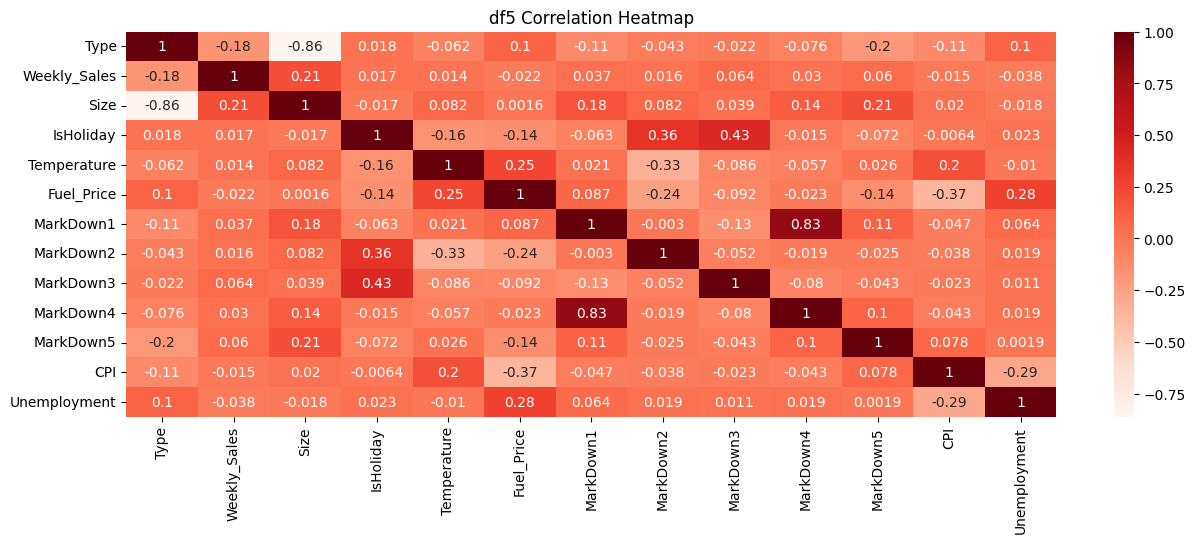

In [ ]:
# Calculate the correlation matrix
df5_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df5_corr, annot=True,cmap="Reds")
plt.title("df5 Correlation Heatmap")
plt.show()

In [ ]:
# in heatmap shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.

In [ ]:
# make unique column of the dataframe - 'diff'

df5['diff'] = df5['Day'].astype(str)+df5['Month'].astype(str)+df5['Year'].astype(str)+'-'+df5['Store'].astype(str)+'-'+df5['Dept'].astype(str)
df5

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown           diff  
0             NaN  211.096358         8.106         0     522010-1-1  
1             NaN  211.096358         8.106         0     522010-1-2  
2             NaN  211.096358         8.106         0     522010-1-3  
3             NaN  211.096358         8.106         0     522010-1-4  
4             NaN  211.096358         8.106         0     522010-1-5  
...           ...         ...           ...       ...            ...  
551474    1864.57         NaN           NaN         1  2672013-45-94  
551475    1864.57         NaN           NaN         1  2672013-45-95  
551476    1864.57         NaN           NaN         1  2672013-45-96  
551477    1864.57         NaN           NaN         1  2672013-45-97  
551478    1864.57         NaN           NaN         1  2672013-45-98  

[551479 rows x 20 columns]

In [ ]:
# Calculate the correlation matrix
df5_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown','diff']).dropna().corr()
df5_corr

Type  Weekly_Sales      Size  IsHoliday  Temperature  \
Type          1.000000     -0.175003 -0.861948   0.017696    -0.062063   
Weekly_Sales -0.175003      1.000000  0.212876   0.017019     0.013548   
Size         -0.861948      0.212876  1.000000  -0.017385     0.082188   
IsHoliday     0.017696      0.017019 -0.017385   1.000000    -0.163390   
Temperature  -0.062063      0.013548  0.082188  -0.163390     1.000000   
Fuel_Price    0.103577     -0.021892  0.001637  -0.142170     0.249748   
MarkDown1    -0.114084      0.037105  0.183699  -0.063284     0.021458   
MarkDown2    -0.043077      0.016330  0.082068   0.355549    -0.331287   
MarkDown3    -0.021703      0.064107  0.039312   0.426889    -0.085794   
MarkDown4    -0.076011      0.029589  0.135142  -0.014871    -0.057198   
MarkDown5    -0.195442      0.059591  0.210581  -0.071915     0.025572   
CPI          -0.114845     -0.015010  0.020077  -0.006378     0.202087   
Unemployment  0.104696     -0.038365 -0.017775   0.023112    -0.010272   

              Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Type            0.103577  -0.114084  -0.043077  -0.021703  -0.076011   
Weekly_Sales   -0.021892   0.037105   0.016330   0.064107   0.029589   
Size            0.001637   0.183699   0.082068   0.039312   0.135142   
IsHoliday      -0.142170  -0.063284   0.355549   0.426889  -0.014871   
Temperature     0.249748   0.021458  -0.331287  -0.085794  -0.057198   
Fuel_Price      1.000000   0.087150  -0.241956  -0.092328  -0.022583   
MarkDown1       0.087150   1.000000  -0.003029  -0.129704   0.829272   
MarkDown2      -0.241956  -0.003029   1.000000  -0.051531  -0.018819   
MarkDown3      -0.092328  -0.129704  -0.051531   1.000000  -0.079796   
MarkDown4      -0.022583   0.829272  -0.018819  -0.079796   1.000000   
MarkDown5      -0.136899   0.106329  -0.024935  -0.042508   0.100469   
CPI            -0.365872  -0.047062  -0.037865  -0.022800  -0.042540   
Unemployment    0.276459   0.063859   0.018805   0.010942   0.018646   

              MarkDown5       CPI  Unemployment  
Type          -0.195442 -0.114845      0.104696  
Weekly_Sales   0.059591 -0.015010     -0.038365  
Size           0.210581  0.020077     -0.017775  
IsHoliday     -0.071915 -0.006378      0.023112  
Temperature    0.025572  0.202087     -0.010272  
Fuel_Price    -0.136899 -0.365872      0.276459  
MarkDown1      0.106329 -0.047062      0.063859  
MarkDown2     -0.024935 -0.037865      0.018805  
MarkDown3     -0.042508 -0.022800      0.010942  
MarkDown4      0.100469 -0.042540      0.018646  
MarkDown5      1.000000  0.077569      0.001880  
CPI            0.077569  1.000000     -0.286483  
Unemployment   0.001880 -0.286483      1.000000

In [ ]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features

# so need create 2 different models to predict weekly_sales and compare the performance of both model
# model 1 --> with all MarkDowns(1-5) to predict weekly_sales
# model 2 --> without MarkDowns(1-5) to predict weekly_sales

In [ ]:
# check number of unique values in each features
df5.nunique()

Day                 31
Month               12
Year                 4
Store               45
Dept                81
Type                 3
Weekly_Sales    358785
Size                40
IsHoliday            2
Temperature       4178
Fuel_Price        1011
MarkDown1         4019
MarkDown2         2690
MarkDown3         2871
MarkDown4         3405
MarkDown5         4043
CPI               2505
Unemployment       404
markdown             2
diff            551479
dtype: int64

In [ ]:
import pandas as pd
df5=pd.read_csv("/content/retail_data_sales.csv")
df5

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown           diff  
0             NaN  211.096358         8.106         0     522010-1-1  
1             NaN  211.096358         8.106         0     522010-1-2  
2             NaN  211.096358         8.106         0     522010-1-3  
3             NaN  211.096358         8.106         0     522010-1-4  
4             NaN  211.096358         8.106         0     522010-1-5  
...           ...         ...           ...       ...            ...  
551474    1864.57         NaN           NaN         1  2672013-45-94  
551475    1864.57         NaN           NaN         1  2672013-45-95  
551476    1864.57         NaN           NaN         1  2672013-45-96  
551477    1864.57         NaN           NaN         1  2672013-45-97  
551478    1864.57         NaN           NaN         1  2672013-45-98  

[551479 rows x 20 columns]

In [ ]:
Retail_data_2012.to_excel('Retail_data_2012.xlsx', index=False)

**Method 1 - with Markdown**

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
#steps :
# make new datafram for only not null value columns
# train Machine learning model and predict "MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5" all are separately
# now add all MarkDown(1-5) values into dataframe based on "diff" column
# repeat and predict 'cpi'
# repeat and predict'Unemployment'
# finally repeat and predict 'Weekly_sales'

In [ ]:
# check different algorithm to using best algorithm for null prediction

def best_algo_predict(df,remove_null_features,predict_column,algorithm):

  # only predict column with null values and drop the other null columns from dataframe
  data=df.drop(columns=remove_null_features)

  # also filter non-null values into separate dataframe and reset index order
  df_notnull = data[data[predict_column].notnull()]
  df_notnull.reset_index(drop=True, inplace=True)

  # make vector(x) and label(y) variables
  x = df_notnull.drop(columns=[predict_column, 'diff'], axis=1)
  y = df_notnull[predict_column]
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
  model=algorithm().fit(x_train,y_train)
  y_pred_train=model.predict(x_train)
  y_pred_test=model.predict(x_test)
  r2_train=r2_score(y_train,y_pred_train)
  r2_test=r2_score(y_test,y_pred_test)

  accuracy={'algorithm': algorithm.__name__,
            'R2_train':r2_train,
            'R2_test':r2_test
             }
  return accuracy

In [ ]:
# drop the 'markdown' column and copy to new variable

df_markdown_data = df5.copy()
df_markdown_data.drop(columns=['markdown'],inplace=True)


In [ ]:
df_markdown_data

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment           diff  
0             NaN  211.096358         8.106     522010-1-1  
1             NaN  211.096358         8.106     522010-1-2  
2             NaN  211.096358         8.106     522010-1-3  
3             NaN  211.096358         8.106     522010-1-4  
4             NaN  211.096358         8.106     522010-1-5  
...           ...         ...           ...            ...  
551474    1864.57         NaN           NaN  2672013-45-94  
551475    1864.57         NaN           NaN  2672013-45-95  
551476    1864.57         NaN           NaN  2672013-45-96  
551477    1864.57         NaN           NaN  2672013-45-97  
551478    1864.57         NaN           NaN  2672013-45-98  

[551479 rows x 19 columns]

In [ ]:
df_markdown_data.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271341
MarkDown2       345560
MarkDown3       297850
MarkDown4       302830
MarkDown5       270287
CPI              43303
Unemployment     43303
diff                 0
dtype: int64

In [ ]:
# calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
print(best_algo_predict(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1', DecisionTreeRegressor))
print(best_algo_predict(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1', ExtraTreesRegressor))
print(best_algo_predict(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1', RandomForestRegressor))
print(best_algo_predict(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1', AdaBoostRegressor))
print(best_algo_predict(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1', GradientBoostingRegressor))
print(best_algo_predict(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999968120823}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999740378472, 'R2_test': 0.9999998328725503}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.21994125961045663, 'R2_test': 0.22930302971800676}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7332814726836181, 'R2_test': 0.7314338946338983}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9833685405069178, 'R2_test': 0.9828773436375625}


From above r square score we can say RandomforestRegressor R2 values are high on both the training and test sets, indicating a well-fitted model with good generalization capability. This model is likely to be the most generalized model to unseen data among the ones listed.

In [ ]:
#To predcit value
def predict_null(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features)

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()]
    df_null.reset_index(drop=True, inplace=True)

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()]
    df_notnull.reset_index(drop=True, inplace=True)

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1)
    y = df_notnull[label]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    #  XGBRegressor algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1))

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred)
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True)
    return df_final


In [ ]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown1'

Markdown1_pred = predict_null(df_markdown_data, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1')
Markdown1_pred

{'R2': 0.9999996642487402, 'Mean Absolute Error': 0.1424858231690405, 'Mean Squared Error': 30.007647700443243, 'Root Mean Squared Error': 5.477923666905486}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         5      2  2010      1     1     1  151315          0        42.31   
1         5      2  2010      1     2     1  151315          0        42.31   
2         5      2  2010      1     3     1  151315          0        42.31   
3         5      2  2010      1     4     1  151315          0        42.31   
4         5      2  2010      1     5     1  151315          0        42.31   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      7  2013     45    94     2  118221          0        76.06   
551475   26      7  2013     45    95     2  118221          0        76.06   
551476   26      7  2013     45    96     2  118221          0        76.06   
551477   26      7  2013     45    97     2  118221          0        76.06   
551478   26      7  2013     45    98     2  118221          0        76.06   

        Fuel_Price  MarkDown1           diff  
0            2.572  9878.2088     522010-1-1  
1            2.572  9878.2088     522010-1-2  
2            2.572  9878.2088     522010-1-3  
3            2.572  9878.2088     522010-1-4  
4            2.572  9878.2088     522010-1-5  
...            ...        ...            ...  
551474       3.804   212.0200  2672013-45-94  
551475       3.804   212.0200  2672013-45-95  
551476       3.804   212.0200  2672013-45-96  
551477       3.804   212.0200  2672013-45-97  
551478       3.804   212.0200  2672013-45-98  

[551479 rows x 12 columns]

In [ ]:
df_11=df_markdown_data[df_markdown_data["MarkDown1"].notnull()]


In [ ]:
df_11["MarkDown1"].max()

103184.98

In [ ]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown2'

Markdown2_pred = predict_null(df_markdown_data, ['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown2')
Markdown2_pred

{'R2': 1.0, 'Mean Absolute Error': 4.062638452201025e-12, 'Mean Squared Error': 1.704985755572473e-22, 'Root Mean Squared Error': 1.3057510312354621e-11}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         5      2  2010      1     1     1  151315          0        42.31   
1         5      2  2010      1     2     1  151315          0        42.31   
2         5      2  2010      1     3     1  151315          0        42.31   
3         5      2  2010      1     4     1  151315          0        42.31   
4         5      2  2010      1     5     1  151315          0        42.31   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      7  2013     45    94     2  118221          0        76.06   
551475   26      7  2013     45    95     2  118221          0        76.06   
551476   26      7  2013     45    96     2  118221          0        76.06   
551477   26      7  2013     45    97     2  118221          0        76.06   
551478   26      7  2013     45    98     2  118221          0        76.06   

        Fuel_Price  MarkDown2           diff  
0            2.572  6678.8432     522010-1-1  
1            2.572  6678.8432     522010-1-2  
2            2.572  6678.8432     522010-1-3  
3            2.572  6678.8432     522010-1-4  
4            2.572  6678.8432     522010-1-5  
...            ...        ...            ...  
551474       3.804   851.7300  2672013-45-94  
551475       3.804   851.7300  2672013-45-95  
551476       3.804   851.7300  2672013-45-96  
551477       3.804   851.7300  2672013-45-97  
551478       3.804   851.7300  2672013-45-98  

[551479 rows x 12 columns]

In [ ]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown3'

Markdown3_pred = predict_null(df_markdown_data, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown3')
Markdown3_pred

{'R2': 0.9999999999401044, 'Mean Absolute Error': 0.002838662620996027, 'Mean Squared Error': 0.008038145117296626, 'Root Mean Squared Error': 0.08965570320563342}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         5      2  2010      1     1     1  151315          0        42.31   
1         5      2  2010      1     2     1  151315          0        42.31   
2         5      2  2010      1     3     1  151315          0        42.31   
3         5      2  2010      1     4     1  151315          0        42.31   
4         5      2  2010      1     5     1  151315          0        42.31   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      7  2013     45    94     2  118221          0        76.06   
551475   26      7  2013     45    95     2  118221          0        76.06   
551476   26      7  2013     45    96     2  118221          0        76.06   
551477   26      7  2013     45    97     2  118221          0        76.06   
551478   26      7  2013     45    98     2  118221          0        76.06   

        Fuel_Price  MarkDown3           diff  
0            2.572   150.8588     522010-1-1  
1            2.572   150.8588     522010-1-2  
2            2.572   150.8588     522010-1-3  
3            2.572   150.8588     522010-1-4  
4            2.572   150.8588     522010-1-5  
...            ...        ...            ...  
551474       3.804     2.0600  2672013-45-94  
551475       3.804     2.0600  2672013-45-95  
551476       3.804     2.0600  2672013-45-96  
551477       3.804     2.0600  2672013-45-97  
551478       3.804     2.0600  2672013-45-98  

[551479 rows x 12 columns]

In [ ]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown4'

Markdown4_pred = predict_null(df_markdown_data, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'], 'MarkDown4')
Markdown4_pred

{'R2': 0.9999999999990766, 'Mean Absolute Error': 3.0158861931855664e-05, 'Mean Squared Error': 4.52322549768473e-05, 'Root Mean Squared Error': 0.0067254929170171085}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         5      2  2010      1     1     1  151315          0        42.31   
1         5      2  2010      1     2     1  151315          0        42.31   
2         5      2  2010      1     3     1  151315          0        42.31   
3         5      2  2010      1     4     1  151315          0        42.31   
4         5      2  2010      1     5     1  151315          0        42.31   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      7  2013     45    94     2  118221          0        76.06   
551475   26      7  2013     45    95     2  118221          0        76.06   
551476   26      7  2013     45    96     2  118221          0        76.06   
551477   26      7  2013     45    97     2  118221          0        76.06   
551478   26      7  2013     45    98     2  118221          0        76.06   

        Fuel_Price   MarkDown4           diff  
0            2.572  16111.2531     522010-1-1  
1            2.572  16111.2531     522010-1-2  
2            2.572  16111.2531     522010-1-3  
3            2.572  16111.2531     522010-1-4  
4            2.572  16111.2531     522010-1-5  
...            ...         ...            ...  
551474       3.804     10.8800  2672013-45-94  
551475       3.804     10.8800  2672013-45-95  
551476       3.804     10.8800  2672013-45-96  
551477       3.804     10.8800  2672013-45-97  
551478       3.804     10.8800  2672013-45-98  

[551479 rows x 12 columns]

In [ ]:
df_44=df_markdown_data[df_markdown_data["MarkDown4"].notnull()]

In [ ]:
df_44["MarkDown4"].max()

67474.85

In [ ]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown5'

Markdown5_pred = predict_null(df_markdown_data, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'], 'MarkDown5')
Markdown5_pred

{'R2': 1.0, 'Mean Absolute Error': 4.86807017898266e-12, 'Mean Squared Error': 7.226938647914981e-23, 'Root Mean Squared Error': 8.501140304638537e-12}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         5      2  2010      1     1     1  151315          0        42.31   
1         5      2  2010      1     2     1  151315          0        42.31   
2         5      2  2010      1     3     1  151315          0        42.31   
3         5      2  2010      1     4     1  151315          0        42.31   
4         5      2  2010      1     5     1  151315          0        42.31   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      7  2013     45    94     2  118221          0        76.06   
551475   26      7  2013     45    95     2  118221          0        76.06   
551476   26      7  2013     45    96     2  118221          0        76.06   
551477   26      7  2013     45    97     2  118221          0        76.06   
551478   26      7  2013     45    98     2  118221          0        76.06   

        Fuel_Price  MarkDown5           diff  
0            2.572  4743.4864     522010-1-1  
1            2.572  4743.4864     522010-1-2  
2            2.572  4743.4864     522010-1-3  
3            2.572  4743.4864     522010-1-4  
4            2.572  4743.4864     522010-1-5  
...            ...        ...            ...  
551474       3.804  1864.5700  2672013-45-94  
551475       3.804  1864.5700  2672013-45-95  
551476       3.804  1864.5700  2672013-45-96  
551477       3.804  1864.5700  2672013-45-97  
551478       3.804  1864.5700  2672013-45-98  

[551479 rows x 12 columns]

In [ ]:
df_markdown_data

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment           diff  
0             NaN  211.096358         8.106     522010-1-1  
1             NaN  211.096358         8.106     522010-1-2  
2             NaN  211.096358         8.106     522010-1-3  
3             NaN  211.096358         8.106     522010-1-4  
4             NaN  211.096358         8.106     522010-1-5  
...           ...         ...           ...            ...  
551474    1864.57         NaN           NaN  2672013-45-94  
551475    1864.57         NaN           NaN  2672013-45-95  
551476    1864.57         NaN           NaN  2672013-45-96  
551477    1864.57         NaN           NaN  2672013-45-97  
551478    1864.57         NaN           NaN  2672013-45-98  

[551479 rows x 19 columns]

In [ ]:
# remove all old MarkDown(1-5) columns from df_markdown_data

df_markdown_data = df_markdown_data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
df_markdown_data.head()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0    5      2  2010      1     1     1      24924.50  151315          0   
1    5      2  2010      1     2     1      50605.27  151315          0   
2    5      2  2010      1     3     1      13740.12  151315          0   
3    5      2  2010      1     4     1      39954.04  151315          0   
4    5      2  2010      1     5     1      32229.38  151315          0   

   Temperature  Fuel_Price         CPI  Unemployment        diff  
0        42.31       2.572  211.096358         8.106  522010-1-1  
1        42.31       2.572  211.096358         8.106  522010-1-2  
2        42.31       2.572  211.096358         8.106  522010-1-3  
3        42.31       2.572  211.096358         8.106  522010-1-4  
4        42.31       2.572  211.096358         8.106  522010-1-5

In [ ]:
# now merge all new predicted 'MarkDown(1-5)' columns --> one by one with df_markdown_data_final dataframe --> based on 'diff' column

df_markdown_data_final= pd.merge(df_markdown_data, Markdown1_pred[['MarkDown1', 'diff']], on='diff', how='inner')
df_markdown_data_final= pd.merge(df_markdown_data_final, Markdown2_pred[['MarkDown2', 'diff']], on='diff', how='inner')
df_markdown_data_final= pd.merge(df_markdown_data_final, Markdown3_pred[['MarkDown3', 'diff']], on='diff', how='inner')
df_markdown_data_final= pd.merge(df_markdown_data_final, Markdown4_pred[['MarkDown4', 'diff']], on='diff', how='inner')
df_markdown_data_final= pd.merge(df_markdown_data_final, Markdown5_pred[['MarkDown5', 'diff']], on='diff', how='inner')
df_markdown_data_final

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price         CPI  Unemployment           diff  \
0             42.31       2.572  211.096358         8.106     522010-1-1   
1             42.31       2.572  211.096358         8.106     522010-1-2   
2             42.31       2.572  211.096358         8.106     522010-1-3   
3             42.31       2.572  211.096358         8.106     522010-1-4   
4             42.31       2.572  211.096358         8.106     522010-1-5   
...             ...         ...         ...           ...            ...   
551474        76.06       3.804         NaN           NaN  2672013-45-94   
551475        76.06       3.804         NaN           NaN  2672013-45-95   
551476        76.06       3.804         NaN           NaN  2672013-45-96   
551477        76.06       3.804         NaN           NaN  2672013-45-97   
551478        76.06       3.804         NaN           NaN  2672013-45-98   

        MarkDown1  MarkDown2  MarkDown3   MarkDown4  MarkDown5  
0       9878.2088  6678.8432   150.8588  16111.2531  4743.4864  
1       9878.2088  6678.8432   150.8588  16111.2531  4743.4864  
2       9878.2088  6678.8432   150.8588  16111.2531  4743.4864  
3       9878.2088  6678.8432   150.8588  16111.2531  4743.4864  
4       9878.2088  6678.8432   150.8588  16111.2531  4743.4864  
...           ...        ...        ...         ...        ...  
551474   212.0200   851.7300     2.0600     10.8800  1864.5700  
551475   212.0200   851.7300     2.0600     10.8800  1864.5700  
551476   212.0200   851.7300     2.0600     10.8800  1864.5700  
551477   212.0200   851.7300     2.0600     10.8800  1864.5700  
551478   212.0200   851.7300     2.0600     10.8800  1864.5700  

[551479 rows x 19 columns]

In [ ]:
print(best_algo_predict(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI', DecisionTreeRegressor))
print(best_algo_predict(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI', ExtraTreesRegressor))
print(best_algo_predict(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI', RandomForestRegressor))
print(best_algo_predict(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI', AdaBoostRegressor))
print(best_algo_predict(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI', GradientBoostingRegressor))
print(best_algo_predict(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5164931726851618, 'R2_test': 0.5182194501748043}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9863191918819882, 'R2_test': 0.9862299242716426}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999708784760417, 'R2_test': 0.9999702368298394}


In [ ]:
# next train Machine learning model with df_markdown_data_final--> to predict 'CPI'

df_cpi = predict_null(df_markdown_data_final, ['Weekly_Sales','Unemployment'], 'CPI')
df_cpi

{'R2': 1.0, 'Mean Absolute Error': 1.9122620889611707e-10, 'Mean Squared Error': 1.3435842473056369e-16, 'Root Mean Squared Error': 1.1591308154413102e-08}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         3      5  2013      1     1     1  151315          0        66.66   
1         3      5  2013      1     2     1  151315          0        66.66   
2         3      5  2013      1     3     1  151315          0        66.66   
3         3      5  2013      1     4     1  151315          0        66.66   
4         3      5  2013      1     5     1  151315          0        66.66   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      4  2013     45    94     2  118221          0        50.64   
551475   26      4  2013     45    95     2  118221          0        50.64   
551476   26      4  2013     45    96     2  118221          0        50.64   
551477   26      4  2013     45    97     2  118221          0        50.64   
551478   26      4  2013     45    98     2  118221          0        50.64   

        Fuel_Price         CPI           diff  MarkDown1  MarkDown2  \
0            3.386  225.163470     352013-1-1    2298.63     2.0000   
1            3.386  225.163470     352013-1-2    2298.63     2.0000   
2            3.386  225.163470     352013-1-3    2298.63     2.0000   
3            3.386  225.163470     352013-1-4    2298.63     2.0000   
4            3.386  225.163470     352013-1-5    2298.63     2.0000   
...            ...         ...            ...        ...        ...   
551474       3.615  193.589304  2642013-45-94    1260.65   452.9849   
551475       3.615  193.589304  2642013-45-95    1260.65   452.9849   
551476       3.615  193.589304  2642013-45-96    1260.65   452.9849   
551477       3.615  193.589304  2642013-45-97    1260.65   452.9849   
551478       3.615  193.589304  2642013-45-98    1260.65   452.9849   

        MarkDown3  MarkDown4  MarkDown5  
0          129.90      55.46    1301.04  
1          129.90      55.46    1301.04  
2          129.90      55.46    1301.04  
3          129.90      55.46    1301.04  
4          129.90      55.46    1301.04  
...           ...        ...        ...  
551474      57.52      40.51    2476.18  
551475      57.52      40.51    2476.18  
551476      57.52      40.51    2476.18  
551477      57.52      40.51    2476.18  
551478      57.52      40.51    2476.18  

[551479 rows x 17 columns]

In [ ]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_markdown_data_final --> based on 'diff' column

df_markdown_data_final = df_markdown_data_final.drop(columns=['CPI'], axis=1)
df_cpi_data_final = pd.merge(df_markdown_data_final, df_cpi[['CPI', 'diff']], on='diff', how='inner')
df_cpi_data_final.tail()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  Unemployment           diff  MarkDown1  \
551474        76.06       3.804           NaN  2672013-45-94     212.02   
551475        76.06       3.804           NaN  2672013-45-95     212.02   
551476        76.06       3.804           NaN  2672013-45-96     212.02   
551477        76.06       3.804           NaN  2672013-45-97     212.02   
551478        76.06       3.804           NaN  2672013-45-98     212.02   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  
551474     851.73       2.06      10.88    1864.57  193.281413  
551475     851.73       2.06      10.88    1864.57  193.281413  
551476     851.73       2.06      10.88    1864.57  193.281413  
551477     851.73       2.06      10.88    1864.57  193.281413  
551478     851.73       2.06      10.88    1864.57  193.281413

In [ ]:
df_cpi_data_final[df_cpi_data_final["diff"]=="352013-1-1"]

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
508176    3      5  2013      1     1     1           NaN  151315          0   

        Temperature  Fuel_Price  Unemployment        diff  MarkDown1  \
508176        66.66       3.386           NaN  352013-1-1    2298.63   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5        CPI  
508176        2.0      129.9      55.46    1301.04  225.16347

In [ ]:
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', DecisionTreeRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', ExtraTreesRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', RandomForestRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', AdaBoostRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', GradientBoostingRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4644927631424598, 'R2_test': 0.46657754047331357}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9558468261739825, 'R2_test': 0.9560535978518147}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9996494260721817, 'R2_test': 0.9996429286886389}


In [ ]:
# next train Machine learning model with df_cpi_data_final --> to predict 'Unemployment'

unemployment_data = predict_null(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment')
unemployment_data

{'R2': 1.0, 'Mean Absolute Error': 2.1232612268015147e-14, 'Mean Squared Error': 8.701435053590407e-28, 'Root Mean Squared Error': 2.949819495086167e-14}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         3      5  2013      1     1     1  151315          0        66.66   
1         3      5  2013      1     2     1  151315          0        66.66   
2         3      5  2013      1     3     1  151315          0        66.66   
3         3      5  2013      1     4     1  151315          0        66.66   
4         3      5  2013      1     5     1  151315          0        66.66   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      4  2013     45    94     2  118221          0        50.64   
551475   26      4  2013     45    95     2  118221          0        50.64   
551476   26      4  2013     45    96     2  118221          0        50.64   
551477   26      4  2013     45    97     2  118221          0        50.64   
551478   26      4  2013     45    98     2  118221          0        50.64   

        Fuel_Price  Unemployment           diff  MarkDown1  MarkDown2  \
0            3.386         6.314     352013-1-1    2298.63     2.0000   
1            3.386         6.314     352013-1-2    2298.63     2.0000   
2            3.386         6.314     352013-1-3    2298.63     2.0000   
3            3.386         6.314     352013-1-4    2298.63     2.0000   
4            3.386         6.314     352013-1-5    2298.63     2.0000   
...            ...           ...            ...        ...        ...   
551474       3.615         8.335  2642013-45-94    1260.65   452.9849   
551475       3.615         8.335  2642013-45-95    1260.65   452.9849   
551476       3.615         8.335  2642013-45-96    1260.65   452.9849   
551477       3.615         8.335  2642013-45-97    1260.65   452.9849   
551478       3.615         8.335  2642013-45-98    1260.65   452.9849   

        MarkDown3  MarkDown4  MarkDown5         CPI  
0          129.90      55.46    1301.04  225.163470  
1          129.90      55.46    1301.04  225.163470  
2          129.90      55.46    1301.04  225.163470  
3          129.90      55.46    1301.04  225.163470  
4          129.90      55.46    1301.04  225.163470  
...           ...        ...        ...         ...  
551474      57.52      40.51    2476.18  193.589304  
551475      57.52      40.51    2476.18  193.589304  
551476      57.52      40.51    2476.18  193.589304  
551477      57.52      40.51    2476.18  193.589304  
551478      57.52      40.51    2476.18  193.589304  

[551479 rows x 18 columns]

In [ ]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_cpi_data_final --> based on 'diff' column

df_cpi_data_final= df_cpi_data_final.drop(columns=['Unemployment'], axis=1)
df_unemployment_final = pd.merge(df_cpi_data_final, unemployment_data[['Unemployment', 'diff']], on='diff', how='inner')
df_unemployment_final.tail()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price           diff  MarkDown1  MarkDown2  \
551474        76.06       3.804  2672013-45-94     212.02     851.73   
551475        76.06       3.804  2672013-45-95     212.02     851.73   
551476        76.06       3.804  2672013-45-96     212.02     851.73   
551477        76.06       3.804  2672013-45-97     212.02     851.73   
551478        76.06       3.804  2672013-45-98     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
551474       2.06      10.88    1864.57  193.281413       8.67516  
551475       2.06      10.88    1864.57  193.281413       8.67516  
551476       2.06      10.88    1864.57  193.281413       8.67516  
551477       2.06      10.88    1864.57  193.281413       8.67516  
551478       2.06      10.88    1864.57  193.281413       8.67516

In [ ]:
print(best_algo_predict(df_unemployment_final, [], 'Weekly_Sales', DecisionTreeRegressor))
print(best_algo_predict(df_unemployment_final, [], 'Weekly_Sales', ExtraTreesRegressor))
print(best_algo_predict(df_unemployment_final, [], 'Weekly_Sales', RandomForestRegressor))
print(best_algo_predict(df_unemployment_final, [], 'Weekly_Sales', AdaBoostRegressor))
print(best_algo_predict(df_unemployment_final, [], 'Weekly_Sales', GradientBoostingRegressor))
print(best_algo_predict(df_unemployment_final, [], 'Weekly_Sales', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9490525935597184}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9796875511654535}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9963593816565991, 'R2_test': 0.9742290480705986}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.3233617170962513, 'R2_test': -0.3443595757696758}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7470926082623226, 'R2_test': 0.747658185467476}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9506981739239564, 'R2_test': 0.9455527527973218}


In [ ]:
# finally train Machine learning model with df_unemployment_final --> to predict 'Weekly_Sales'
weekly_sales_final_data = predict_null (df_unemployment_final, [], 'Weekly_Sales')
weekly_sales_final_data

{'R2': 0.9742873287965637, 'Mean Absolute Error': 1430.9303088311933, 'Mean Squared Error': 13034935.926522296, 'Root Mean Squared Error': 3610.3927662405786}


Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      197.4944  202505          0   
1         5      2  2010      9    49     2       45.7228  125833          0   
2         5      2  2010     11    19     1      531.7284  207499          0   
3         5      2  2010     15    80     2       51.4807  123737          0   
4         5      2  2010     20    19     1      152.4840  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2     2487.8000  118221          0   
551475   26     10  2012     45    94     2     5203.3100  118221          0   
551476   26     10  2012     45    95     2    56017.4700  118221          0   
551477   26     10  2012     45    97     2     6817.4800  118221          0   
551478   26     10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price            diff   MarkDown1   MarkDown2  \
0             40.43       2.572     522010-6-47  10509.6364   5787.2989   
1             38.01       2.572     522010-9-49   7240.4085   2193.1258   
2             46.04       2.572    522010-11-19  14877.0137   5173.7096   
3             19.83       2.954    522010-15-80   7724.9841  13263.4273   
4             25.92       2.784    522010-20-19  15493.1773   6410.0212   
...             ...         ...             ...         ...         ...   
551474        58.85       3.882  26102012-45-93   4018.9100     58.0800   
551475        58.85       3.882  26102012-45-94   4018.9100     58.0800   
551476        58.85       3.882  26102012-45-95   4018.9100     58.0800   
551477        58.85       3.882  26102012-45-97   4018.9100     58.0800   
551478        58.85       3.882  26102012-45-98   4018.9100     58.0800   

        MarkDown3   MarkDown4  MarkDown5         CPI  Unemployment  
0         57.0504  43459.8164  7260.8894  212.622352         7.259  
1         60.4772   6537.0184  3579.9553  214.655459         6.415  
2         78.4259  43774.7682  6555.3884  214.424881         7.368  
3         59.1715   8301.5037  4856.7133  131.527903         8.350  
4         44.7354  61672.2986  7259.5157  204.247194         8.187  
...           ...         ...        ...         ...           ...  
551474   100.0000    211.9400   858.3300  192.308899         8.667  
551475   100.0000    211.9400   858.3300  192.308899         8.667  
551476   100.0000    211.9400   858.3300  192.308899         8.667  
551477   100.0000    211.9400   858.3300  192.308899         8.667  
551478   100.0000    211.9400   858.3300  192.308899         8.667  

[551479 rows x 19 columns]

In [ ]:
weekly_sales_final_data[weekly_sales_final_data["diff"]=="352013-1-1"]

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
87964    3      5  2013      1     1     1    17824.0526  151315          0   

       Temperature  Fuel_Price        diff  MarkDown1  MarkDown2  MarkDown3  \
87964        66.66       3.386  352013-1-1    2298.63        2.0      129.9   

       MarkDown4  MarkDown5        CPI  Unemployment  
87964      55.46    1301.04  225.16347         6.314

In [ ]:
weekly_sales_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Day           551479 non-null  int32  
 1   Month         551479 non-null  int32  
 2   Year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Weekly_Sales  551479 non-null  float64
 7   Size          551479 non-null  int64  
 8   IsHoliday     551479 non-null  int64  
 9   Temperature   551479 non-null  float64
 10  Fuel_Price    551479 non-null  float64
 11  diff          551479 non-null  object 
 12  MarkDown1     551479 non-null  float64
 13  MarkDown2     551479 non-null  float64
 14  MarkDown3     551479 non-null  float64
 15  MarkDown4     551479 non-null  float64
 16  MarkDown5     551479 non-null  float64
 17  CPI           551479 non-null  float64
 18  Unem

In [ ]:
weekly_sales_final_data.isnull().sum()

Day             0
Month           0
Year            0
Store           0
Dept            0
Type            0
Weekly_Sales    0
Size            0
IsHoliday       0
Temperature     0
Fuel_Price      0
diff            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
weekly_sales_final_data.describe().T

count           mean           std        min           25%  \
Day           551479.0      15.653488      8.776044      1.000      8.000000   
Month         551479.0       6.277180      3.340134      1.000      3.000000   
Year          551479.0    2011.392758      1.054086   2010.000   2010.000000   
Store         551479.0      22.270485     12.796872      1.000     11.000000   
Dept          551479.0      44.603013     30.416079      1.000     19.000000   
Type          551479.0       1.594791      0.669624      1.000      1.000000   
Weekly_Sales  551479.0   15636.139139  22604.900074      0.010   1841.766800   
Size          551479.0  136073.691863  61207.331445  34875.000  93638.000000   
IsHoliday     551479.0       0.071905      0.258330      0.000      0.000000   
Temperature   551479.0      58.703624     18.685408     -7.290     45.160000   
Fuel_Price    551479.0       3.413010      0.427725      2.472      3.050000   
MarkDown1     551479.0    7078.736000   7894.156080      0.270   2478.060000   
MarkDown2     551479.0    2969.892306   7475.042653      0.010     87.015500   
MarkDown3     551479.0    1248.353877   9324.293942      0.010      9.316900   
MarkDown4     551479.0    3236.526758   6364.844405      0.220    270.370000   
MarkDown5     551479.0    4791.331890  11258.045428     40.980   1981.334100   
CPI           551479.0     172.627670     39.771406    126.064    132.689921   
Unemployment  551479.0       7.701360      1.862986      3.684      6.529000   

                       50%            75%            max  
Day               16.00000      23.000000      31.000000  
Month              6.00000       9.000000      12.000000  
Year            2011.00000    2012.000000    2013.000000  
Store             22.00000      33.000000      45.000000  
Dept              38.00000      74.000000      99.000000  
Type               1.00000       2.000000       3.000000  
Weekly_Sales    7251.93000   19806.675000  693099.360000  
Size          128107.00000  202505.000000  219622.000000  
IsHoliday          0.00000       0.000000       1.000000  
Temperature       59.94000      73.160000     101.950000  
Fuel_Price         3.52400       3.746000       4.468000  
MarkDown1       5530.96860    8979.207300  103184.980000  
MarkDown2        308.38100    1918.596200  104519.540000  
MarkDown3         33.31000     104.990000  149483.310000  
MarkDown4       1254.60000    3351.548650   67474.850000  
MarkDown5       3508.90000    5470.516700  771448.100000  
CPI              182.54459     214.417648     228.976456  
Unemployment       7.71600       8.523000      14.313000

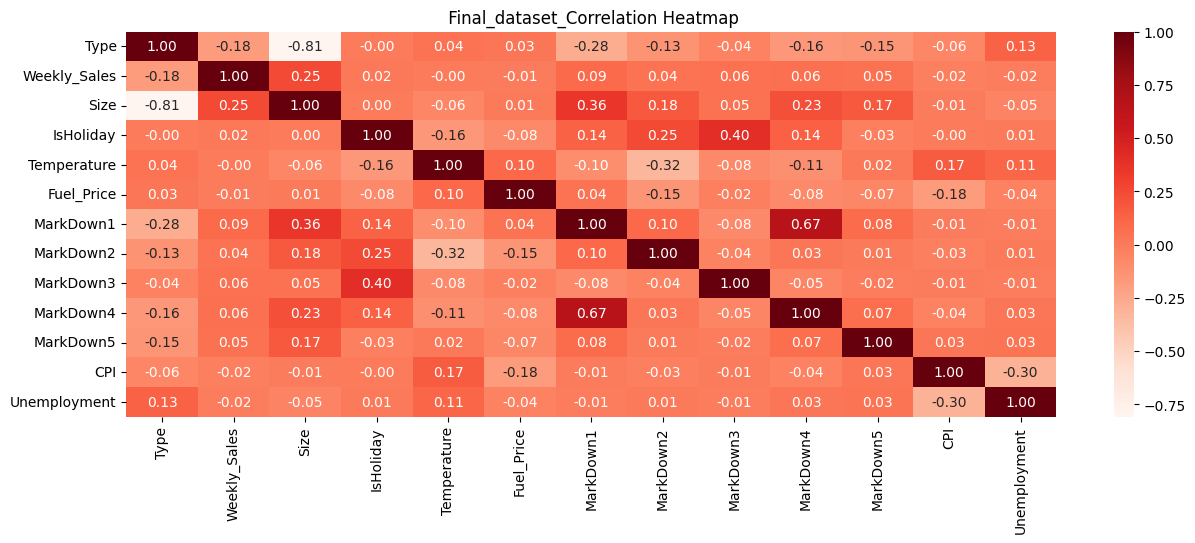

In [ ]:
# Calculate the correlation matrix
final_dataset = weekly_sales_final_data.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept',"diff"]).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(final_dataset, annot=True, fmt=".2f",cmap="Reds")
plt.title(" Final_dataset_Correlation Heatmap")
plt.show()

This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
other features are weak correlation with weekly_sales.

In [ ]:
weekly_sales_final_data.to_csv('Retail_sales_cleaned_data.csv',index=False )

**Data Visualization**

In [ ]:
import pandas as pd

In [ ]:
df_data=pd.read_csv("/content/Retail_sales_cleaned_data.csv")
df_data

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      197.4944  202505          0   
1         5      2  2010      9    49     2       45.7228  125833          0   
2         5      2  2010     11    19     1      531.7284  207499          0   
3         5      2  2010     15    80     2       51.4807  123737          0   
4         5      2  2010     20    19     1      152.4840  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2     2487.8000  118221          0   
551475   26     10  2012     45    94     2     5203.3100  118221          0   
551476   26     10  2012     45    95     2    56017.4700  118221          0   
551477   26     10  2012     45    97     2     6817.4800  118221          0   
551478   26     10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price            diff   MarkDown1   MarkDown2  \
0             40.43       2.572     522010-6-47  10509.6364   5787.2989   
1             38.01       2.572     522010-9-49   7240.4085   2193.1258   
2             46.04       2.572    522010-11-19  14877.0137   5173.7096   
3             19.83       2.954    522010-15-80   7724.9841  13263.4273   
4             25.92       2.784    522010-20-19  15493.1773   6410.0212   
...             ...         ...             ...         ...         ...   
551474        58.85       3.882  26102012-45-93   4018.9100     58.0800   
551475        58.85       3.882  26102012-45-94   4018.9100     58.0800   
551476        58.85       3.882  26102012-45-95   4018.9100     58.0800   
551477        58.85       3.882  26102012-45-97   4018.9100     58.0800   
551478        58.85       3.882  26102012-45-98   4018.9100     58.0800   

        MarkDown3   MarkDown4  MarkDown5         CPI  Unemployment  
0         57.0504  43459.8164  7260.8894  212.622352         7.259  
1         60.4772   6537.0184  3579.9553  214.655459         6.415  
2         78.4259  43774.7682  6555.3884  214.424881         7.368  
3         59.1715   8301.5037  4856.7133  131.527903         8.350  
4         44.7354  61672.2986  7259.5157  204.247194         8.187  
...           ...         ...        ...         ...           ...  
551474   100.0000    211.9400   858.3300  192.308899         8.667  
551475   100.0000    211.9400   858.3300  192.308899         8.667  
551476   100.0000    211.9400   858.3300  192.308899         8.667  
551477   100.0000    211.9400   858.3300  192.308899         8.667  
551478   100.0000    211.9400   858.3300  192.308899         8.667  

[551479 rows x 19 columns]

In [ ]:
df_data["Size"].unique()

array([202505, 125833, 207499, 123737, 203742, 152513,  42988, 203750,
       118221,  93188, 128107, 103681,  39690, 151315, 126512, 112238,
       203819, 158114, 140167, 204184, 155083, 196321,  34875, 200898,
       119557, 202307,  93638,  39910, 120653, 206302, 219622,  57197,
       203007,  41062, 184109,  70713, 114533,  37392, 155078, 205863])

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Day           551479 non-null  int64  
 1   Month         551479 non-null  int64  
 2   Year          551479 non-null  int64  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Weekly_Sales  551479 non-null  float64
 7   Size          551479 non-null  int64  
 8   IsHoliday     551479 non-null  int64  
 9   Temperature   551479 non-null  float64
 10  Fuel_Price    551479 non-null  float64
 11  diff          551479 non-null  object 
 12  MarkDown1     551479 non-null  float64
 13  MarkDown2     551479 non-null  float64
 14  MarkDown3     551479 non-null  float64
 15  MarkDown4     551479 non-null  float64
 16  MarkDown5     551479 non-null  float64
 17  CPI           551479 non-null  float64
 18  Unem

In [ ]:
# converting year, Month, Day into string data type
df_data['Year'] = df_data['Year'].astype(str)
df_data['Month'] = df_data['Month'].astype(str)
df_data['Day'] = df_data['Day'].astype(str)

# Create 'date' column by concatenating 'year', 'month', and 'day' columns
df_data['date'] = pd.to_datetime(df_data['Year'] + '-' + df_data['Month'] + '-' + df_data['Day'])

In [ ]:
df_data

Day Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0        5     2  2010      6    47     1      197.4944  202505          0   
1        5     2  2010      9    49     2       45.7228  125833          0   
2        5     2  2010     11    19     1      531.7284  207499          0   
3        5     2  2010     15    80     2       51.4807  123737          0   
4        5     2  2010     20    19     1      152.4840  203742          0   
...     ..   ...   ...    ...   ...   ...           ...     ...        ...   
551474  26    10  2012     45    93     2     2487.8000  118221          0   
551475  26    10  2012     45    94     2     5203.3100  118221          0   
551476  26    10  2012     45    95     2    56017.4700  118221          0   
551477  26    10  2012     45    97     2     6817.4800  118221          0   
551478  26    10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price            diff   MarkDown1   MarkDown2  \
0             40.43       2.572     522010-6-47  10509.6364   5787.2989   
1             38.01       2.572     522010-9-49   7240.4085   2193.1258   
2             46.04       2.572    522010-11-19  14877.0137   5173.7096   
3             19.83       2.954    522010-15-80   7724.9841  13263.4273   
4             25.92       2.784    522010-20-19  15493.1773   6410.0212   
...             ...         ...             ...         ...         ...   
551474        58.85       3.882  26102012-45-93   4018.9100     58.0800   
551475        58.85       3.882  26102012-45-94   4018.9100     58.0800   
551476        58.85       3.882  26102012-45-95   4018.9100     58.0800   
551477        58.85       3.882  26102012-45-97   4018.9100     58.0800   
551478        58.85       3.882  26102012-45-98   4018.9100     58.0800   

        MarkDown3   MarkDown4  MarkDown5         CPI  Unemployment       date  
0         57.0504  43459.8164  7260.8894  212.622352         7.259 2010-02-05  
1         60.4772   6537.0184  3579.9553  214.655459         6.415 2010-02-05  
2         78.4259  43774.7682  6555.3884  214.424881         7.368 2010-02-05  
3         59.1715   8301.5037  4856.7133  131.527903         8.350 2010-02-05  
4         44.7354  61672.2986  7259.5157  204.247194         8.187 2010-02-05  
...           ...         ...        ...         ...           ...        ...  
551474   100.0000    211.9400   858.3300  192.308899         8.667 2012-10-26  
551475   100.0000    211.9400   858.3300  192.308899         8.667 2012-10-26  
551476   100.0000    211.9400   858.3300  192.308899         8.667 2012-10-26  
551477   100.0000    211.9400   858.3300  192.308899         8.667 2012-10-26  
551478   100.0000    211.9400   858.3300  192.308899         8.667 2012-10-26  

[551479 rows x 20 columns]

In [ ]:
df_data["week"]=df_data["date"].dt.isocalendar().week

In [ ]:
import plotly.express as px

In [ ]:
#Here we are visualizing the top 10 stores in the dataset along with their percentage
store_counts = df_data['Store'].value_counts()[:10].reset_index()
store_counts.columns = ['Store', 'count']
# Create a pie chart
fig = px.pie(store_counts, values='count', names='Store', title='Store Distribution')
# Show the chart
fig.show()

In [ ]:
#Here we are visualizing the Type in the dataset along with their percentage
Type_counts = df_data['Type'].value_counts().reset_index()
Type_counts.columns = ['Type', 'count']# Create a pie chart
fig = px.pie(Type_counts, values='count', names='Type', title='Type Distribution')
# Show the chart
fig.show()

Here from the above pie chart it is clearly visible that Type 3 has the minimum number of stores while Type 1 has the maximum number of stores

In [ ]:
#Here we are visualizing the top 10 stores in the dataset along with their percentage
Holiday_counts = df_data['IsHoliday'].value_counts()[:10].reset_index()
Holiday_counts.columns = ['Holiday', 'count']
# Create a pie chart
fig = px.pie(Holiday_counts, values='count', names='Holiday', title='Holiday Distribution')
# Show the chart
fig.show()

So in this pie chart it is evident that 93% of the time there is no holiday in the stores.

In [ ]:
def scatter(column):
    plt.figure()
    plt.scatter(df_data[column] , df_data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

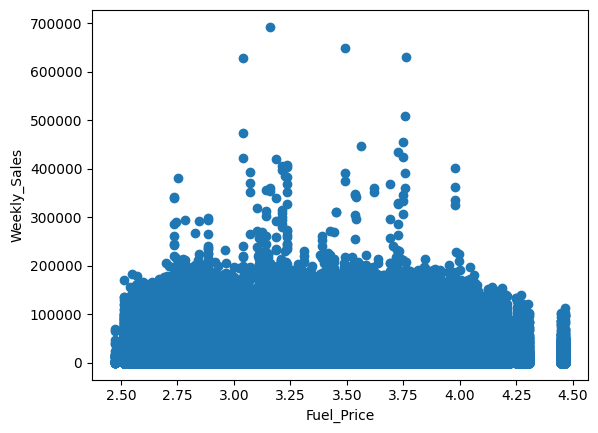

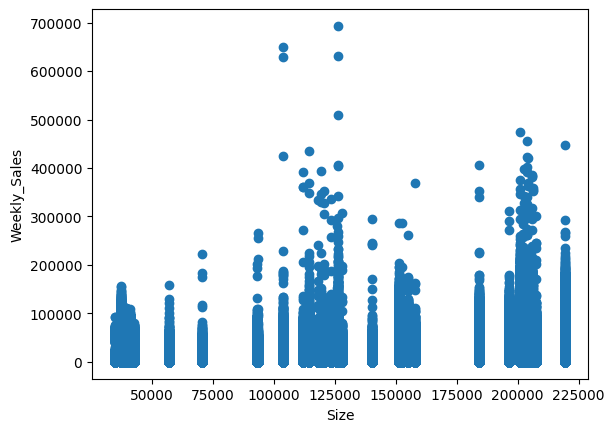

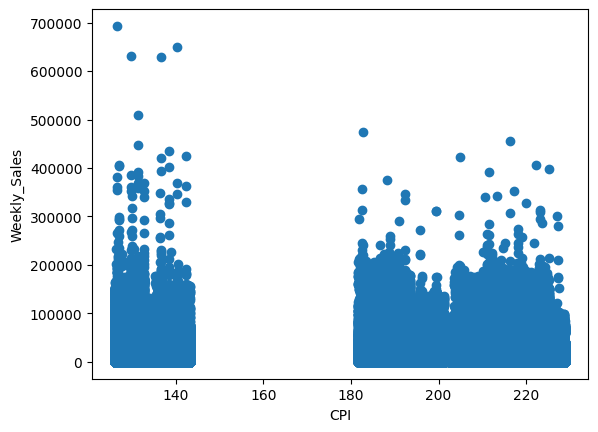

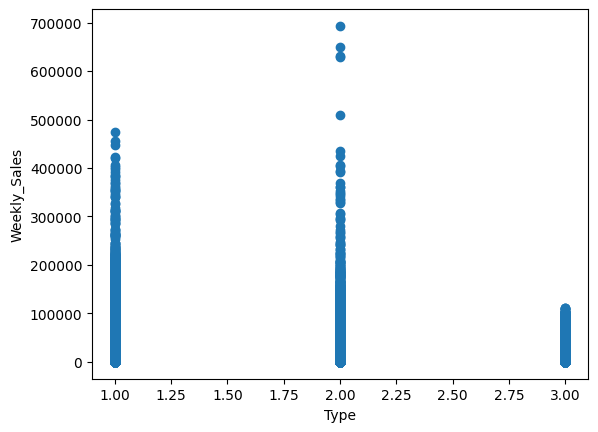

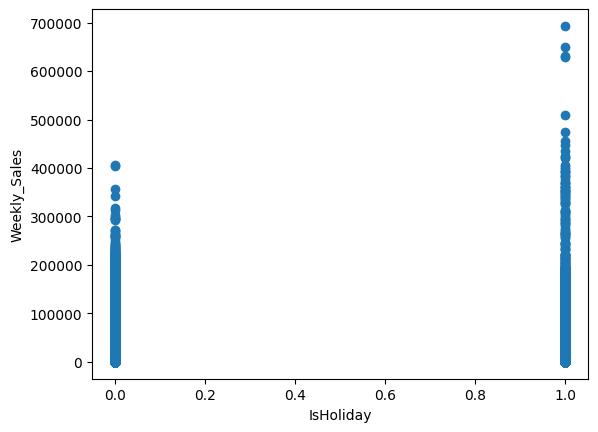

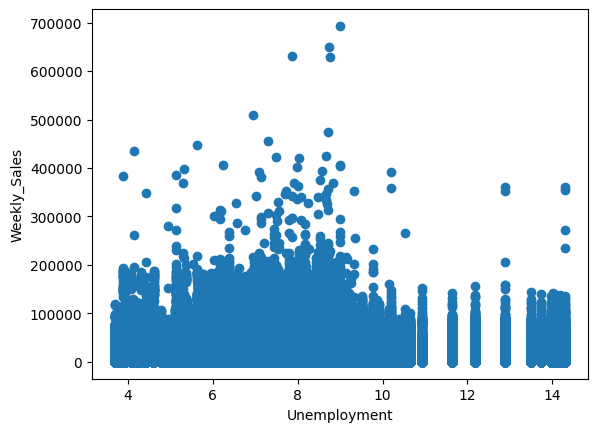

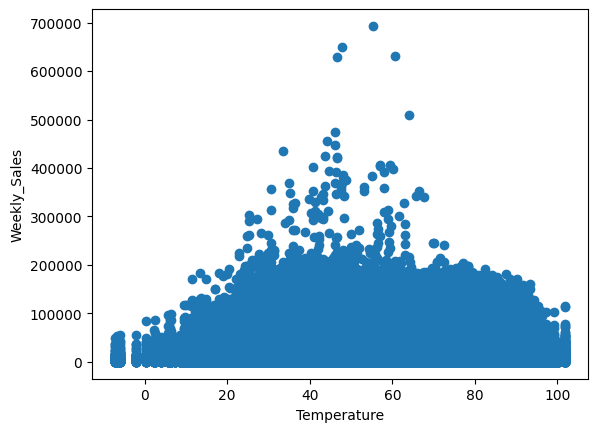

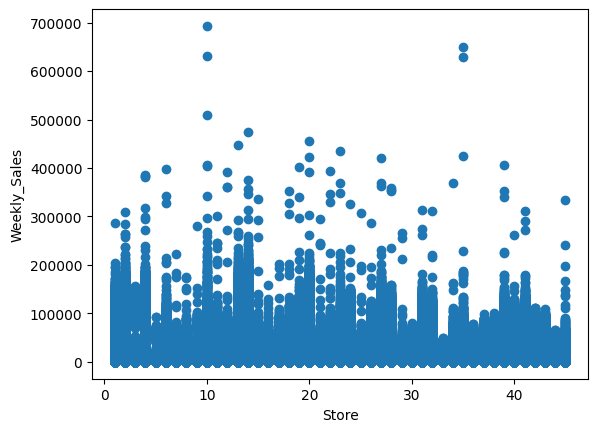

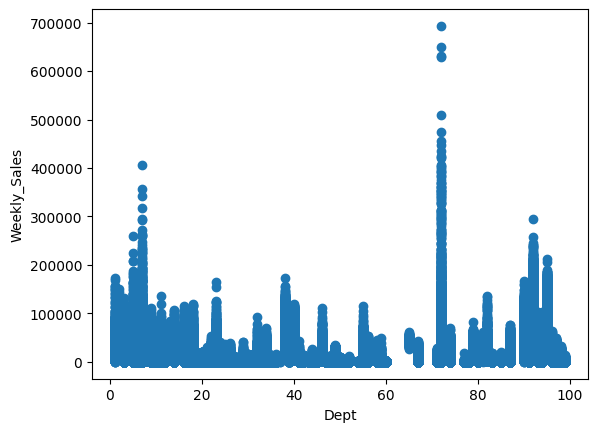

In [ ]:
for i in ['Fuel_Price', 'Size', 'CPI', 'Type', 'IsHoliday', 'Unemployment', 'Temperature', 'Store', 'Dept']:
  scatter(i)

In [ ]:
df_data['Year'] = df_data['Year'].astype(int)
df_data['Month'] = df_data['Month'].astype(int)
df_data['Day'] = df_data['Day'].astype(int)

In [ ]:
sales_2010=df_data[df_data["Year"]==2010].groupby("week")["Weekly_Sales"].mean()
sales_2011=df_data[df_data["Year"]==2011].groupby("week")["Weekly_Sales"].mean()
sales_2012=df_data[df_data["Year"]==2012].groupby("week")["Weekly_Sales"].mean()

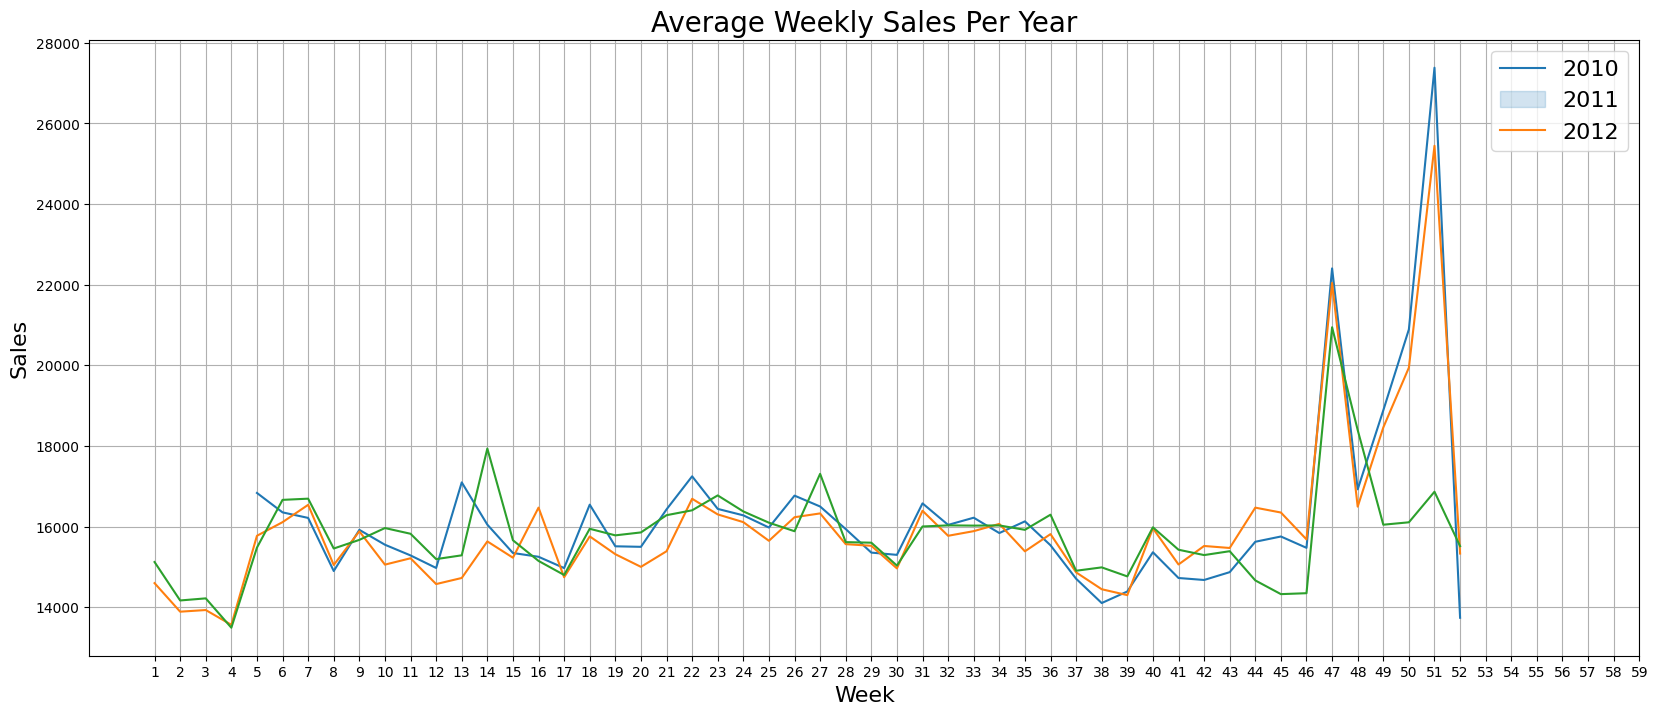

In [ ]:
# Average sales per year
plt.figure(figsize=(20,8))
sns.lineplot(x=sales_2010.index, y=sales_2010.values)
sns.lineplot(x=sales_2011.index, y=sales_2011.values)
sns.lineplot(x=sales_2012.index, y=sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

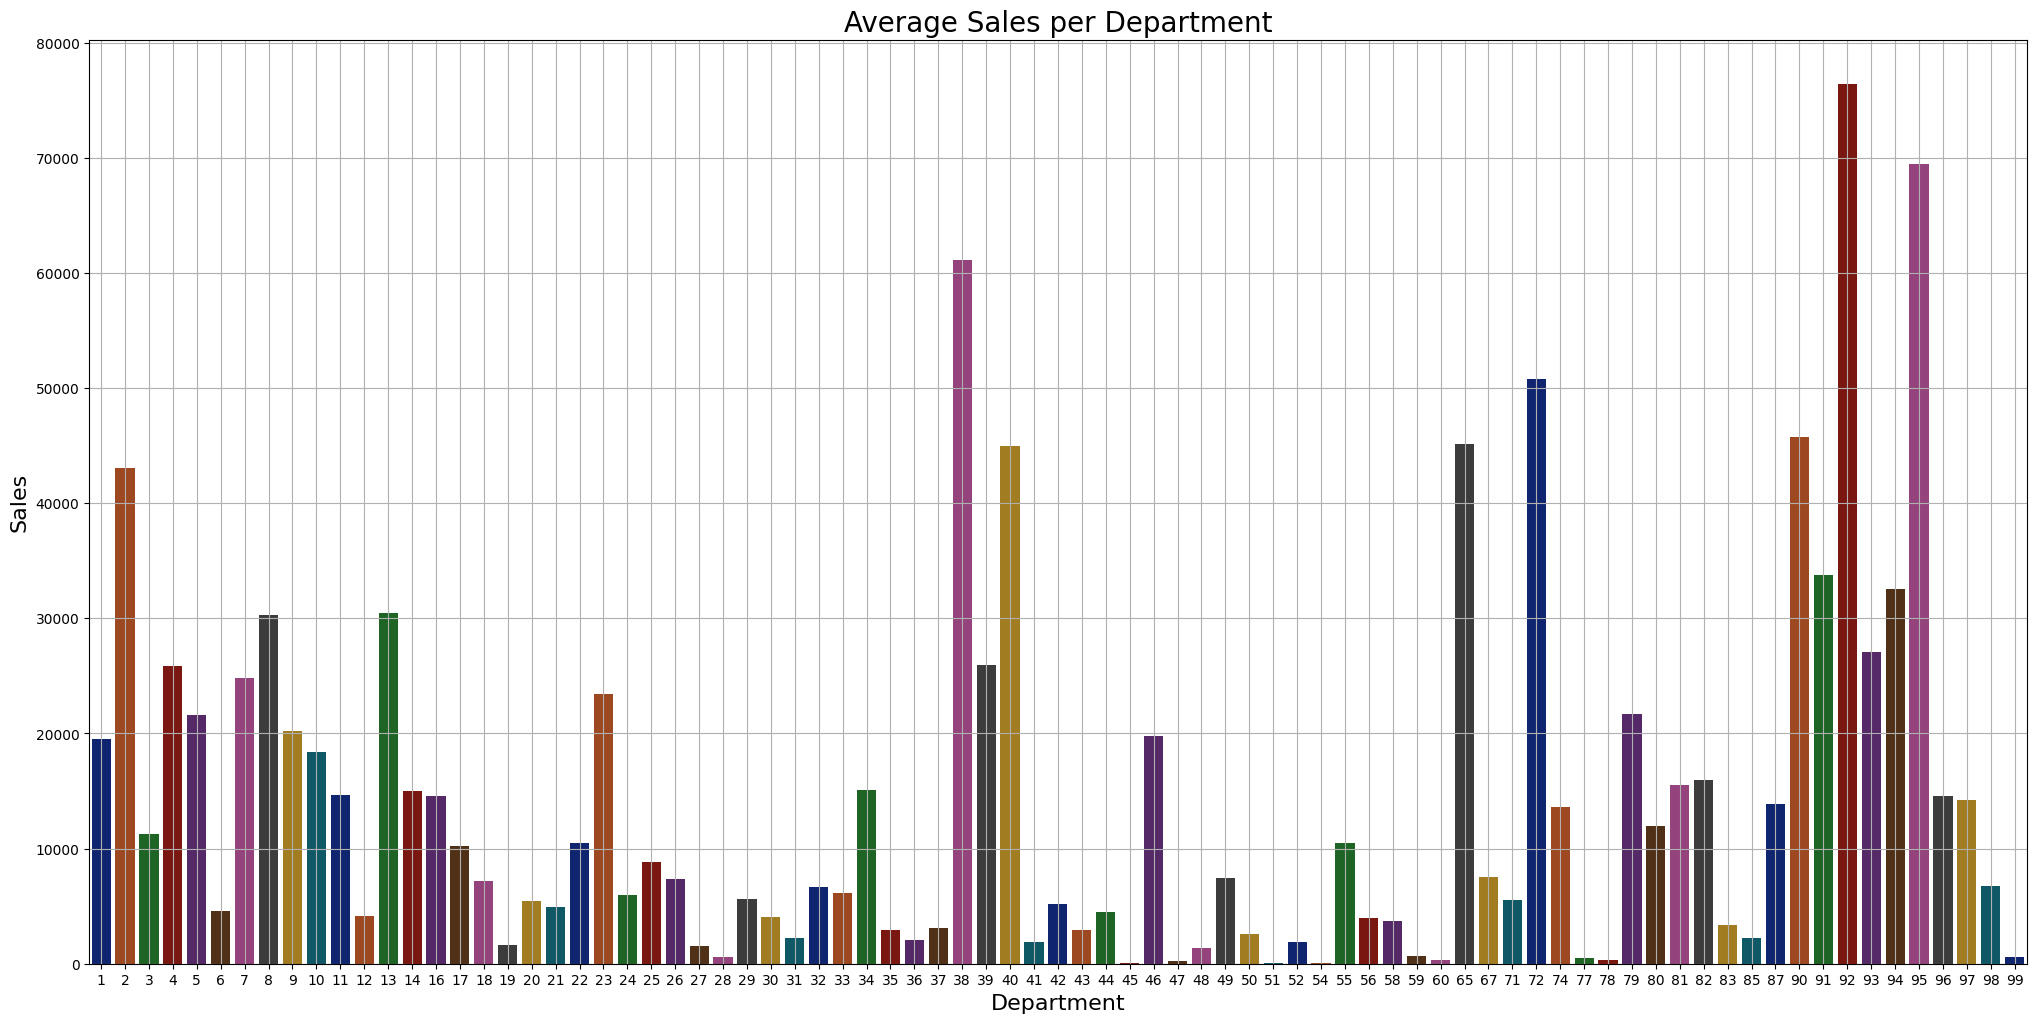

In [ ]:
# Average Sales per Department

sales_dept = df_data.groupby('Dept')["Weekly_Sales"].mean()
plt.figure(figsize=(25,12))
sns.barplot(x=sales_dept.index, y=sales_dept.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

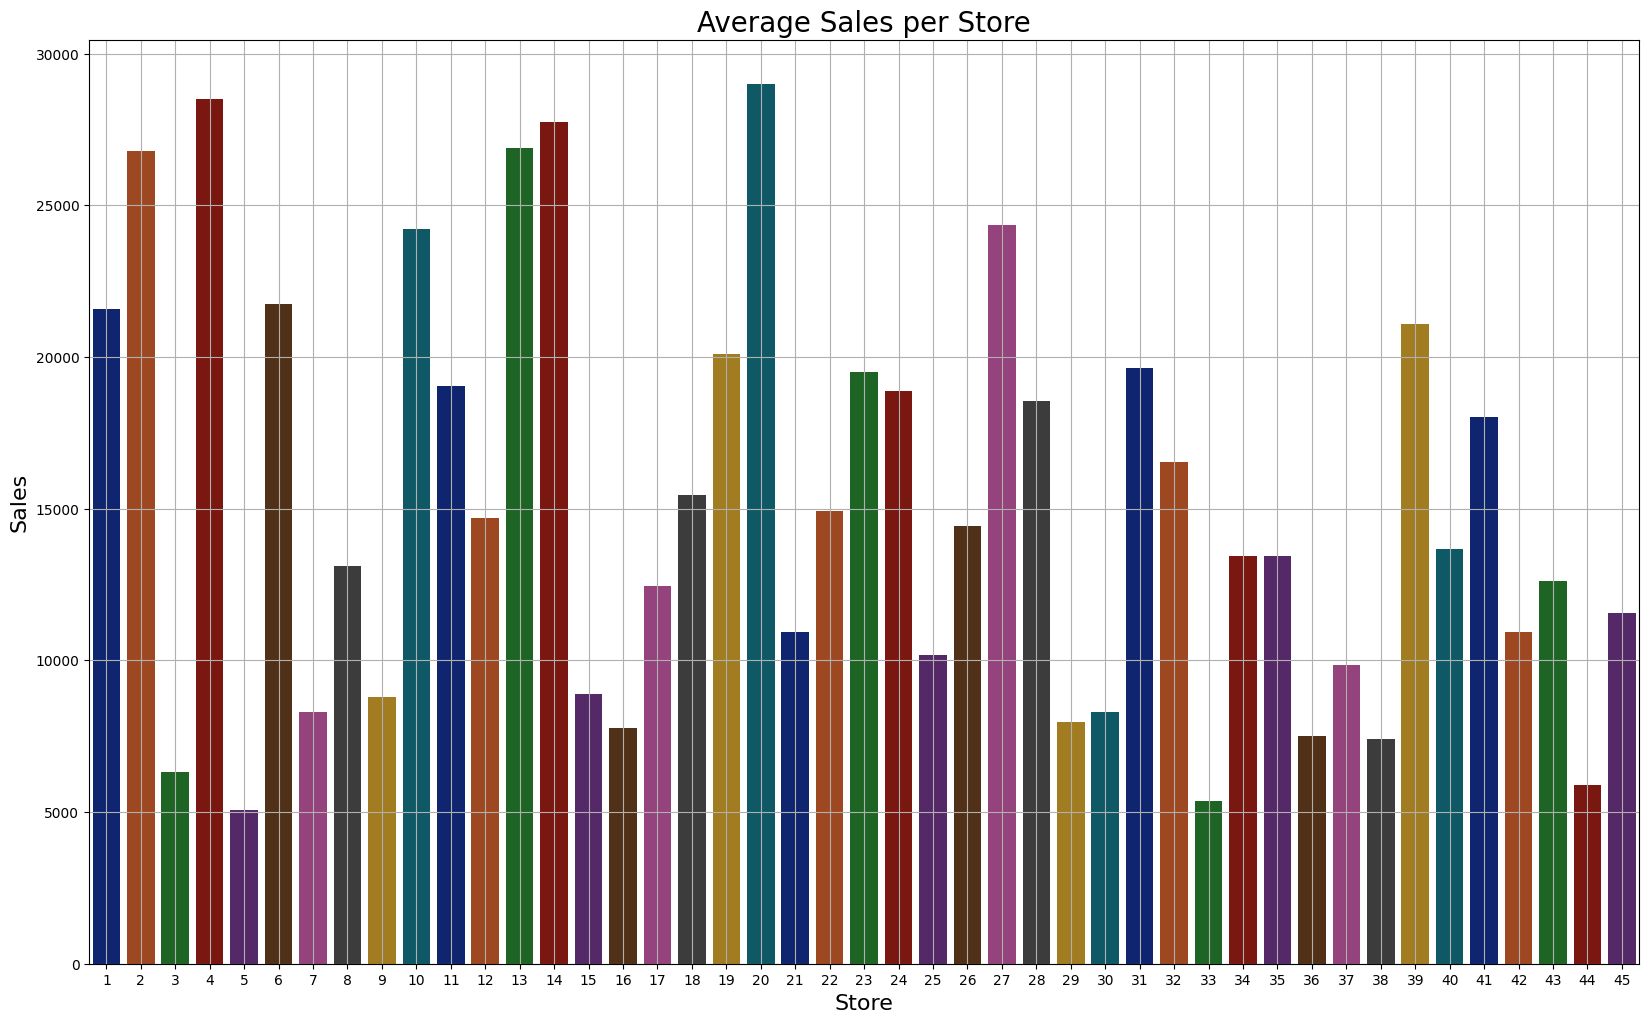

In [ ]:
#Average Sales per Store

sales_store = df_data.groupby('Store')['Weekly_Sales'].mean()
plt.figure(figsize=(20,12))
sns.barplot(x=sales_store.index, y=sales_store.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

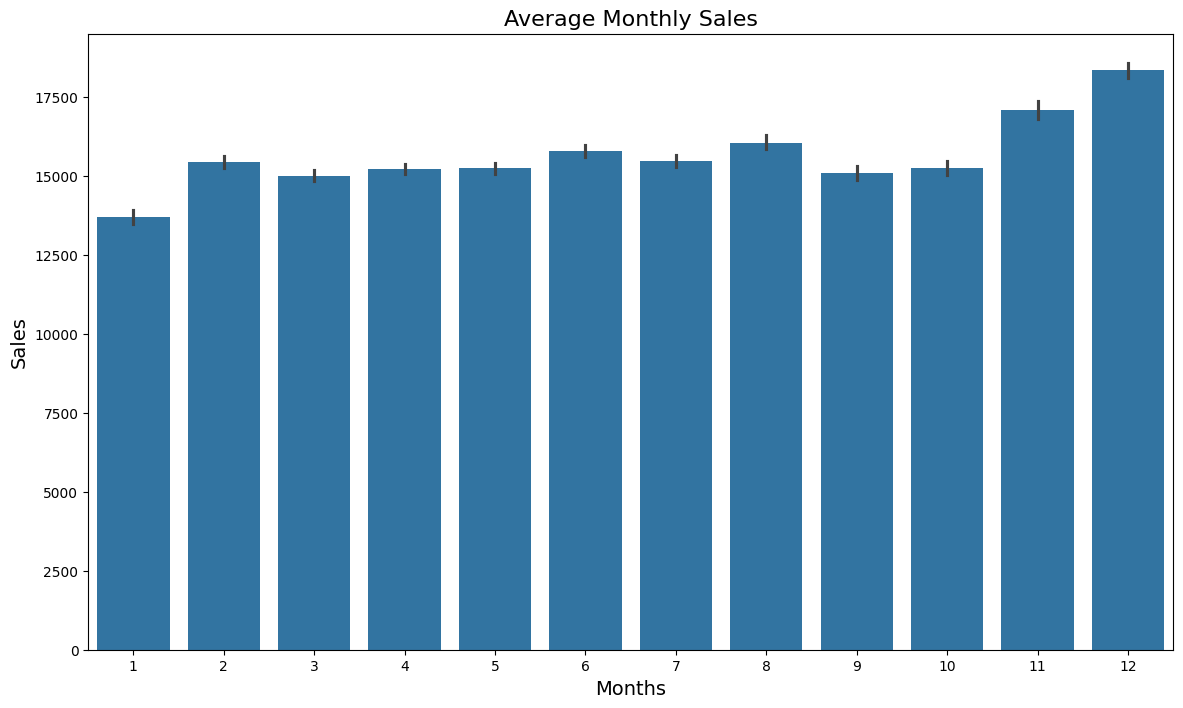

In [ ]:
# Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=df_data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.show()

We our final data with zero null values. Now we are going to try different technique.
1. with Skewness, outlier
  - with scaling prediction
  - without scaling prediction
2. After treating skewness, outlier
   - with scaling prediction
   - without scaling prediction

In [ ]:
weekly_sales_final_data.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'Weekly_Sales', 'Size',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'diff', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [ ]:
#scaled data with outlier and skewness
from sklearn.preprocessing import StandardScaler
x = weekly_sales_final_data.drop(['Weekly_Sales','diff'], axis=1)
y = weekly_sales_final_data['Weekly_Sales']
x_scaled_data_fit = StandardScaler().fit(x)
x_scaled_trans=x_scaled_data_fit.transform(x)
scaled_df = pd.DataFrame(x_scaled_trans, columns=x.columns)

In [ ]:
scaled_df

Day     Month      Year     Store      Dept      Type      Size  \
0      -1.213929 -1.280543 -1.321296 -1.271443  0.078807 -0.888248  1.085350   
1      -1.213929 -1.280543 -1.321296 -1.037011  0.144561  0.605129 -0.167312   
2      -1.213929 -1.280543 -1.321296 -0.880723 -0.841760 -0.888248  1.166941   
3      -1.213929 -1.280543 -1.321296 -0.568146  1.163760  0.605129 -0.201556   
4      -1.213929 -1.280543 -1.321296 -0.177425 -0.841760 -0.888248  1.105560   
...          ...       ...       ...       ...       ...       ...       ...   
551474  1.178951  1.114573  0.576084  1.776179  1.591166  0.605129 -0.291676   
551475  1.178951  1.114573  0.576084  1.776179  1.624043  0.605129 -0.291676   
551476  1.178951  1.114573  0.576084  1.776179  1.656921  0.605129 -0.291676   
551477  1.178951  1.114573  0.576084  1.776179  1.722676  0.605129 -0.291676   
551478  1.178951  1.114573  0.576084  1.776179  1.755553  0.605129 -0.291676   

        IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0       -0.278345    -0.977963   -1.966244   0.434613   0.376909  -0.127764   
1       -0.278345    -1.107476   -1.966244   0.020480  -0.103915  -0.127396   
2       -0.278345    -0.677729   -1.966244   0.987855   0.294824  -0.125471   
3       -0.278345    -2.080429   -1.073145   0.081864   1.377055  -0.127536   
4       -0.278345    -1.754506   -1.470598   1.065909   0.460216  -0.129084   
...           ...          ...         ...        ...        ...        ...   
551474  -0.278345     0.007834    1.096477  -0.387607  -0.389538  -0.123157   
551475  -0.278345     0.007834    1.096477  -0.387607  -0.389538  -0.123157   
551476  -0.278345     0.007834    1.096477  -0.387607  -0.389538  -0.123157   
551477  -0.278345     0.007834    1.096477  -0.387607  -0.389538  -0.123157   
551478  -0.278345     0.007834    1.096477  -0.387607  -0.389538  -0.123157   

        MarkDown4  MarkDown5       CPI  Unemployment  
0        6.319609   0.219360  1.005615     -0.237447  
1        0.518551  -0.107601  1.056735     -0.690484  
2        6.369092   0.156693  1.050937     -0.178939  
3        0.795775   0.005808 -1.033401      0.348172  
4        9.181030   0.219238  0.795032      0.260678  
...           ...        ...       ...           ...  
551474  -0.475202  -0.349351  0.494859      0.518329  
551475  -0.475202  -0.349351  0.494859      0.518329  
551476  -0.475202  -0.349351  0.494859      0.518329  
551477  -0.475202  -0.349351  0.494859      0.518329  
551478  -0.475202  -0.349351  0.494859      0.518329  

[551479 rows x 17 columns]

In [ ]:
scaled_df.describe()

Day         Month          Year         Store          Dept  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   4.865116e-17 -1.814111e-16 -4.244113e-14 -6.761687e-17  1.075969e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.669716e+00 -1.579932e+00 -1.321296e+00 -1.662164e+00 -1.433553e+00   
25%   -8.720895e-01 -9.811532e-01 -1.321296e+00 -8.807227e-01 -8.417599e-01   
50%    3.948387e-02 -8.298480e-02 -3.726061e-01 -2.113685e-02 -2.170897e-01   
75%    8.371105e-01  8.151836e-01  5.760843e-01  8.384490e-01  9.664958e-01   
max    1.748684e+00  1.713352e+00  1.524775e+00  1.776179e+00  1.788430e+00   

               Type          Size     IsHoliday   Temperature    Fuel_Price  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   5.166609e-17 -4.447664e-17 -5.524793e-17 -5.697443e-16 -2.203320e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.882481e-01 -1.653377e+00 -2.783446e-01 -3.531830e+00 -2.200040e+00   
25%   -8.882481e-01 -6.933112e-01 -2.783446e-01 -7.248242e-01 -8.487017e-01   
50%   -8.882481e-01 -1.301592e-01 -2.783446e-01  6.616808e-02  2.594891e-01   
75%    6.051293e-01  1.085350e+00 -2.783446e-01  7.736727e-01  7.785152e-01   
max    2.098507e+00  1.365006e+00  3.592669e+00  2.314449e+00  2.466519e+00   

          MarkDown1     MarkDown2     MarkDown3     MarkDown4     MarkDown5  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean  -2.383082e-16 -4.226054e-17  8.245960e-17 -4.040520e-17  1.440981e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.966725e-01 -3.973068e-01 -1.338809e-01 -5.084664e-01 -4.219521e-01   
25%   -5.827957e-01 -3.856673e-01 -1.328828e-01 -4.660223e-01 -2.495993e-01   
50%   -1.960651e-01 -3.560533e-01 -1.303096e-01 -3.113868e-01 -1.139126e-01   
75%    2.407443e-01 -1.406409e-01 -1.226221e-01  1.807145e-02  6.032889e-02   
max    1.217436e+01  1.358517e+01  1.589773e+01  1.009269e+01  6.809863e+01   

                CPI  Unemployment  
count  5.514790e+05  5.514790e+05  
mean  -5.660980e-16  3.560193e-16  
std    1.000001e+00  1.000001e+00  
min   -1.170784e+00 -2.156411e+00  
25%   -1.004183e+00 -6.292915e-01  
50%    2.493482e-01  7.858190e-03  
75%    1.050755e+00  4.410341e-01  
max    1.416818e+00  3.548950e+00

In [ ]:
import pickle

pickle_=open("x_scaled_data_skewness_outlier","wb")
pickle.dump(x_scaled_data_fit,pickle_)
pickle_.close()

**Prediction with skewness and outlier**

In [ ]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict weekly_sales
def machine_learning_regression(x,y, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)


    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [ ]:
print("Prediction with skewness and outlier after scaled")
print(machine_learning_regression(scaled_df,y, DecisionTreeRegressor))
print(machine_learning_regression(scaled_df,y, ExtraTreesRegressor))
print(machine_learning_regression(scaled_df,y, RandomForestRegressor))
print(machine_learning_regression(scaled_df,y, AdaBoostRegressor))
print(machine_learning_regression(scaled_df,y, GradientBoostingRegressor))
print(machine_learning_regression(scaled_df,y, XGBRegressor))

Prediction with skewness and outlier after scaled
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9625021089591611}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9809555795877758}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9971729093797237, 'R2_test': 0.9804376175019892}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.24956117363044727, 'R2_test': -0.284388195007063}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7551431722874777, 'R2_test': 0.7505653387102666}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9516315356327585, 'R2_test': 0.9482296739506091}


In [ ]:
print("Prediction with skewness and outlier before scaling")
print(machine_learning_regression(x,y, DecisionTreeRegressor))
print(machine_learning_regression(x,y, ExtraTreesRegressor))
print(machine_learning_regression(x,y, RandomForestRegressor))
print(machine_learning_regression(x,y, AdaBoostRegressor))
print(machine_learning_regression(x,y, GradientBoostingRegressor))
print(machine_learning_regression(x,y, XGBRegressor))

Prediction with skewness and outlier before scaling
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9623078898628951}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9804288392699794}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9970851730683737, 'R2_test': 0.9805151594409326}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.43380956184389685, 'R2_test': -0.47091418046645006}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7551431722874777, 'R2_test': 0.7505653387102666}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9516315356327585, 'R2_test': 0.9482296739506091}


In [ ]:
# we got good accuracy after scaling with skewness and outlier data
# XGBClassifier is good interpretability, so i select the algorithm

In [ ]:
# GridsearchCV is a cross validation function.
# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.
# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.
# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.2,random_state=42)

param_grid_r = { 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}


grid_search_r = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search_r.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
grid_search_r.best_score_

0.9431321710291787

In [ ]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x_train, x_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.2,random_state=42)

model = XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9483860068118315, 0.9444206571531412)

The training accuracy is higher than the test accuracy, which is expected. It indicates that the model is able to effectively learn from the training data and generalize well to unseen data.
The relatively small difference between the training and test accuracies suggests that the model is not overfitting excessively.
Overall, the model appears to perform well on both the training and test datasets, indicating that it has learned meaningful patterns from the data and can make accurate predictions on new, unseen data.

In [ ]:
# predict the weeklysales with hypertuning parameters and calculate the accuracy using metrics

model_reg =  XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred = model_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9444206571531412,
 'Mean Absolute Error': 3056.401625312594,
 'Mean Squared Error': 27709638.73980249,
 'Root Mean Squared Error': 5263.994561148643}

In [ ]:
# save the regression model by using pickle
pickle.dump(model_reg, open('model_XGB_regression_with skewness and outlier after scaled.pkl', 'wb'))
pickle_.close()

**Prediction without skewness and outlier**

In [ ]:
without_skewness=weekly_sales_final_data.copy()

In [ ]:
without_skewness

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      197.4944  202505          0   
1         5      2  2010      9    49     2       45.7228  125833          0   
2         5      2  2010     11    19     1      531.7284  207499          0   
3         5      2  2010     15    80     2       51.4807  123737          0   
4         5      2  2010     20    19     1      152.4840  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2     2487.8000  118221          0   
551475   26     10  2012     45    94     2     5203.3100  118221          0   
551476   26     10  2012     45    95     2    56017.4700  118221          0   
551477   26     10  2012     45    97     2     6817.4800  118221          0   
551478   26     10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price            diff   MarkDown1   MarkDown2  \
0             40.43       2.572     522010-6-47  10509.6364   5787.2989   
1             38.01       2.572     522010-9-49   7240.4085   2193.1258   
2             46.04       2.572    522010-11-19  14877.0137   5173.7096   
3             19.83       2.954    522010-15-80   7724.9841  13263.4273   
4             25.92       2.784    522010-20-19  15493.1773   6410.0212   
...             ...         ...             ...         ...         ...   
551474        58.85       3.882  26102012-45-93   4018.9100     58.0800   
551475        58.85       3.882  26102012-45-94   4018.9100     58.0800   
551476        58.85       3.882  26102012-45-95   4018.9100     58.0800   
551477        58.85       3.882  26102012-45-97   4018.9100     58.0800   
551478        58.85       3.882  26102012-45-98   4018.9100     58.0800   

        MarkDown3   MarkDown4  MarkDown5         CPI  Unemployment  
0         57.0504  43459.8164  7260.8894  212.622352         7.259  
1         60.4772   6537.0184  3579.9553  214.655459         6.415  
2         78.4259  43774.7682  6555.3884  214.424881         7.368  
3         59.1715   8301.5037  4856.7133  131.527903         8.350  
4         44.7354  61672.2986  7259.5157  204.247194         8.187  
...           ...         ...        ...         ...           ...  
551474   100.0000    211.9400   858.3300  192.308899         8.667  
551475   100.0000    211.9400   858.3300  192.308899         8.667  
551476   100.0000    211.9400   858.3300  192.308899         8.667  
551477   100.0000    211.9400   858.3300  192.308899         8.667  
551478   100.0000    211.9400   858.3300  192.308899         8.667  

[551479 rows x 19 columns]

#Skewness Handling - Feature Scaling (Log Transformation)

In [ ]:
#find outliers - box plot & skewed data - hist plot and violin plot
def plot(data,column):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data=data,x=column)
  plt.title(f'Boxplot for {column}')

  plt.subplot(1,3,2)
  sns.histplot(data=data, x=column, kde=True, bins=50)
  plt.title(f'Distribution Plot for {column}')

  plt.subplot(1,3,3)
  sns.violinplot(data=data, x=column)
  plt.title(f'Violin Plot for {column}')
  plt.show()

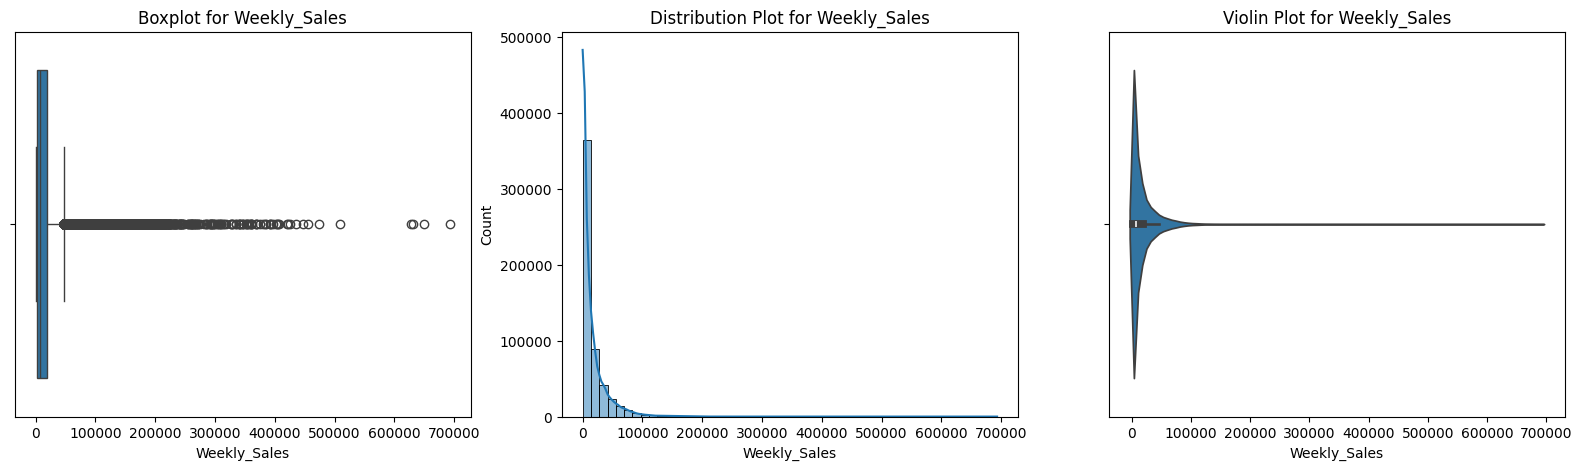

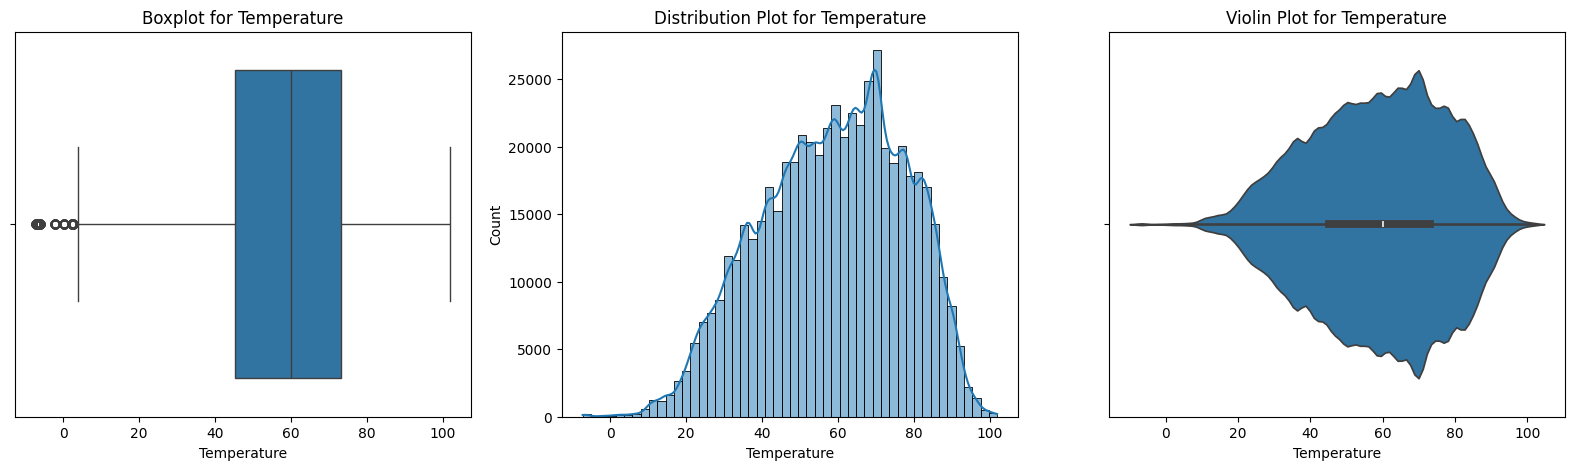

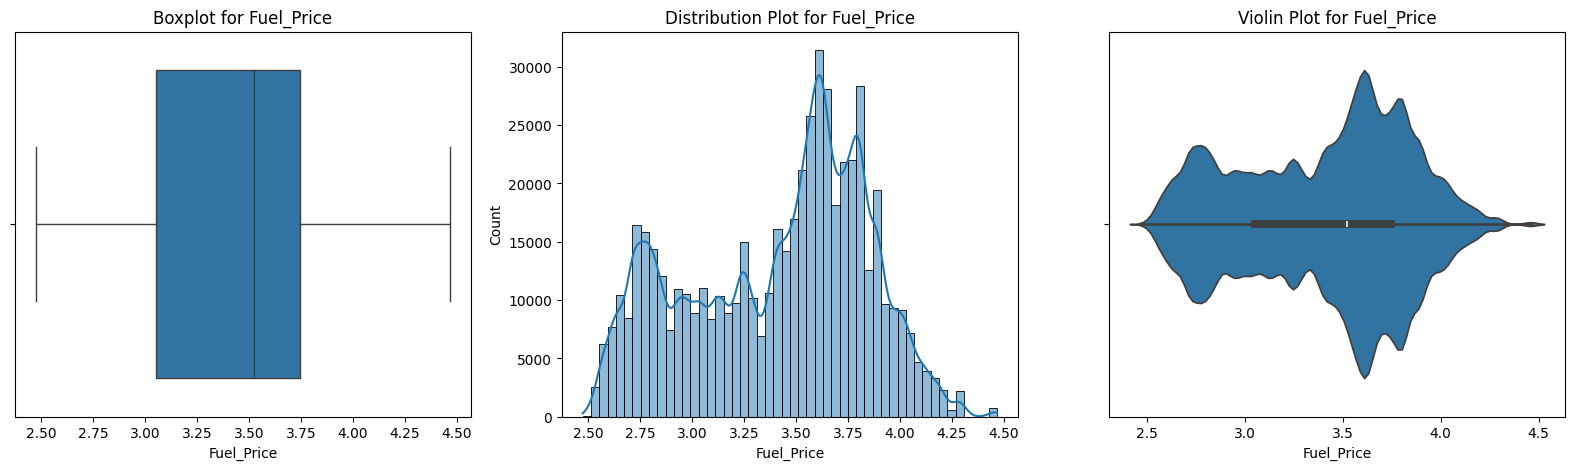

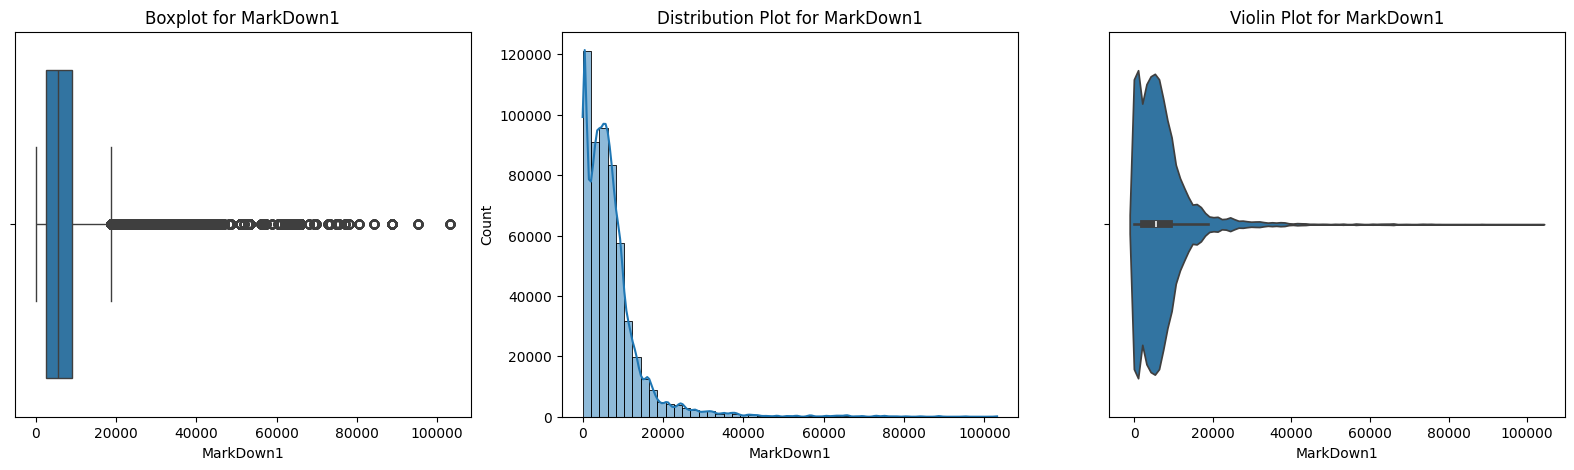

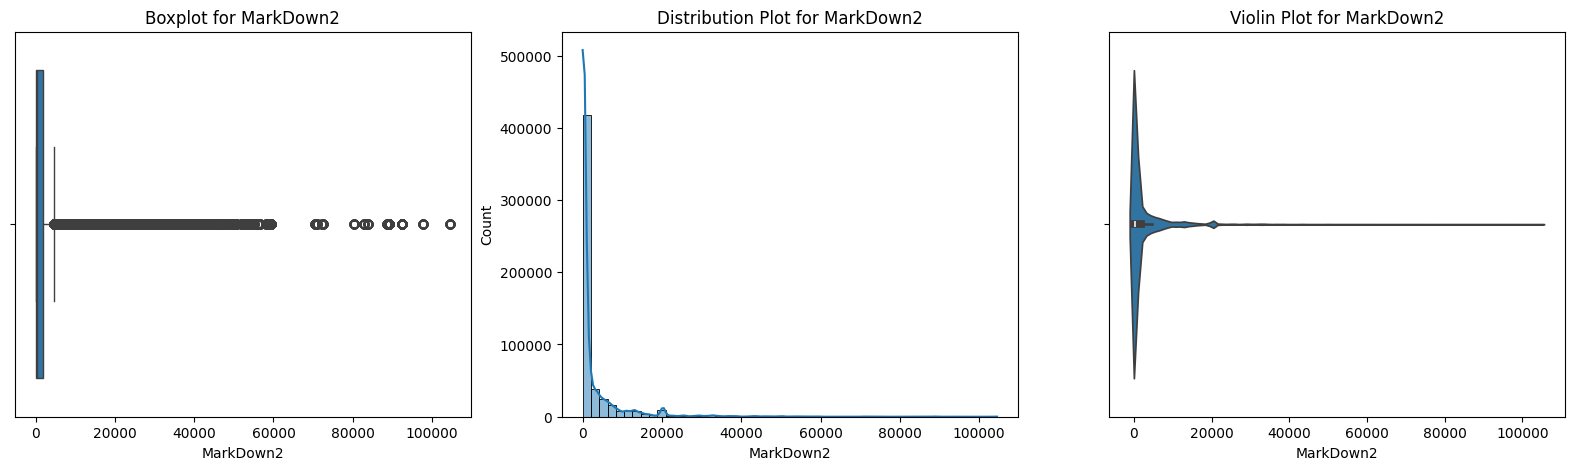

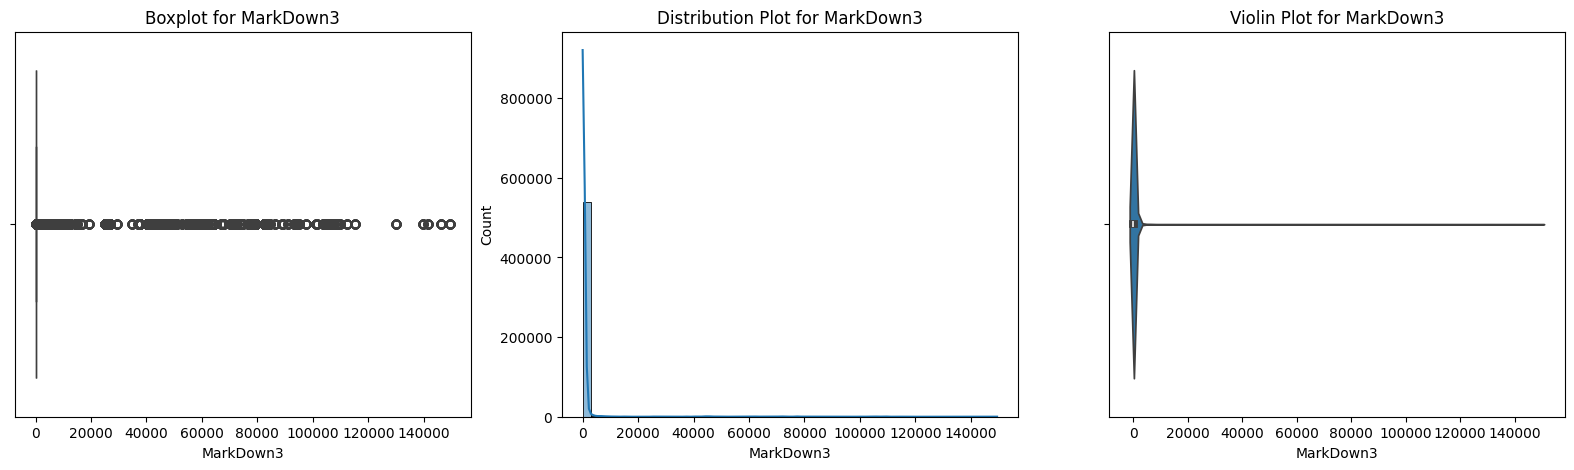

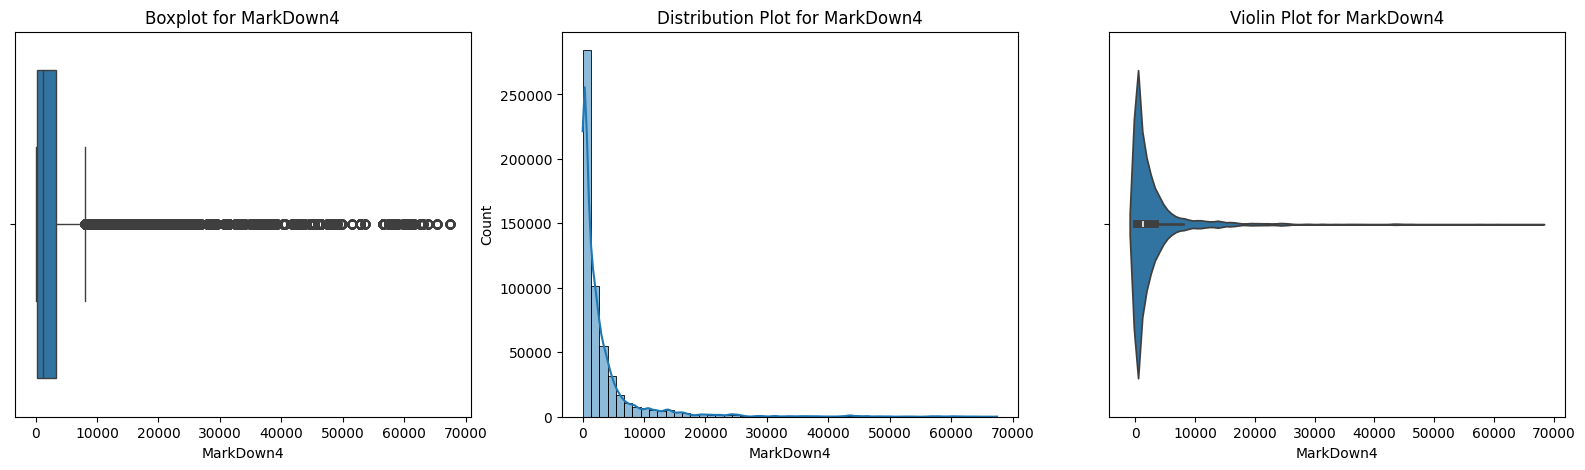

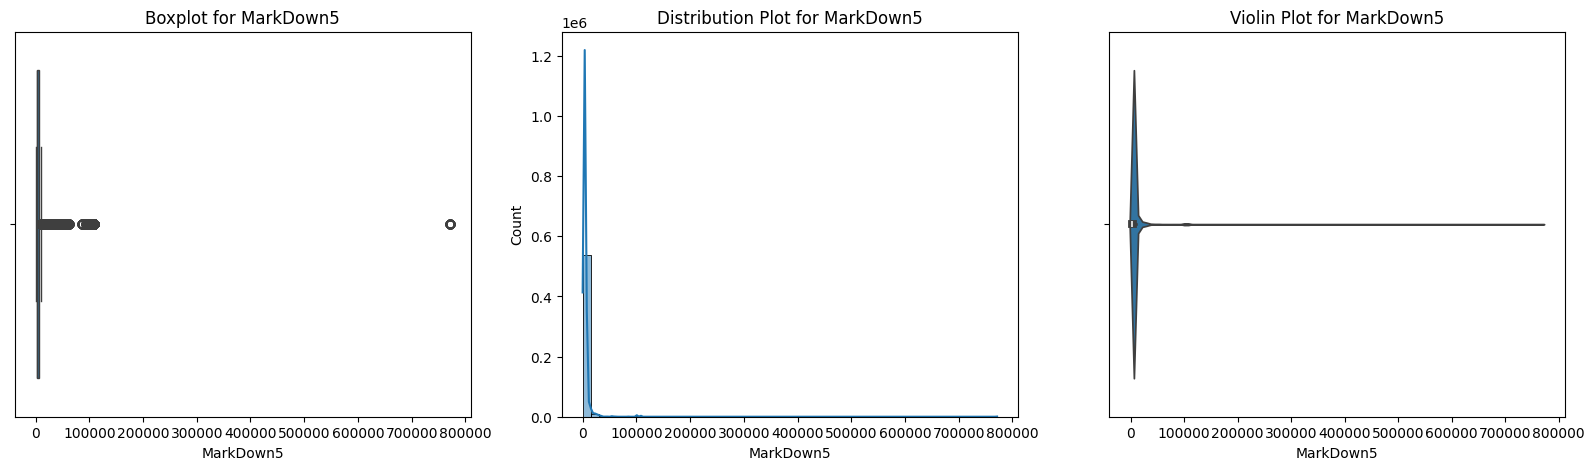

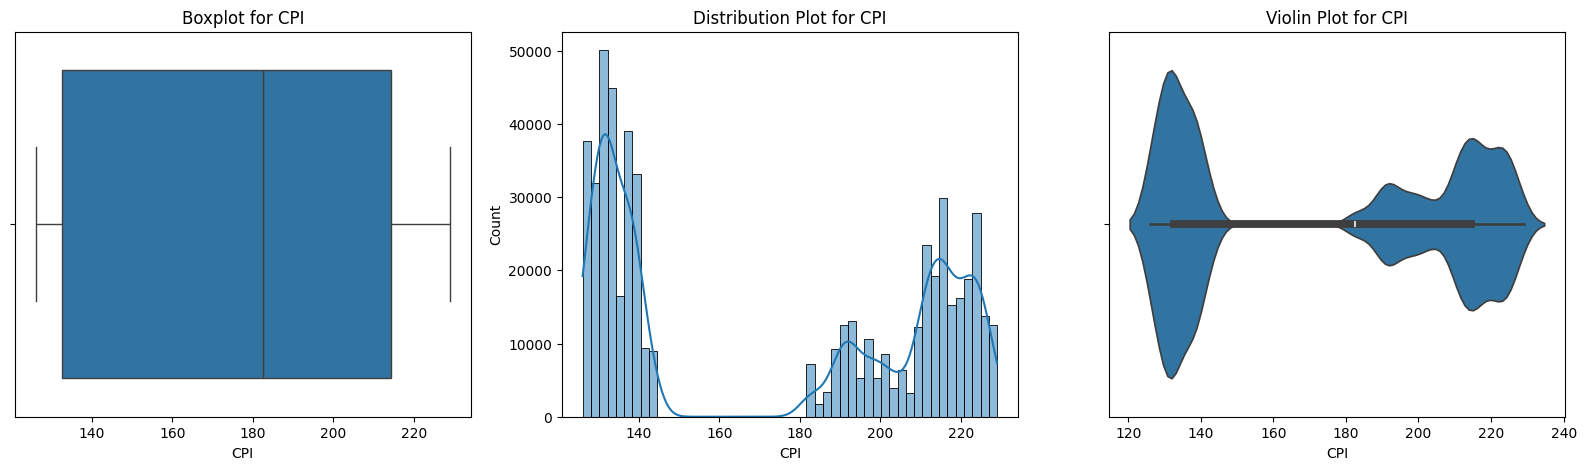

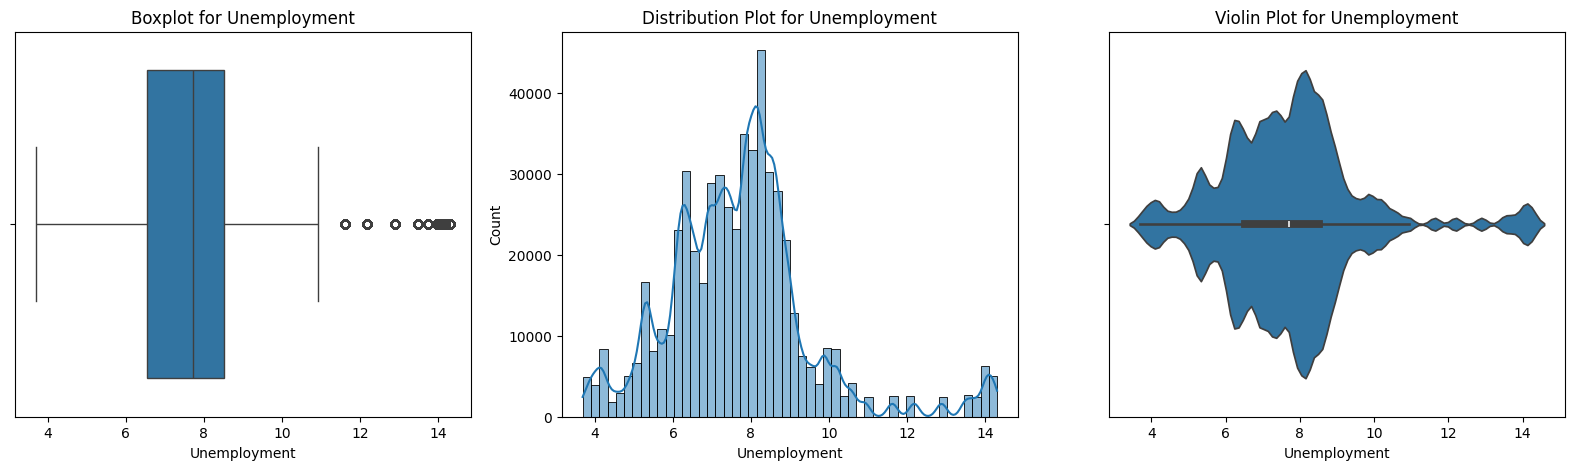

In [ ]:
for i in [ 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']:
    plot(without_skewness, i)

In [ ]:
for i in [ 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']:
    skewness=without_skewness[i].skew()
    print(f'column:{i}, skew:{skewness}')

column:Weekly_Sales, skew:3.3327944100314433
column:Temperature, skew:-0.26374392475013025
column:Fuel_Price, skew:-0.334720891706735
column:MarkDown1, skew:3.9906091063876716
column:MarkDown2, skew:5.294745351907932
column:MarkDown3, skew:9.689902845736272
column:MarkDown4, skew:4.848598916048672
column:MarkDown5, skew:46.101679524844776
column:CPI, skew:0.0897330115966294
column:Unemployment, skew:0.988308108774052


In [ ]:
#weekly_Sales and Markdowns data are skewd. so using the log transformation method to handle the skewness data
without_skewness['Weekly_Sales'] = np.log(without_skewness['Weekly_Sales'])
without_skewness['MarkDown1'] = np.log(without_skewness['MarkDown1'])
without_skewness['MarkDown2'] = np.log(without_skewness['MarkDown2'])
without_skewness['MarkDown3'] = np.log(without_skewness['MarkDown3'])
without_skewness['MarkDown4'] = np.log(without_skewness['MarkDown4'])
without_skewness['MarkDown5'] = np.log(without_skewness['MarkDown5'])

In [ ]:
without_skewness

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      5.285710  202505          0   
1         5      2  2010      9    49     2      3.822597  125833          0   
2         5      2  2010     11    19     1      6.276133  207499          0   
3         5      2  2010     15    80     2      3.941207  123737          0   
4         5      2  2010     20    19     1      5.027060  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2      7.819154  118221          0   
551475   26     10  2012     45    94     2      8.557050  118221          0   
551476   26     10  2012     45    95     2     10.933419  118221          0   
551477   26     10  2012     45    97     2      8.827245  118221          0   
551478   26     10  2012     45    98     2      6.981749  118221          0   

        Temperature  Fuel_Price            diff  MarkDown1  MarkDown2  \
0             40.43       2.572     522010-6-47   9.260048   8.663421   
1             38.01       2.572     522010-9-49   8.887433   7.693083   
2             46.04       2.572    522010-11-19   9.607573   8.551345   
3             19.83       2.954    522010-15-80   8.952215   9.492766   
4             25.92       2.784    522010-20-19   9.648155   8.765618   
...             ...         ...             ...        ...        ...   
551474        58.85       3.882  26102012-45-93   8.298766   4.061821   
551475        58.85       3.882  26102012-45-94   8.298766   4.061821   
551476        58.85       3.882  26102012-45-95   8.298766   4.061821   
551477        58.85       3.882  26102012-45-97   8.298766   4.061821   
551478        58.85       3.882  26102012-45-98   8.298766   4.061821   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0        4.043935  10.679592   8.890258  212.622352         7.259  
1        4.102266   8.785236   8.183106  214.655459         6.415  
2        4.362154  10.686813   8.788043  214.424881         7.368  
3        4.080440   9.024192   8.488117  131.527903         8.350  
4        3.800765  11.029590   8.890068  204.247194         8.187  
...           ...        ...        ...         ...           ...  
551474   4.605170   5.356303   6.754989  192.308899         8.667  
551475   4.605170   5.356303   6.754989  192.308899         8.667  
551476   4.605170   5.356303   6.754989  192.308899         8.667  
551477   4.605170   5.356303   6.754989  192.308899         8.667  
551478   4.605170   5.356303   6.754989  192.308899         8.667  

[551479 rows x 19 columns]

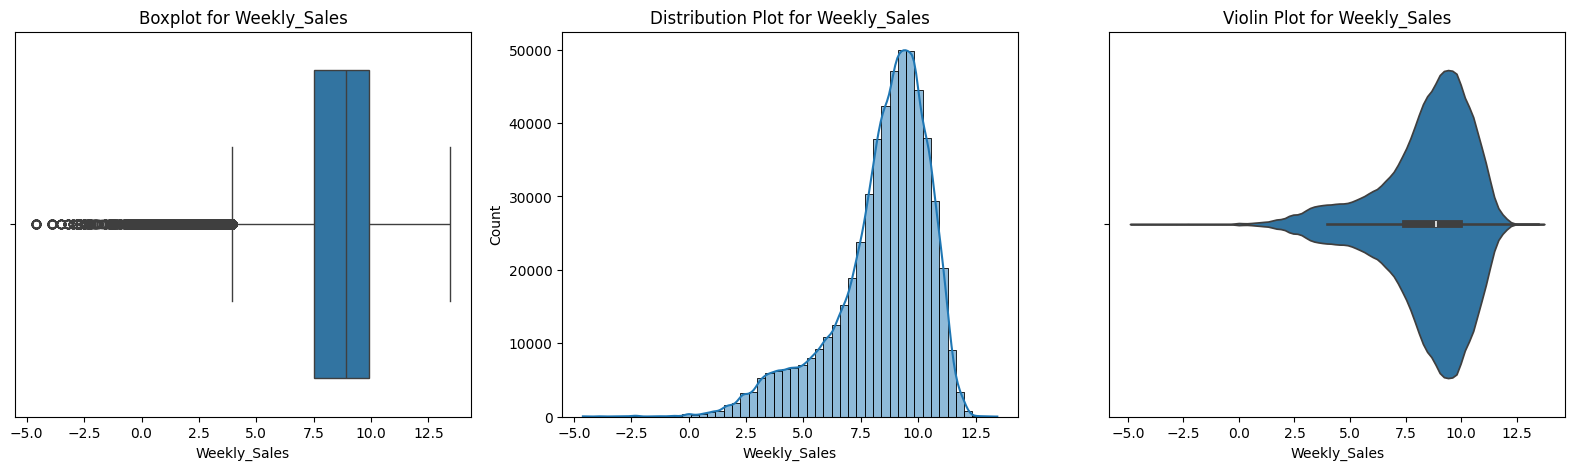

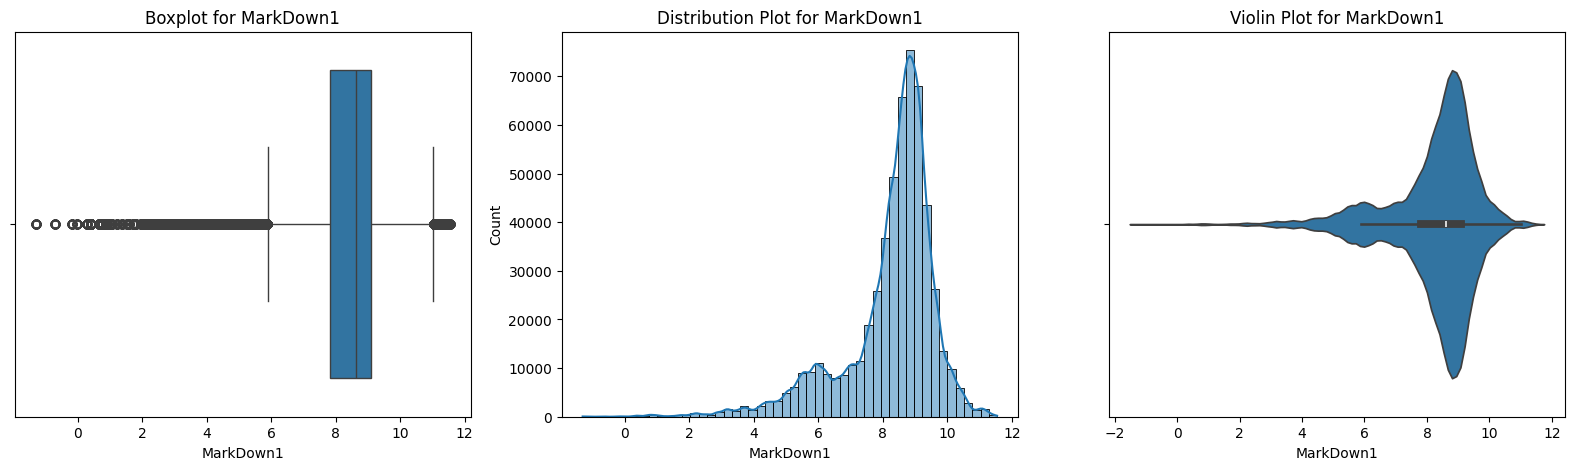

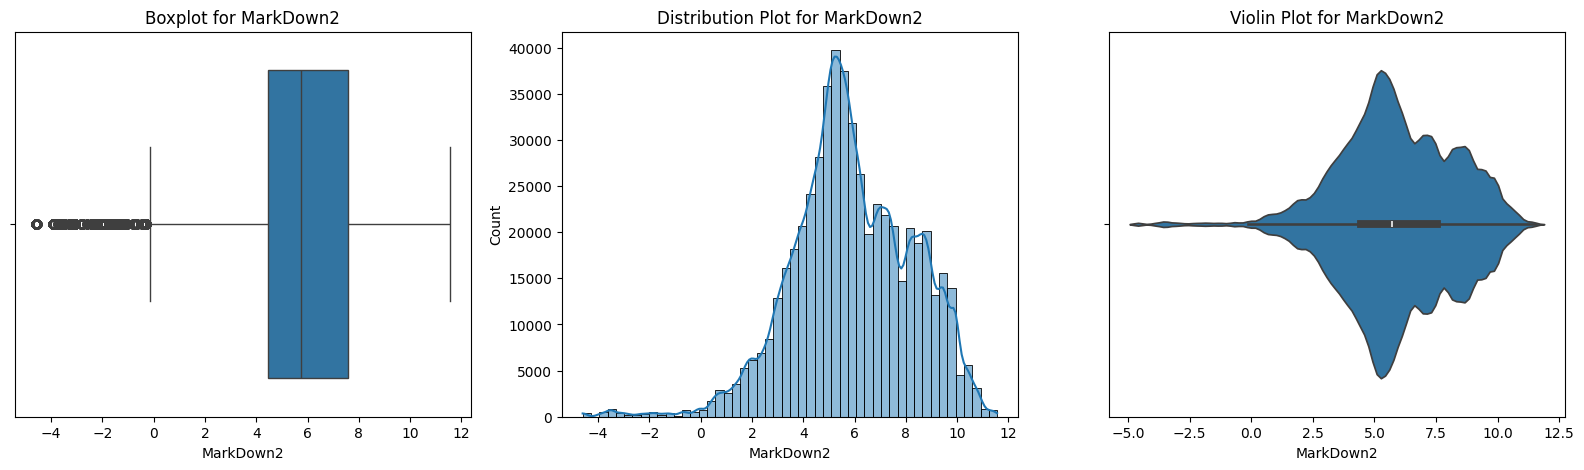

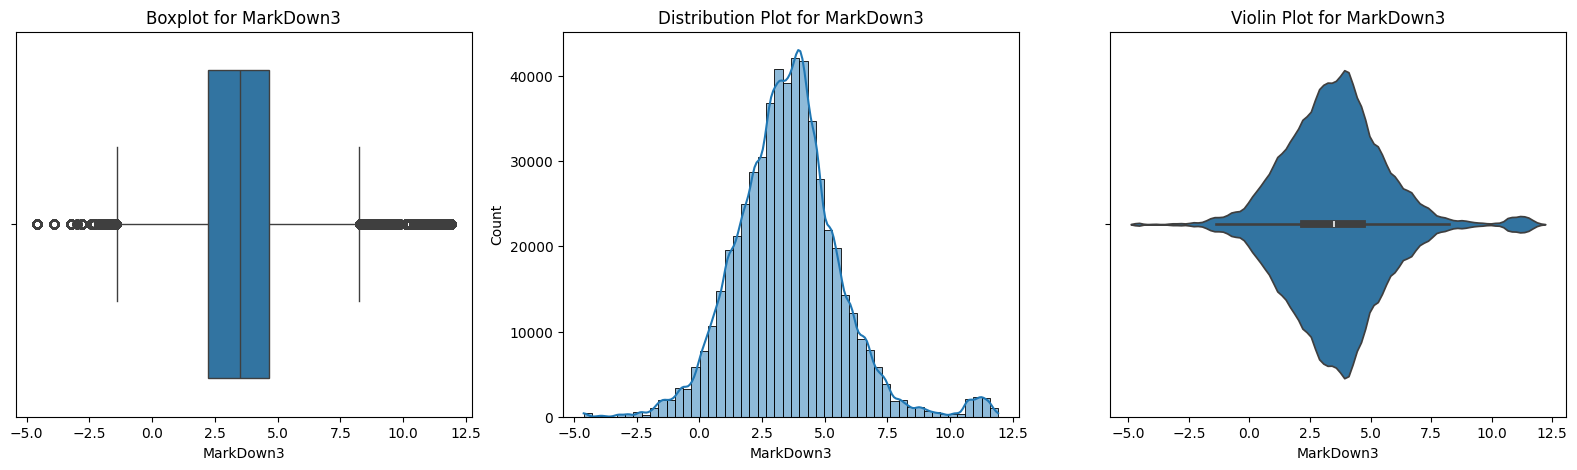

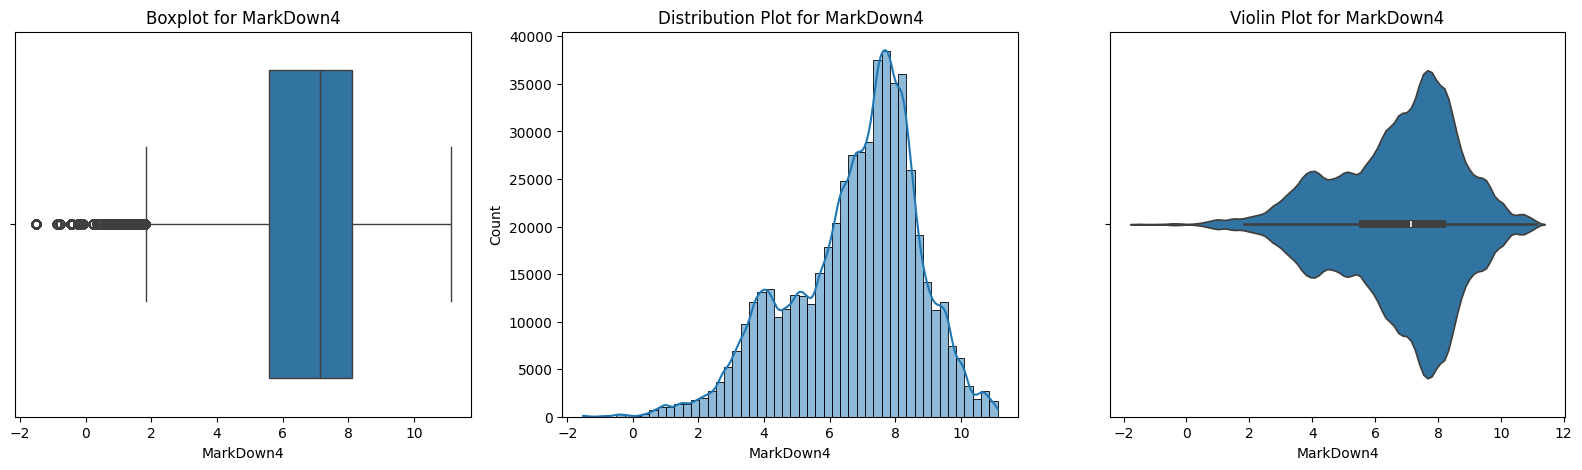

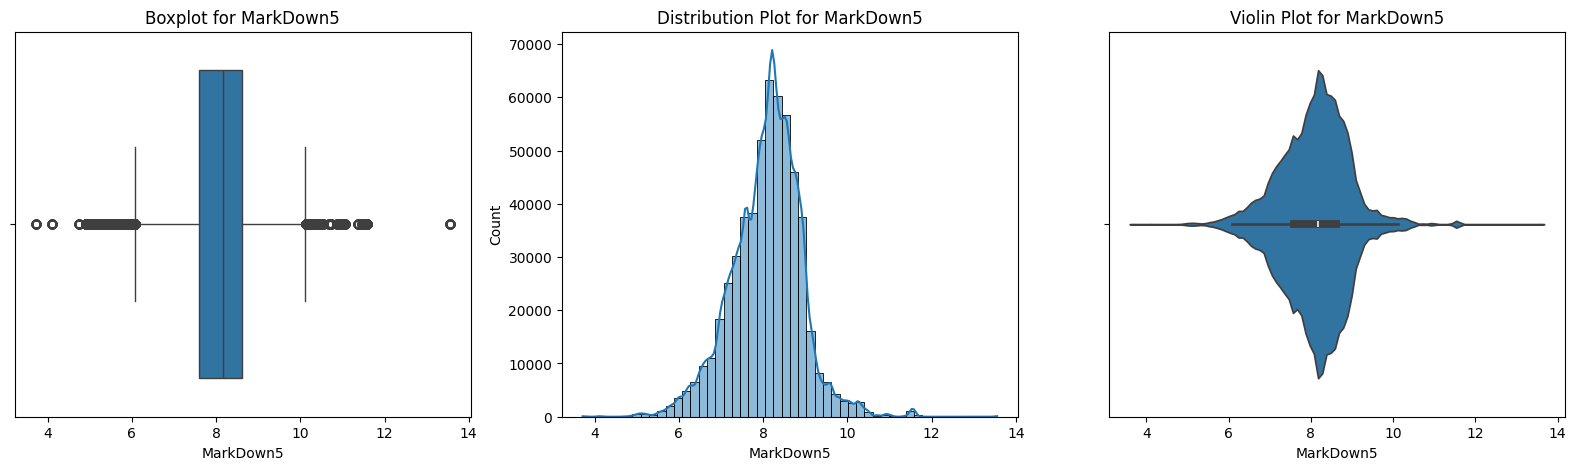

In [ ]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in [ 'Weekly_Sales',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5'] :
    plot(without_skewness, i)

In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features
for i in [ 'Weekly_Sales',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Unemployment']:
    outlier(without_skewness, i)

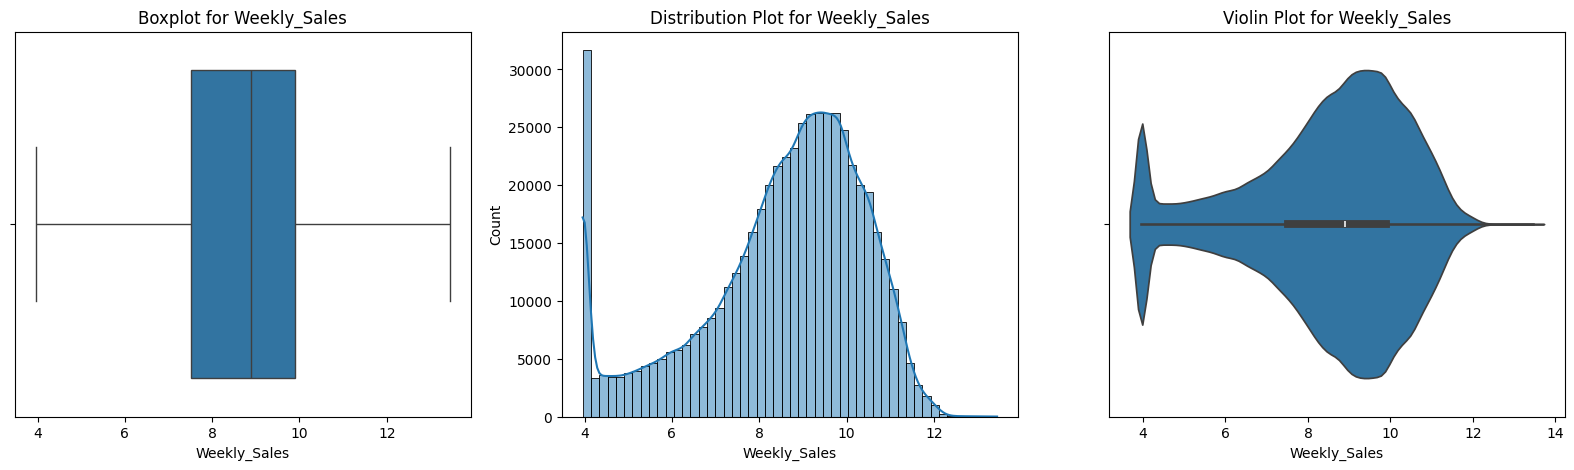

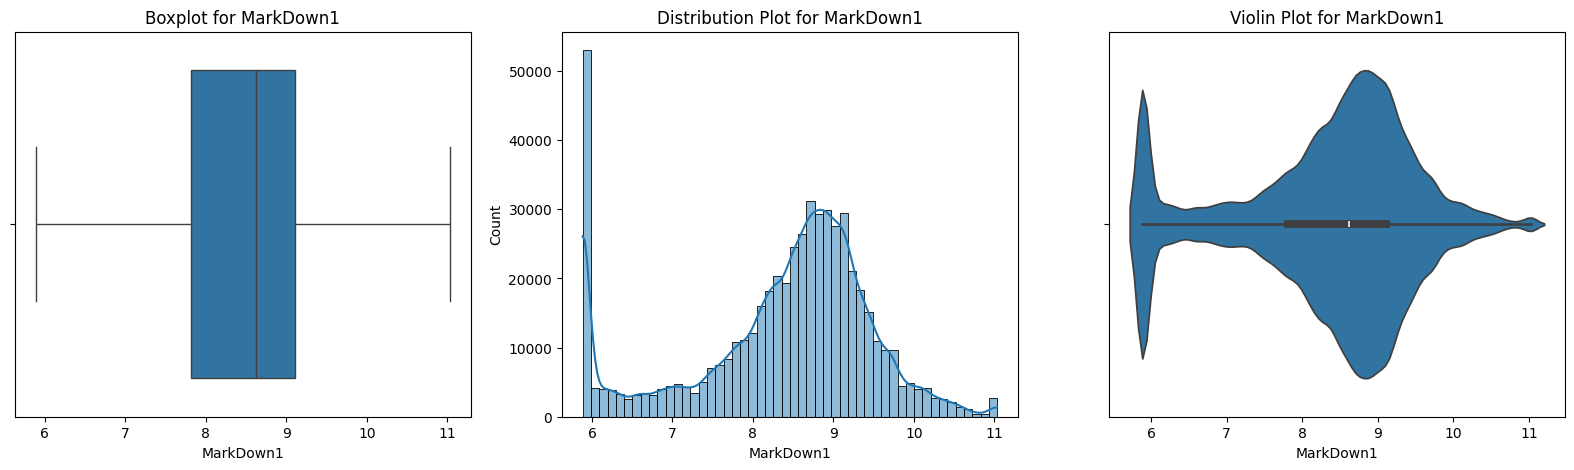

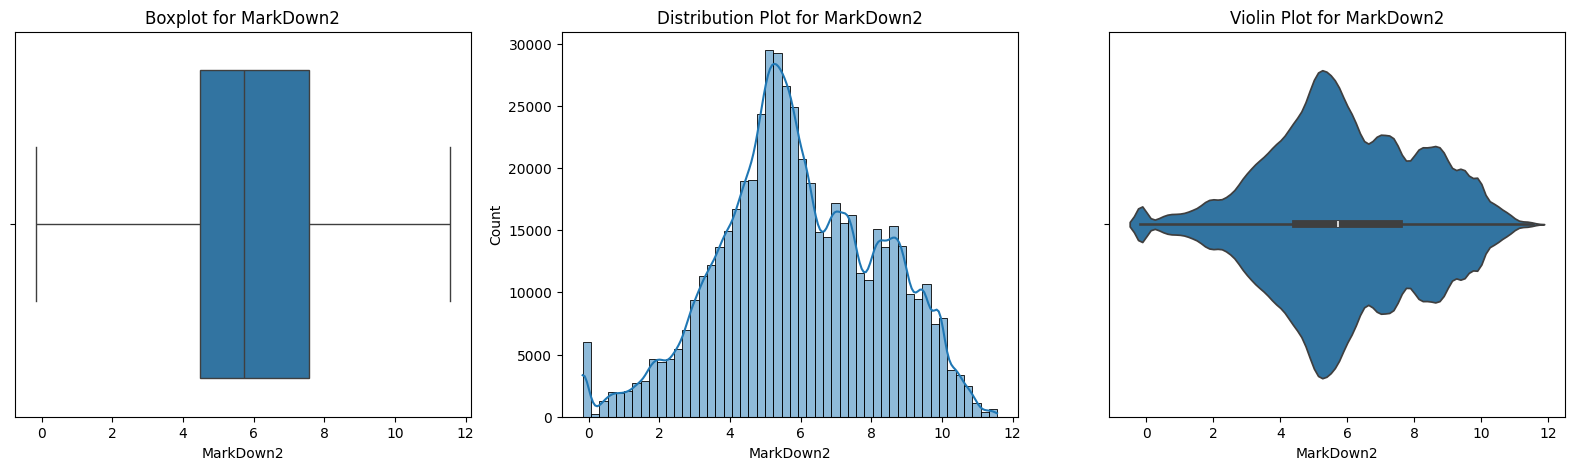

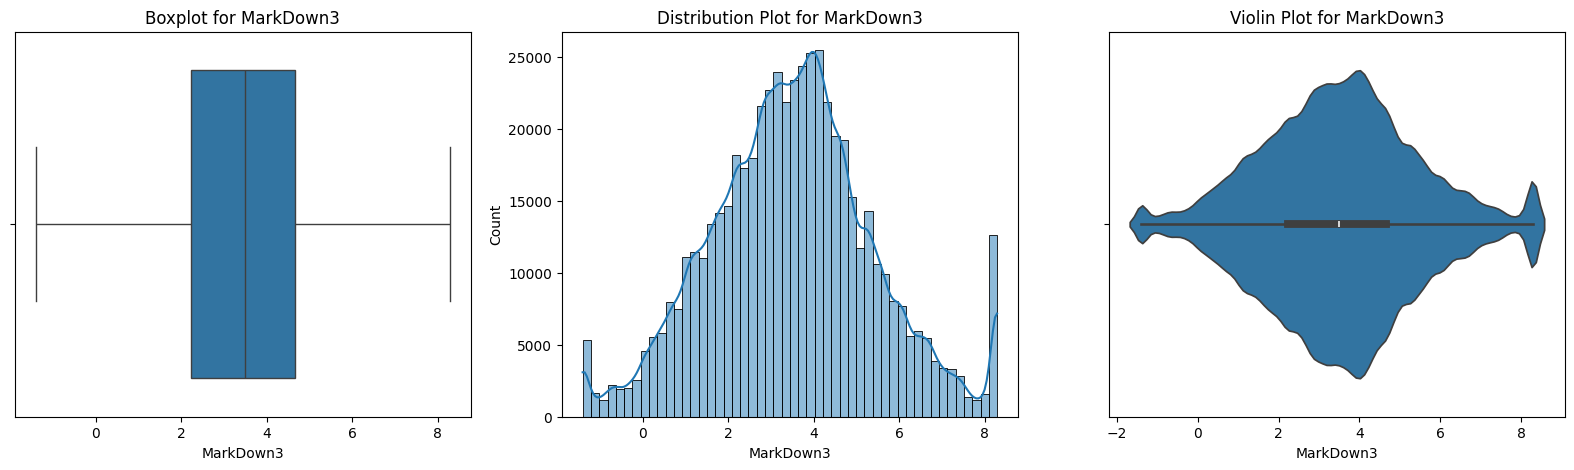

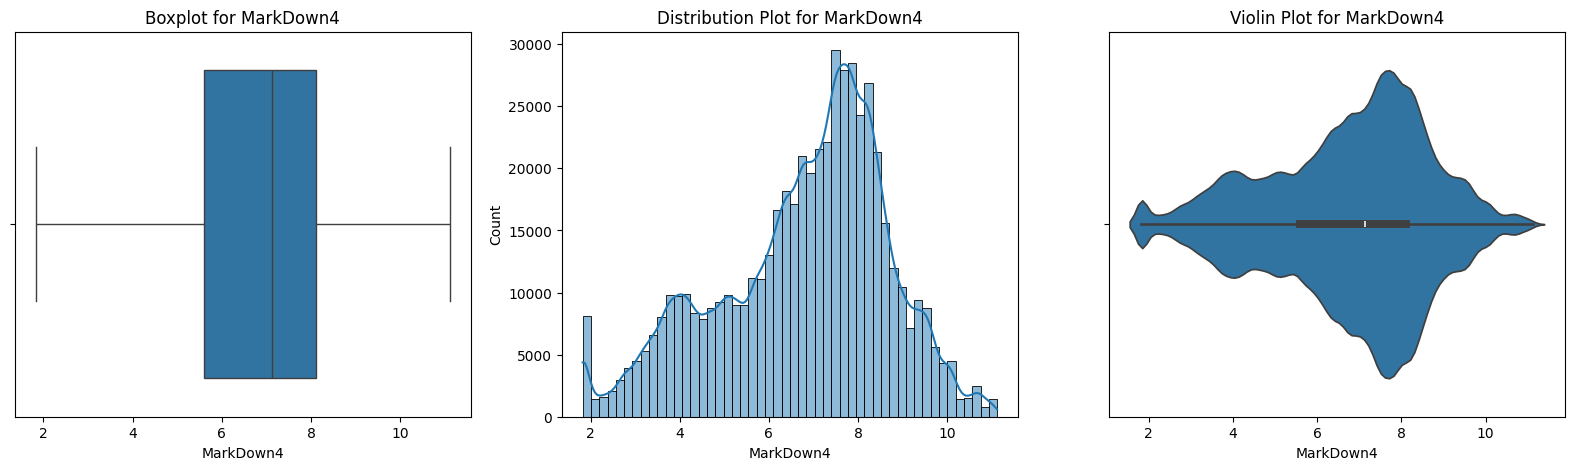

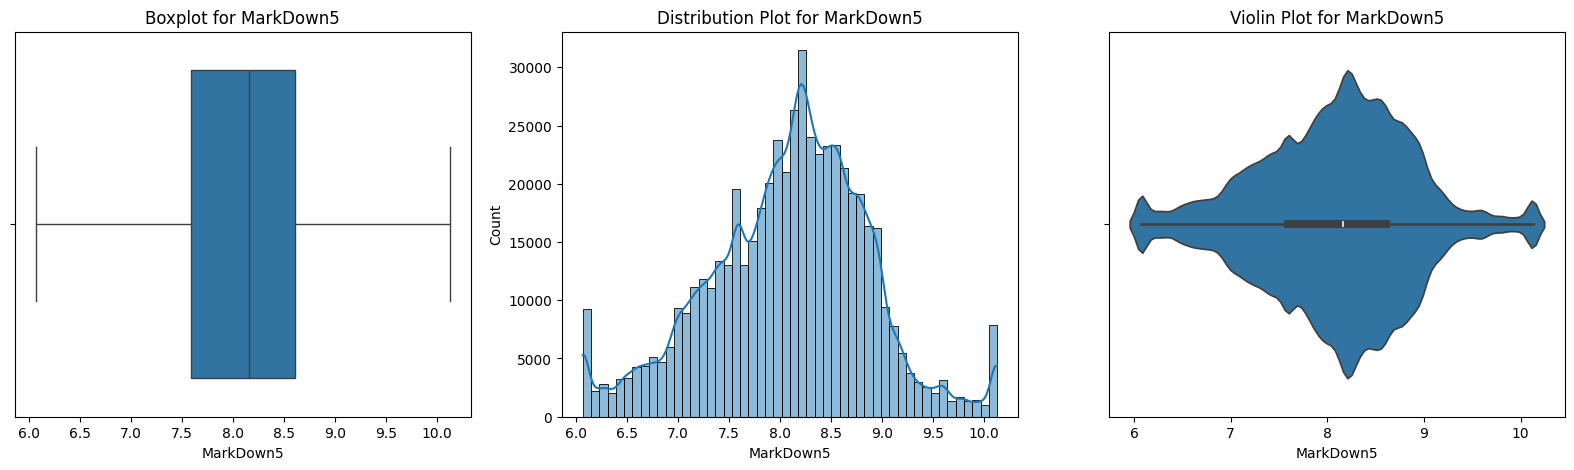

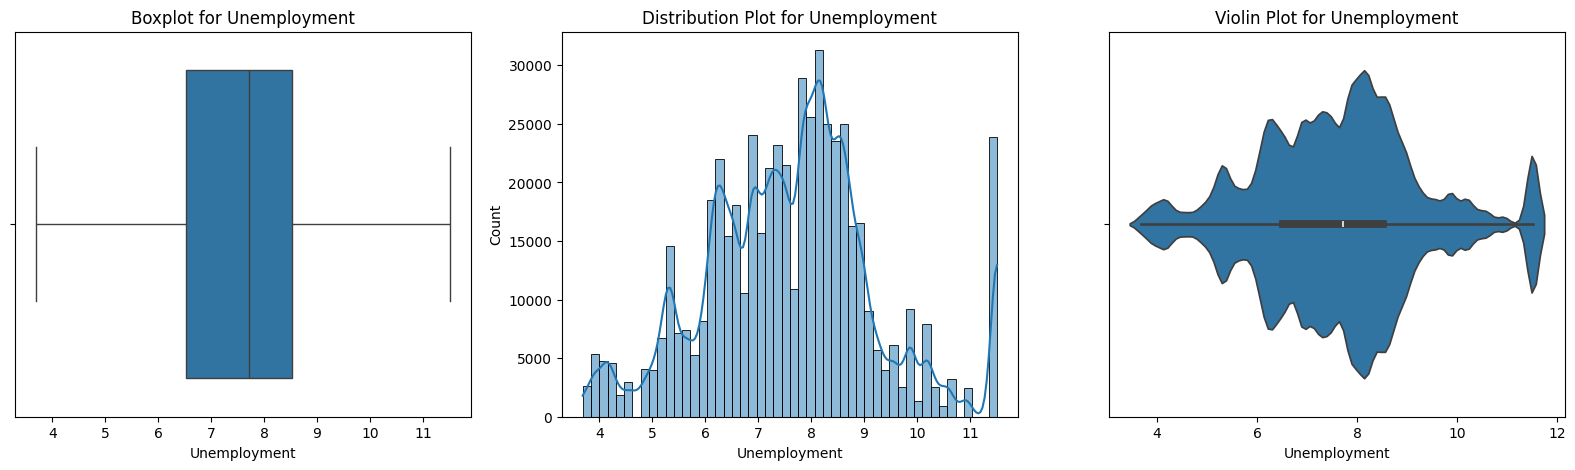

In [ ]:
for i in[ 'Weekly_Sales',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Unemployment']:
    plot(without_skewness, i)

In [ ]:
without_skewness.head()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0    5      2  2010      6    47     1      5.285710  202505          0   
1    5      2  2010      9    49     2      3.955540  125833          0   
2    5      2  2010     11    19     1      6.276133  207499          0   
3    5      2  2010     15    80     2      3.955540  123737          0   
4    5      2  2010     20    19     1      5.027060  203742          0   

   Temperature  Fuel_Price          diff  MarkDown1  MarkDown2  MarkDown3  \
0        40.43       2.572   522010-6-47   9.260048   8.663421   4.043935   
1        38.01       2.572   522010-9-49   8.887433   7.693083   4.102266   
2        46.04       2.572  522010-11-19   9.607573   8.551345   4.362154   
3        19.83       2.954  522010-15-80   8.952215   9.492766   4.080440   
4        25.92       2.784  522010-20-19   9.648155   8.765618   3.800765   

   MarkDown4  MarkDown5         CPI  Unemployment  
0  10.679592   8.890258  212.622352         7.259  
1   8.785236   8.183106  214.655459         6.415  
2  10.686813   8.788043  214.424881         7.368  
3   9.024192   8.488117  131.527903         8.350  
4  11.029590   8.890068  204.247194         8.187

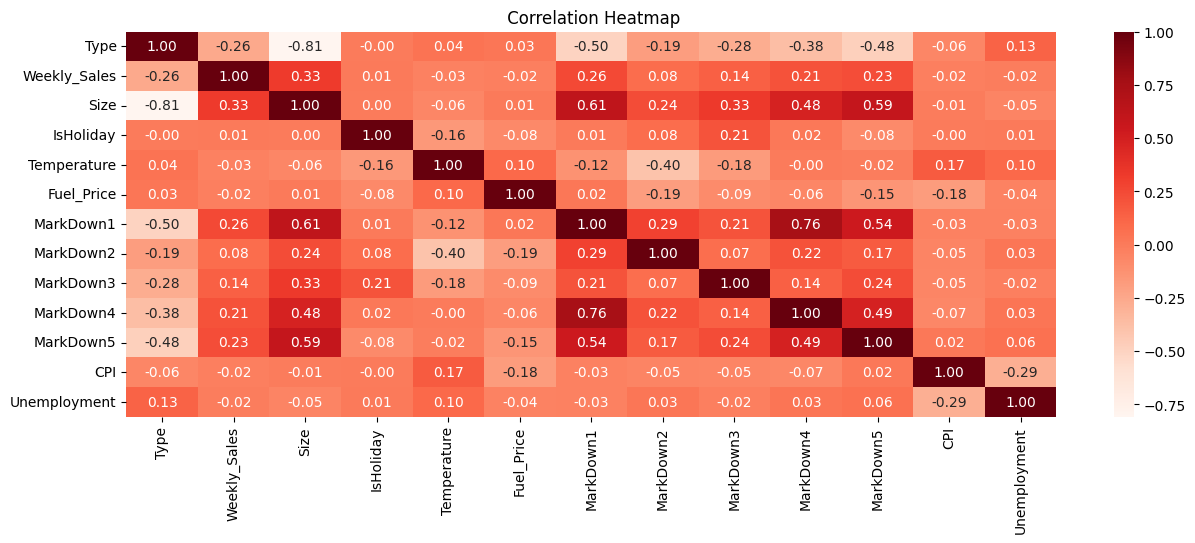

In [ ]:
# Calculate the correlation matrix
without_skewness_corr = without_skewness.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept',"diff"]).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(without_skewness_corr, annot=True, fmt=".2f",cmap="Reds")
plt.title(" Correlation Heatmap")
plt.show()

In [ ]:
#scaled data without outlier and skewness
from sklearn.preprocessing import StandardScaler
x_afterskewness = without_skewness.drop(['Weekly_Sales', 'diff'], axis=1)
y_afterskewness = without_skewness['Weekly_Sales']
x_scaled_data_fit_afterskewness = StandardScaler().fit(x_afterskewness)
x_scaled_trans_after_skewness=x_scaled_data_fit_afterskewness.transform(x_afterskewness)
scaled_df_afterskewness = pd.DataFrame(x_scaled_trans_after_skewness, columns=x_afterskewness.columns)

In [ ]:
scaled_df_afterskewness

Day     Month      Year     Store      Dept      Type      Size  \
0      -1.213929 -1.280543 -1.321296 -1.271443  0.078807 -0.888248  1.085350   
1      -1.213929 -1.280543 -1.321296 -1.037011  0.144561  0.605129 -0.167312   
2      -1.213929 -1.280543 -1.321296 -0.880723 -0.841760 -0.888248  1.166941   
3      -1.213929 -1.280543 -1.321296 -0.568146  1.163760  0.605129 -0.201556   
4      -1.213929 -1.280543 -1.321296 -0.177425 -0.841760 -0.888248  1.105560   
...          ...       ...       ...       ...       ...       ...       ...   
551474  1.178951  1.114573  0.576084  1.776179  1.591166  0.605129 -0.291676   
551475  1.178951  1.114573  0.576084  1.776179  1.624043  0.605129 -0.291676   
551476  1.178951  1.114573  0.576084  1.776179  1.656921  0.605129 -0.291676   
551477  1.178951  1.114573  0.576084  1.776179  1.722676  0.605129 -0.291676   
551478  1.178951  1.114573  0.576084  1.776179  1.755553  0.605129 -0.291676   

        IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0       -0.278345    -0.977963   -1.966244   0.789215   1.209042   0.281208   
1       -0.278345    -1.107476   -1.966244   0.472700   0.781164   0.311472   
2       -0.278345    -0.677729   -1.966244   1.084417   1.159621   0.446306   
3       -0.278345    -2.080429   -1.073145   0.527728   1.574748   0.300148   
4       -0.278345    -1.754506   -1.470598   1.118890   1.254107   0.155047   
...           ...          ...         ...        ...        ...        ...   
551474  -0.278345     0.007834    1.096477  -0.027340  -0.820071   0.572388   
551475  -0.278345     0.007834    1.096477  -0.027340  -0.820071   0.572388   
551476  -0.278345     0.007834    1.096477  -0.027340  -0.820071   0.572388   
551477  -0.278345     0.007834    1.096477  -0.027340  -0.820071   0.572388   
551478  -0.278345     0.007834    1.096477  -0.027340  -0.820071   0.572388   

        MarkDown4  MarkDown5       CPI  Unemployment  
0        2.048879   1.011690  1.005615     -0.221256  
1        1.056899   0.121305  1.056735     -0.740840  
2        2.052660   0.882990  1.050937     -0.154153  
3        1.182028   0.505349 -1.033401      0.450386  
4        2.232155   1.011452  0.795032      0.350040  
...           ...        ...       ...           ...  
551474  -0.738661  -1.676858  0.494859      0.645538  
551475  -0.738661  -1.676858  0.494859      0.645538  
551476  -0.738661  -1.676858  0.494859      0.645538  
551477  -0.738661  -1.676858  0.494859      0.645538  
551478  -0.738661  -1.676858  0.494859      0.645538  

[551479 rows x 17 columns]

In [ ]:
scaled_df_afterskewness.describe()

Day         Month          Year         Store          Dept  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   4.865116e-17 -1.814111e-16 -4.244113e-14 -6.761687e-17  1.075969e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.669716e+00 -1.579932e+00 -1.321296e+00 -1.662164e+00 -1.433553e+00   
25%   -8.720895e-01 -9.811532e-01 -1.321296e+00 -8.807227e-01 -8.417599e-01   
50%    3.948387e-02 -8.298480e-02 -3.726061e-01 -2.113685e-02 -2.170897e-01   
75%    8.371105e-01  8.151836e-01  5.760843e-01  8.384490e-01  9.664958e-01   
max    1.748684e+00  1.713352e+00  1.524775e+00  1.776179e+00  1.788430e+00   

               Type          Size     IsHoliday   Temperature    Fuel_Price  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   5.166609e-17 -4.447664e-17 -5.524793e-17 -5.697443e-16 -2.203320e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.882481e-01 -1.653377e+00 -2.783446e-01 -3.531830e+00 -2.200040e+00   
25%   -8.882481e-01 -6.933112e-01 -2.783446e-01 -7.248242e-01 -8.487017e-01   
50%   -8.882481e-01 -1.301592e-01 -2.783446e-01  6.616808e-02  2.594891e-01   
75%    6.051293e-01  1.085350e+00 -2.783446e-01  7.736727e-01  7.785152e-01   
max    2.098507e+00  1.365006e+00  3.592669e+00  2.314449e+00  2.466519e+00   

          MarkDown1     MarkDown2     MarkDown3     MarkDown4     MarkDown5  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   7.966628e-16 -2.910824e-16  2.313507e-16 -5.491809e-16  2.787134e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -2.078480e+00 -2.687807e+00 -2.543845e+00 -2.588502e+00 -2.541702e+00   
25%   -4.380749e-01 -6.418074e-01 -6.589470e-01 -6.111584e-01 -6.235619e-01   
50%    2.439320e-01 -8.388506e-02  2.043224e-03  1.925293e-01  9.606250e-02   
75%    6.555286e-01  7.221924e-01  5.976517e-01  7.070706e-01  6.551980e-01   
max    2.295934e+00  2.485047e+00  2.482550e+00  2.279242e+00  2.573338e+00   

                CPI  Unemployment  
count  5.514790e+05  5.514790e+05  
mean  -5.660980e-16 -1.242666e-15  
std    1.000001e+00  1.000001e+00  
min   -1.170784e+00 -2.422099e+00  
25%   -1.004183e+00 -6.706588e-01  
50%    2.493482e-01  6.008289e-02  
75%    1.050755e+00  5.568887e-01  
max    1.416818e+00  2.398210e+00

In [ ]:
pickle_=open("x_scaled_data_afterskewness","wb")
pickle.dump(x_scaled_data_fit_afterskewness,pickle_)
pickle_.close()

**Prediction without skewness and outlier**

In [ ]:
print("Prediction without skewness and outlier after scaled")
print(machine_learning_regression(scaled_df_afterskewness,y_afterskewness, DecisionTreeRegressor))
print(machine_learning_regression(scaled_df_afterskewness,y_afterskewness, ExtraTreesRegressor))
print(machine_learning_regression(scaled_df_afterskewness,y_afterskewness, RandomForestRegressor))
print(machine_learning_regression(scaled_df_afterskewness,y_afterskewness, AdaBoostRegressor))
print(machine_learning_regression(scaled_df_afterskewness,y_afterskewness, GradientBoostingRegressor))
print(machine_learning_regression(scaled_df_afterskewness,y_afterskewness, XGBRegressor))

Prediction without skewness and outlier after scaled
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9738112183967397}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9870098910037653}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9980592190701006, 'R2_test': 0.9861458385064202}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.1205947877377389, 'R2_test': 0.12501900405226218}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.692203489921945, 'R2_test': 0.6930494532320777}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9555161314499484, 'R2_test': 0.9536285315452406}


In [ ]:
print("Prediction without skewness and outlier before scaling")
print(machine_learning_regression(x_afterskewness,y_afterskewness, ExtraTreesRegressor))
print(machine_learning_regression(x_afterskewness,y_afterskewness, RandomForestRegressor))
print(machine_learning_regression(x_afterskewness,y_afterskewness, AdaBoostRegressor))
print(machine_learning_regression(x_afterskewness,y_afterskewness, GradientBoostingRegressor))
print(machine_learning_regression(x_afterskewness,y_afterskewness, XGBRegressor))

Prediction without skewness and outlier before scaling
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9870258808711948}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9980574802392934, 'R2_test': 0.9861279898090104}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.15715382878694373, 'R2_test': 0.16105834420365506}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.6922034899219451, 'R2_test': 0.6930494532320777}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9555161314499484, 'R2_test': 0.9536285315452406}


we got good accuracy after scaling without skewness and outlier data

XGBClassifier is good interpretability, so i select the algorithm

already i explained about GridsearchCV in regression method

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df_afterskewness,y_afterskewness,test_size=0.2,random_state=42)

param_grid_r = { 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}


grid_search_r = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search_r.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
grid_search_r.best_score_

0.9536296876342355

In [ ]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x_train, x_test, y_train, y_test = train_test_split(scaled_df_afterskewness,y_afterskewness ,test_size=0.2,random_state=42)

model = XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9555644490244158, 0.9541299662465601)

The training accuracy is higher than the test accuracy, which is expected. It indicates that the model is able to effectively learn from the training data and generalize well to unseen data. The relatively small difference between the training and test accuracies suggests that the model is not overfitting excessively. Overall, the model appears to perform well on both the training and test datasets, indicating that it has learned meaningful patterns from the data and can make accurate predictions on new, unseen data.

In [ ]:
# predict the weeklysales with hypertuning parameters and calculate the accuracy using metrics

model_reg_withoutskew =  XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_withoutskew = model_reg_withoutskew.predict(x_test)

mse = mean_squared_error(y_test, y_pred_withoutskew)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_withoutskew)
mae = mean_absolute_error(y_test, y_pred_withoutskew)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9541299662465601,
 'Mean Absolute Error': 0.27581648350535753,
 'Mean Squared Error': 0.17340284641913703,
 'Root Mean Squared Error': 0.41641667404072213}

In [ ]:
# save the regression model by using pickle
pickle.dump(model_reg_withoutskew, open('model_XGB_regression_without skewness and outlier after scaled.pkl', 'wb'))
pickle_.close()

 # Method 2-without Markdown

In [ ]:
df5

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown           diff  
0             NaN  211.096358         8.106         0     522010-1-1  
1             NaN  211.096358         8.106         0     522010-1-2  
2             NaN  211.096358         8.106         0     522010-1-3  
3             NaN  211.096358         8.106         0     522010-1-4  
4             NaN  211.096358         8.106         0     522010-1-5  
...           ...         ...           ...       ...            ...  
551474    1864.57         NaN           NaN         1  2672013-45-94  
551475    1864.57         NaN           NaN         1  2672013-45-95  
551476    1864.57         NaN           NaN         1  2672013-45-96  
551477    1864.57         NaN           NaN         1  2672013-45-97  
551478    1864.57         NaN           NaN         1  2672013-45-98  

[551479 rows x 20 columns]

In [ ]:
# drop all MarkDown(1-5) columns
df_withoutmarkdown=df5.copy()
df_withoutmarkdown

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown           diff  
0             NaN  211.096358         8.106         0     522010-1-1  
1             NaN  211.096358         8.106         0     522010-1-2  
2             NaN  211.096358         8.106         0     522010-1-3  
3             NaN  211.096358         8.106         0     522010-1-4  
4             NaN  211.096358         8.106         0     522010-1-5  
...           ...         ...           ...       ...            ...  
551474    1864.57         NaN           NaN         1  2672013-45-94  
551475    1864.57         NaN           NaN         1  2672013-45-95  
551476    1864.57         NaN           NaN         1  2672013-45-96  
551477    1864.57         NaN           NaN         1  2672013-45-97  
551478    1864.57         NaN           NaN         1  2672013-45-98  

[551479 rows x 20 columns]

In [ ]:
df_withoutmarkdown.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','markdown'],inplace=True)
df_withoutmarkdown

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price         CPI  Unemployment           diff  
0             42.31       2.572  211.096358         8.106     522010-1-1  
1             42.31       2.572  211.096358         8.106     522010-1-2  
2             42.31       2.572  211.096358         8.106     522010-1-3  
3             42.31       2.572  211.096358         8.106     522010-1-4  
4             42.31       2.572  211.096358         8.106     522010-1-5  
...             ...         ...         ...           ...            ...  
551474        76.06       3.804         NaN           NaN  2672013-45-94  
551475        76.06       3.804         NaN           NaN  2672013-45-95  
551476        76.06       3.804         NaN           NaN  2672013-45-96  
551477        76.06       3.804         NaN           NaN  2672013-45-97  
551478        76.06       3.804         NaN           NaN  2672013-45-98  

[551479 rows x 14 columns]

In [ ]:
df_withoutmarkdown.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
CPI              43303
Unemployment     43303
diff                 0
dtype: int64

In [ ]:
print(best_algo_predict(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI', DecisionTreeRegressor))
print(best_algo_predict(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI', ExtraTreesRegressor))
print(best_algo_predict(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI', RandomForestRegressor))
print(best_algo_predict(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI', AdaBoostRegressor))
print(best_algo_predict(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI', GradientBoostingRegressor))
print(best_algo_predict(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.999999999999994}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4574717914567956, 'R2_test': 0.4603520644830553}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9862542573066265, 'R2_test': 0.9861648920308028}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999736020379673, 'R2_test': 0.999973206568554}


In [ ]:
# next train Machine learning model with df_withoutmarkdown--> to predict 'CPI'

df_cpi_withoutmarkdown = predict_null(df_withoutmarkdown, ['Weekly_Sales','Unemployment'], 'CPI')
df_cpi_withoutmarkdown

{'R2': 1.0, 'Mean Absolute Error': 2.0405697325934248e-13, 'Mean Squared Error': 5.677025095130878e-26, 'Root Mean Squared Error': 2.3826508546429705e-13}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         3      5  2013      1     1     1  151315          0        66.66   
1         3      5  2013      1     2     1  151315          0        66.66   
2         3      5  2013      1     3     1  151315          0        66.66   
3         3      5  2013      1     4     1  151315          0        66.66   
4         3      5  2013      1     5     1  151315          0        66.66   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      4  2013     45    94     2  118221          0        50.64   
551475   26      4  2013     45    95     2  118221          0        50.64   
551476   26      4  2013     45    96     2  118221          0        50.64   
551477   26      4  2013     45    97     2  118221          0        50.64   
551478   26      4  2013     45    98     2  118221          0        50.64   

        Fuel_Price         CPI           diff  
0            3.386  225.150927     352013-1-1  
1            3.386  225.150927     352013-1-2  
2            3.386  225.150927     352013-1-3  
3            3.386  225.150927     352013-1-4  
4            3.386  225.150927     352013-1-5  
...            ...         ...            ...  
551474       3.615  193.589304  2642013-45-94  
551475       3.615  193.589304  2642013-45-95  
551476       3.615  193.589304  2642013-45-96  
551477       3.615  193.589304  2642013-45-97  
551478       3.615  193.589304  2642013-45-98  

[551479 rows x 12 columns]

In [ ]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_withoutmarkdown --> based on 'diff' column

df_withoutmarkdown_data_final = df_withoutmarkdown.drop(columns=['CPI'], axis=1)
df_cpi_data_final = pd.merge(df_withoutmarkdown_data_final, df_cpi_withoutmarkdown[['CPI', 'diff']], on='diff', how='inner')
df_cpi_data_final.tail()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  Unemployment           diff         CPI  
551474        76.06       3.804           NaN  2672013-45-94  193.349022  
551475        76.06       3.804           NaN  2672013-45-95  193.349022  
551476        76.06       3.804           NaN  2672013-45-96  193.349022  
551477        76.06       3.804           NaN  2672013-45-97  193.349022  
551478        76.06       3.804           NaN  2672013-45-98  193.349022

In [ ]:
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', DecisionTreeRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', ExtraTreesRegressor))
print(best_algo_predict(df_cpi_data_final,['Weekly_Sales'], 'Unemployment', RandomForestRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', AdaBoostRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', GradientBoostingRegressor))
print(best_algo_predict(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4567854012671174, 'R2_test': 0.4577730768774463}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9582788731215781, 'R2_test': 0.9583653918816173}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9996451084605195, 'R2_test': 0.9996403189525165}


In [ ]:
# next train Machine learning model with df_cpi_data_final --> to predict 'Unemployment'

unemployment_data_withoumarkdown = predict_null(df_cpi_data_final, ['Weekly_Sales'], 'Unemployment')
unemployment_data_withoumarkdown

{'R2': 1.0, 'Mean Absolute Error': 2.138301168054859e-14, 'Mean Squared Error': 8.631067641742832e-28, 'Root Mean Squared Error': 2.9378678734318243e-14}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         3      5  2013      1     1     1  151315          0        66.66   
1         3      5  2013      1     2     1  151315          0        66.66   
2         3      5  2013      1     3     1  151315          0        66.66   
3         3      5  2013      1     4     1  151315          0        66.66   
4         3      5  2013      1     5     1  151315          0        66.66   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      4  2013     45    94     2  118221          0        50.64   
551475   26      4  2013     45    95     2  118221          0        50.64   
551476   26      4  2013     45    96     2  118221          0        50.64   
551477   26      4  2013     45    97     2  118221          0        50.64   
551478   26      4  2013     45    98     2  118221          0        50.64   

        Fuel_Price  Unemployment           diff         CPI  
0            3.386         6.314     352013-1-1  225.150927  
1            3.386         6.314     352013-1-2  225.150927  
2            3.386         6.314     352013-1-3  225.150927  
3            3.386         6.314     352013-1-4  225.150927  
4            3.386         6.314     352013-1-5  225.150927  
...            ...           ...            ...         ...  
551474       3.615         8.335  2642013-45-94  193.589304  
551475       3.615         8.335  2642013-45-95  193.589304  
551476       3.615         8.335  2642013-45-96  193.589304  
551477       3.615         8.335  2642013-45-97  193.589304  
551478       3.615         8.335  2642013-45-98  193.589304  

[551479 rows x 13 columns]

In [ ]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_cpi_data_final --> based on 'diff' column

df_cpi_data_final= df_cpi_data_final.drop(columns=['Unemployment'], axis=1)
df_unemployment_data_withoumarkdown= pd.merge(df_cpi_data_final,unemployment_data_withoumarkdown[['Unemployment', 'diff']], on='diff', how='inner')
df_unemployment_data_withoumarkdown.tail()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price           diff         CPI  Unemployment  
551474        76.06       3.804  2672013-45-94  193.349022       8.67516  
551475        76.06       3.804  2672013-45-95  193.349022       8.67516  
551476        76.06       3.804  2672013-45-96  193.349022       8.67516  
551477        76.06       3.804  2672013-45-97  193.349022       8.67516  
551478        76.06       3.804  2672013-45-98  193.349022       8.67516

In [ ]:
print(best_algo_predict(df_unemployment_data_withoumarkdown, [], 'Weekly_Sales', DecisionTreeRegressor))
print(best_algo_predict(df_unemployment_data_withoumarkdown, [], 'Weekly_Sales', ExtraTreesRegressor))
print(best_algo_predict(df_unemployment_data_withoumarkdown, [], 'Weekly_Sales', RandomForestRegressor))
print(best_algo_predict(df_unemployment_data_withoumarkdown, [], 'Weekly_Sales', AdaBoostRegressor))
print(best_algo_predict(df_unemployment_data_withoumarkdown, [], 'Weekly_Sales', GradientBoostingRegressor))
print(best_algo_predict(df_unemployment_data_withoumarkdown, [], 'Weekly_Sales', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9594902206387426}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999759298, 'R2_test': 0.9796704548866495}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9967619952320935, 'R2_test': 0.9770969075448227}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.020697657718967255, 'R2_test': -0.035301576969643644}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7378815875869387, 'R2_test': 0.7394838834985393}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9478833208051455, 'R2_test': 0.9450599555013736}


In [ ]:
# finally train Machine learning model with df_unemployment_data_withoumarkdown --> to predict 'Weekly_Sales'
weekly_sales_final_data_withoutmarkdown = predict_null (df_unemployment_data_withoumarkdown, [], 'Weekly_Sales')
weekly_sales_final_data_withoutmarkdown

{'R2': 0.9766428675976924, 'Mean Absolute Error': 1360.381839435765, 'Mean Squared Error': 11840804.943310905, 'Root Mean Squared Error': 3441.047070778153}


Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      121.0529  202505          0   
1         5      2  2010      9    49     2       28.4919  125833          0   
2         5      2  2010     11    19     1      166.0192  207499          0   
3         5      2  2010     15    80     2       41.3391  123737          0   
4         5      2  2010     20    19     1      216.2543  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2     2487.8000  118221          0   
551475   26     10  2012     45    94     2     5203.3100  118221          0   
551476   26     10  2012     45    95     2    56017.4700  118221          0   
551477   26     10  2012     45    97     2     6817.4800  118221          0   
551478   26     10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price            diff         CPI  Unemployment  
0             40.43       2.572     522010-6-47  212.622352         7.259  
1             38.01       2.572     522010-9-49  214.655459         6.415  
2             46.04       2.572    522010-11-19  214.424881         7.368  
3             19.83       2.954    522010-15-80  131.527903         8.350  
4             25.92       2.784    522010-20-19  204.247194         8.187  
...             ...         ...             ...         ...           ...  
551474        58.85       3.882  26102012-45-93  192.308899         8.667  
551475        58.85       3.882  26102012-45-94  192.308899         8.667  
551476        58.85       3.882  26102012-45-95  192.308899         8.667  
551477        58.85       3.882  26102012-45-97  192.308899         8.667  
551478        58.85       3.882  26102012-45-98  192.308899         8.667  

[551479 rows x 14 columns]

In [ ]:
weekly_sales_final_data_withoutmarkdown.to_csv('Retail_sales_cleaned_data_withoutmarkdown.csv',index=False)

In [ ]:
df5.to_csv("retail_data_sales.csv",index=False)

In [ ]:
weekly_sales_final_data_withoutmarkdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Day           551479 non-null  int32  
 1   Month         551479 non-null  int32  
 2   Year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Weekly_Sales  551479 non-null  float64
 7   Size          551479 non-null  int64  
 8   IsHoliday     551479 non-null  int64  
 9   Temperature   551479 non-null  float64
 10  Fuel_Price    551479 non-null  float64
 11  diff          551479 non-null  object 
 12  CPI           551479 non-null  float64
 13  Unemployment  551479 non-null  float64
dtypes: float64(5), int32(3), int64(5), object(1)
memory usage: 52.6+ MB


In [ ]:
weekly_sales_final_data_withoutmarkdown.describe().T

count           mean           std        min           25%  \
Day           551479.0      15.653488      8.776044      1.000      8.000000   
Month         551479.0       6.277180      3.340134      1.000      3.000000   
Year          551479.0    2011.392758      1.054086   2010.000   2010.000000   
Store         551479.0      22.270485     12.796872      1.000     11.000000   
Dept          551479.0      44.603013     30.416079      1.000     19.000000   
Type          551479.0       1.594791      0.669624      1.000      1.000000   
Weekly_Sales  551479.0   15639.953362  22695.210345      0.010   1828.960000   
Size          551479.0  136073.691863  61207.331445  34875.000  93638.000000   
IsHoliday     551479.0       0.071905      0.258330      0.000      0.000000   
Temperature   551479.0      58.703624     18.685408     -7.290     45.160000   
Fuel_Price    551479.0       3.413010      0.427725      2.472      3.050000   
CPI           551479.0     172.630043     39.773484    126.064    132.693226   
Unemployment  551479.0       7.700477      1.863052      3.684      6.529000   

                       50%            75%            max  
Day               16.00000      23.000000      31.000000  
Month              6.00000       9.000000      12.000000  
Year            2011.00000    2012.000000    2013.000000  
Store             22.00000      33.000000      45.000000  
Dept              38.00000      74.000000      99.000000  
Type               1.00000       2.000000       3.000000  
Weekly_Sales    7242.95000   19779.319500  693099.360000  
Size          128107.00000  202505.000000  219622.000000  
IsHoliday          0.00000       0.000000       1.000000  
Temperature       59.94000      73.160000     101.950000  
Fuel_Price         3.52400       3.746000       4.468000  
CPI              182.54459     214.417648     228.976456  
Unemployment       7.70600       8.523000      14.313000

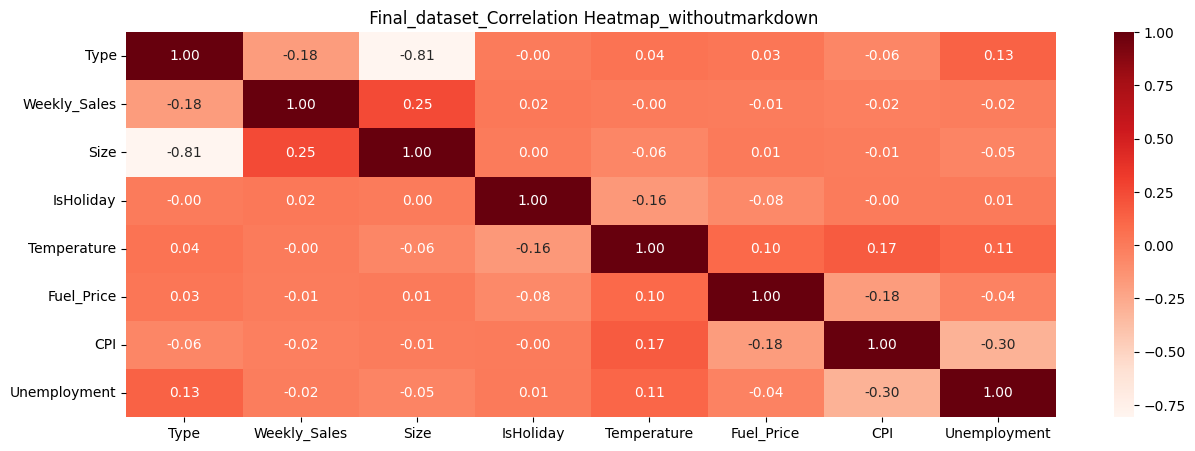

In [ ]:
# Calculate the correlation matrix
final_dataset_withoutmarkdown = weekly_sales_final_data_withoutmarkdown.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept',"diff"]).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(final_dataset_withoutmarkdown, annot=True, fmt=".2f",cmap="Reds")
plt.title(" Final_dataset_Correlation Heatmap_withoutmarkdown")
plt.show()

This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.

other features are weak correlation with weekly_sales.

We our final data with zero null values. Now we are going to try different technique.

1.with Skewness, outlier
 - 1.1.with scaling prediction
 - 1.2.without scaling prediction

2.After treating skewness, outlier
 - 2.1with scaling prediction
 - .2without scaling prediction

In [ ]:
#scaled data with outlier and skewness
from sklearn.preprocessing import StandardScaler
x = weekly_sales_final_data_withoutmarkdown.drop(['Weekly_Sales','diff'], axis=1)
y = weekly_sales_final_data_withoutmarkdown['Weekly_Sales']
x_scaled_data_fit_withoutmarkdown = StandardScaler().fit(x)
x_scaled_trans_withoutmarkdown=x_scaled_data_fit_withoutmarkdown.transform(x)
scaled_df_withoutmarkdown = pd.DataFrame(x_scaled_trans_withoutmarkdown, columns=x.columns)

In [ ]:
scaled_df_withoutmarkdown

Day     Month      Year     Store      Dept      Type      Size  \
0      -1.213929 -1.280543 -1.321296 -1.271443  0.078807 -0.888248  1.085350   
1      -1.213929 -1.280543 -1.321296 -1.037011  0.144561  0.605129 -0.167312   
2      -1.213929 -1.280543 -1.321296 -0.880723 -0.841760 -0.888248  1.166941   
3      -1.213929 -1.280543 -1.321296 -0.568146  1.163760  0.605129 -0.201556   
4      -1.213929 -1.280543 -1.321296 -0.177425 -0.841760 -0.888248  1.105560   
...          ...       ...       ...       ...       ...       ...       ...   
551474  1.178951  1.114573  0.576084  1.776179  1.591166  0.605129 -0.291676   
551475  1.178951  1.114573  0.576084  1.776179  1.624043  0.605129 -0.291676   
551476  1.178951  1.114573  0.576084  1.776179  1.656921  0.605129 -0.291676   
551477  1.178951  1.114573  0.576084  1.776179  1.722676  0.605129 -0.291676   
551478  1.178951  1.114573  0.576084  1.776179  1.755553  0.605129 -0.291676   

        IsHoliday  Temperature  Fuel_Price       CPI  Unemployment  
0       -0.278345    -0.977963   -1.966244  1.005503     -0.236965  
1       -0.278345    -1.107476   -1.966244  1.056620     -0.689985  
2       -0.278345    -0.677729   -1.966244  1.050823     -0.178459  
3       -0.278345    -2.080429   -1.073145 -1.033407      0.348634  
4       -0.278345    -1.754506   -1.470598  0.794931      0.261143  
...           ...          ...         ...       ...           ...  
551474  -0.278345     0.007834    1.096477  0.494774      0.518785  
551475  -0.278345     0.007834    1.096477  0.494774      0.518785  
551476  -0.278345     0.007834    1.096477  0.494774      0.518785  
551477  -0.278345     0.007834    1.096477  0.494774      0.518785  
551478  -0.278345     0.007834    1.096477  0.494774      0.518785  

[551479 rows x 12 columns]

In [ ]:
scaled_df_withoutmarkdown.describe()

Day         Month          Year         Store          Dept  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   4.865116e-17 -1.814111e-16 -4.244113e-14 -6.761687e-17  1.075969e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.669716e+00 -1.579932e+00 -1.321296e+00 -1.662164e+00 -1.433553e+00   
25%   -8.720895e-01 -9.811532e-01 -1.321296e+00 -8.807227e-01 -8.417599e-01   
50%    3.948387e-02 -8.298480e-02 -3.726061e-01 -2.113685e-02 -2.170897e-01   
75%    8.371105e-01  8.151836e-01  5.760843e-01  8.384490e-01  9.664958e-01   
max    1.748684e+00  1.713352e+00  1.524775e+00  1.776179e+00  1.788430e+00   

               Type          Size     IsHoliday   Temperature    Fuel_Price  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   5.166609e-17 -4.447664e-17 -5.524793e-17 -5.697443e-16 -2.203320e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.882481e-01 -1.653377e+00 -2.783446e-01 -3.531830e+00 -2.200040e+00   
25%   -8.882481e-01 -6.933112e-01 -2.783446e-01 -7.248242e-01 -8.487017e-01   
50%   -8.882481e-01 -1.301592e-01 -2.783446e-01  6.616808e-02  2.594891e-01   
75%    6.051293e-01  1.085350e+00 -2.783446e-01  7.736727e-01  7.785152e-01   
max    2.098507e+00  1.365006e+00  3.592669e+00  2.314449e+00  2.466519e+00   

                CPI  Unemployment  
count  5.514790e+05  5.514790e+05  
mean  -4.826463e-16  1.991399e-16  
std    1.000001e+00  1.000001e+00  
min   -1.170782e+00 -2.155861e+00  
25%   -1.004107e+00 -6.287952e-01  
50%    2.492755e-01  2.964331e-03  
75%    1.050641e+00  4.414924e-01  
max    1.416684e+00  3.549299e+00

In [ ]:
import pickle

pickle_=open("x_scaled_data_fit_withoutmarkdownr","wb")
pickle.dump(x_scaled_data_fit_withoutmarkdown,pickle_)
pickle_.close()

#Prediction with skewness and outlier without markdown

In [ ]:
print("Prediction with skewness and outlier after scaled without markdown")
print(machine_learning_regression(scaled_df_withoutmarkdown,y, DecisionTreeRegressor))
print(machine_learning_regression(scaled_df_withoutmarkdown,y, ExtraTreesRegressor))
print(machine_learning_regression(scaled_df_withoutmarkdown,y, RandomForestRegressor))
print(machine_learning_regression(scaled_df_withoutmarkdown,y, AdaBoostRegressor))
print(machine_learning_regression(scaled_df_withoutmarkdown,y, GradientBoostingRegressor))
print(machine_learning_regression(scaled_df_withoutmarkdown,y, XGBRegressor))

Prediction with skewness and outlier after scaled without markdown
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9681805819308741}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999981859, 'R2_test': 0.9825405097313514}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9975167271708206, 'R2_test': 0.982162534979677}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.03910724681251654, 'R2_test': 0.015378709899950715}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7378954368377943, 'R2_test': 0.7399223388558096}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9476188510945839, 'R2_test': 0.9473083322743336}


In [ ]:
print("Prediction with skewness and outlier before scaling withoutmarkdown")
print(machine_learning_regression(x,y, DecisionTreeRegressor))
print(machine_learning_regression(x,y, ExtraTreesRegressor))
print(machine_learning_regression(x,y, RandomForestRegressor))
print(machine_learning_regression(x,y, AdaBoostRegressor))
print(machine_learning_regression(x,y, GradientBoostingRegressor))
print(machine_learning_regression(x,y, XGBRegressor))

Prediction with skewness and outlier before scaling withoutmarkdown
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9674963348598555}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999966843, 'R2_test': 0.9826931290486958}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9975421095521291, 'R2_test': 0.982143761113367}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.04645553757996246, 'R2_test': -0.07626239172864047}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7378954368377943, 'R2_test': 0.7399223388558096}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9476188510945839, 'R2_test': 0.9473083322743336}


In [ ]:
# we got good accuracy after scaling with skewness and outlier withoutmarkdowndata
# XGBClassifier is good interpretability, so i select the algorithm

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df_withoutmarkdown,y,test_size=0.2,random_state=42)

param_grid_r = { 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}


grid_search_r = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search_r.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
grid_search_r.best_score_

0.9365501608858304

In [ ]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x_train, x_test, y_train, y_test = train_test_split(scaled_df_withoutmarkdown,y,test_size=0.2,random_state=42)

model = XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9418956846184297, 0.9407714245454708)

The training accuracy is higher than the test accuracy, which is expected. It indicates that the model is able to effectively learn from the training data and generalize well to unseen data. The relatively small difference between the training and test accuracies suggests that the model is not overfitting excessively. Overall, the model appears to perform well on both the training and test datasets, indicating that it has learned meaningful patterns from the data and can make accurate predictions on new, unseen data.

In [ ]:
# predict the weeklysales with hypertuning parameters and calculate the accuracy using metrics

model_reg =  XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred = model_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9407714245454708,
 'Mean Absolute Error': 3009.1003952602596,
 'Mean Squared Error': 29641373.561804555,
 'Root Mean Squared Error': 5444.389181699316}

In [ ]:
# save the regression model by using pickle
pickle.dump(model_reg, open('model_XGB_regression_with skewness and outlier after scaled_withoutmarkdown.pkl', 'wb'))
pickle_.close()

Prediction without skewness and outlier

In [ ]:
without_skewness_markdown=weekly_sales_final_data_withoutmarkdown.copy()

In [ ]:
without_skewness_markdown

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      121.0529  202505          0   
1         5      2  2010      9    49     2       28.4919  125833          0   
2         5      2  2010     11    19     1      166.0192  207499          0   
3         5      2  2010     15    80     2       41.3391  123737          0   
4         5      2  2010     20    19     1      216.2543  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2     2487.8000  118221          0   
551475   26     10  2012     45    94     2     5203.3100  118221          0   
551476   26     10  2012     45    95     2    56017.4700  118221          0   
551477   26     10  2012     45    97     2     6817.4800  118221          0   
551478   26     10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price            diff         CPI  Unemployment  
0             40.43       2.572     522010-6-47  212.622352         7.259  
1             38.01       2.572     522010-9-49  214.655459         6.415  
2             46.04       2.572    522010-11-19  214.424881         7.368  
3             19.83       2.954    522010-15-80  131.527903         8.350  
4             25.92       2.784    522010-20-19  204.247194         8.187  
...             ...         ...             ...         ...           ...  
551474        58.85       3.882  26102012-45-93  192.308899         8.667  
551475        58.85       3.882  26102012-45-94  192.308899         8.667  
551476        58.85       3.882  26102012-45-95  192.308899         8.667  
551477        58.85       3.882  26102012-45-97  192.308899         8.667  
551478        58.85       3.882  26102012-45-98  192.308899         8.667  

[551479 rows x 14 columns]

Skewness Handling - Feature Scaling (Log Transformation)

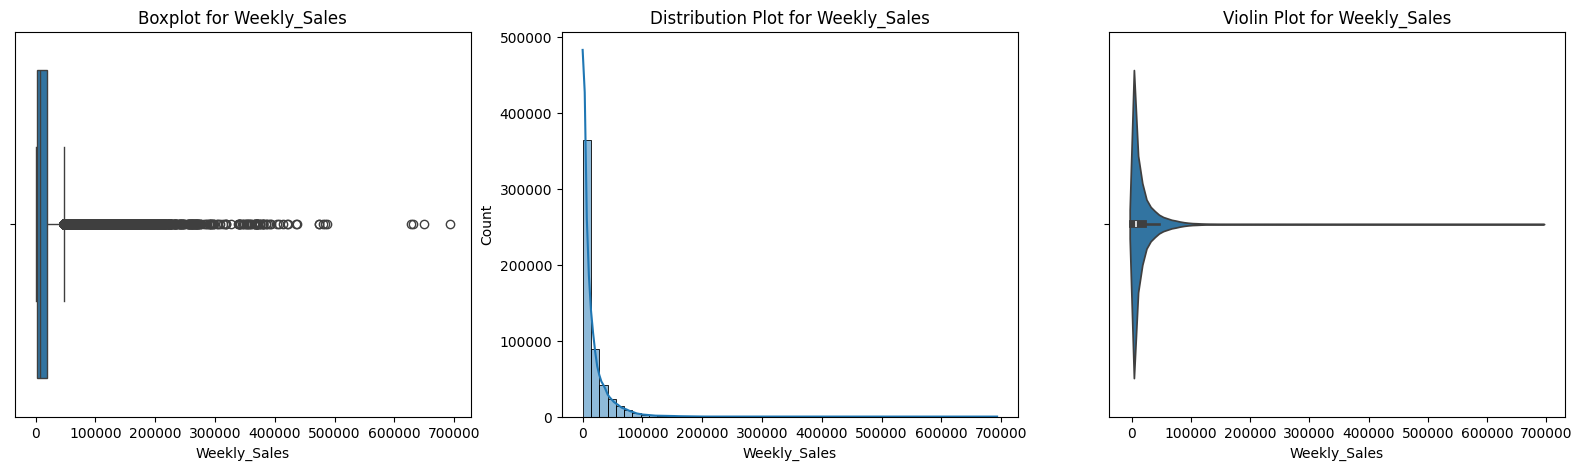

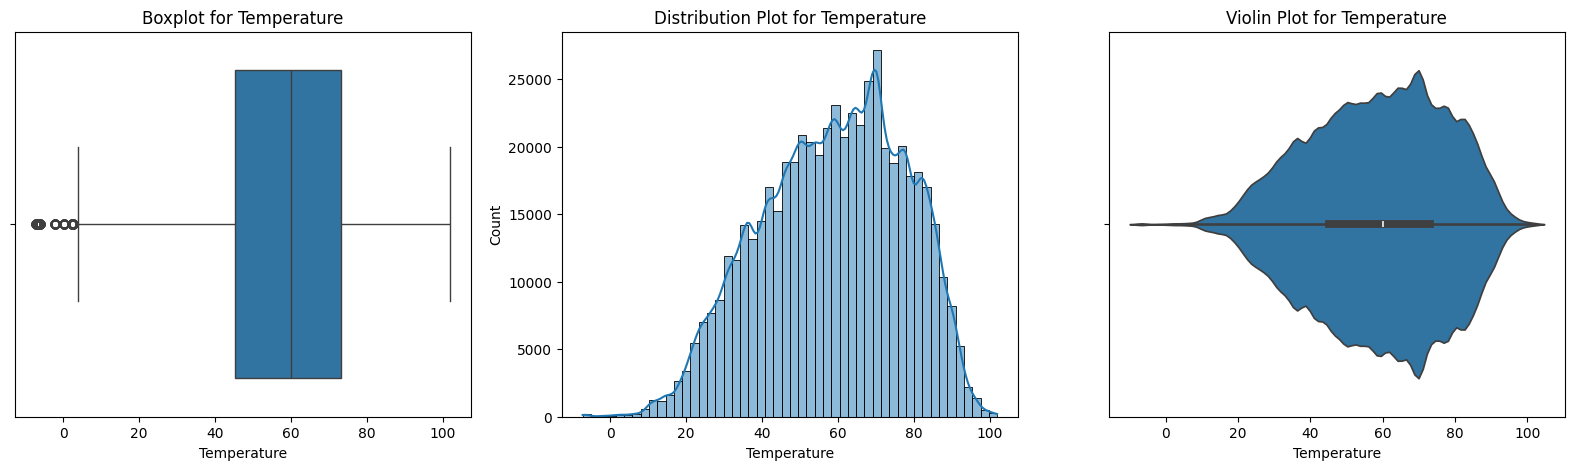

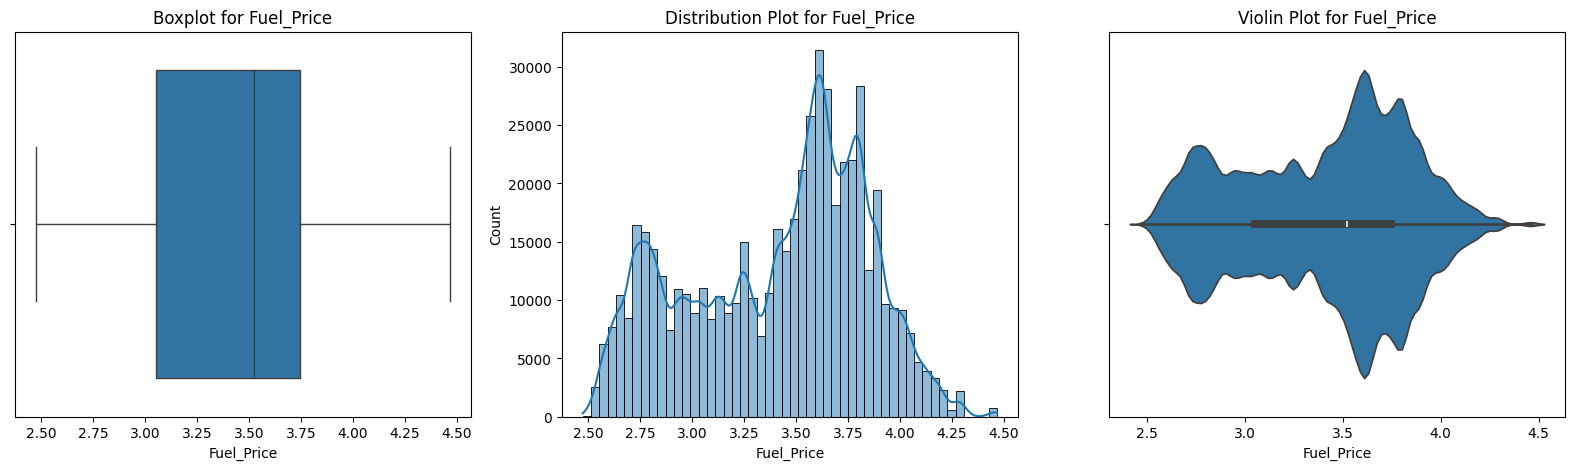

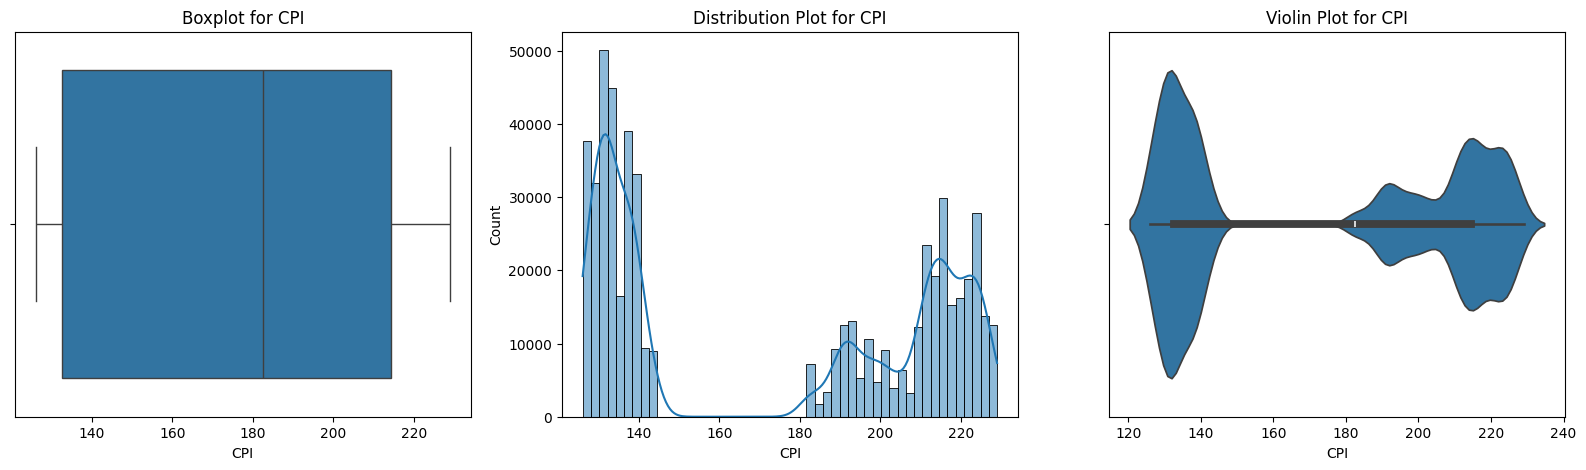

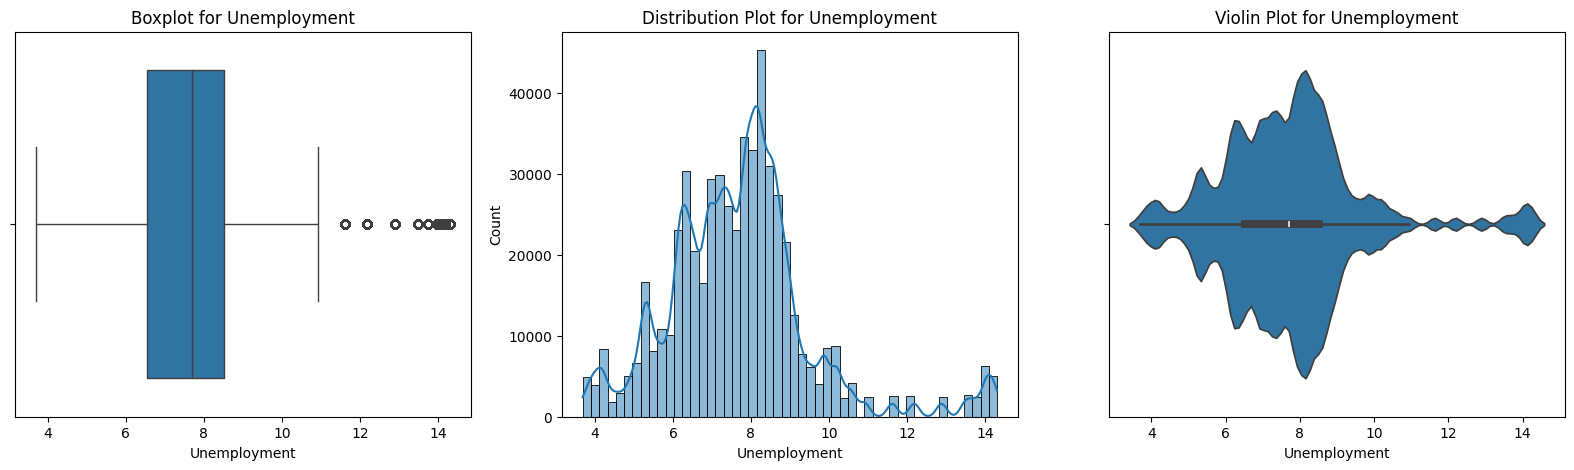

In [ ]:
for i in [ 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']:
    plot(without_skewness_markdown, i)

In [ ]:
for i in [ 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']:
    skewness=without_skewness_markdown[i].skew()
    print(f'column:{i}, skew:{skewness}')

column:Weekly_Sales, skew:3.4027028639140697
column:Temperature, skew:-0.26374392475013025
column:Fuel_Price, skew:-0.334720891706735
column:CPI, skew:0.08971769946286919
column:Unemployment, skew:0.9895622462898498


In [ ]:
#weekly_Sales and Markdowns data are skewd. so using the log transformation method to handle the skewness data
without_skewness_markdown['Weekly_Sales'] = np.log(without_skewness_markdown['Weekly_Sales'])

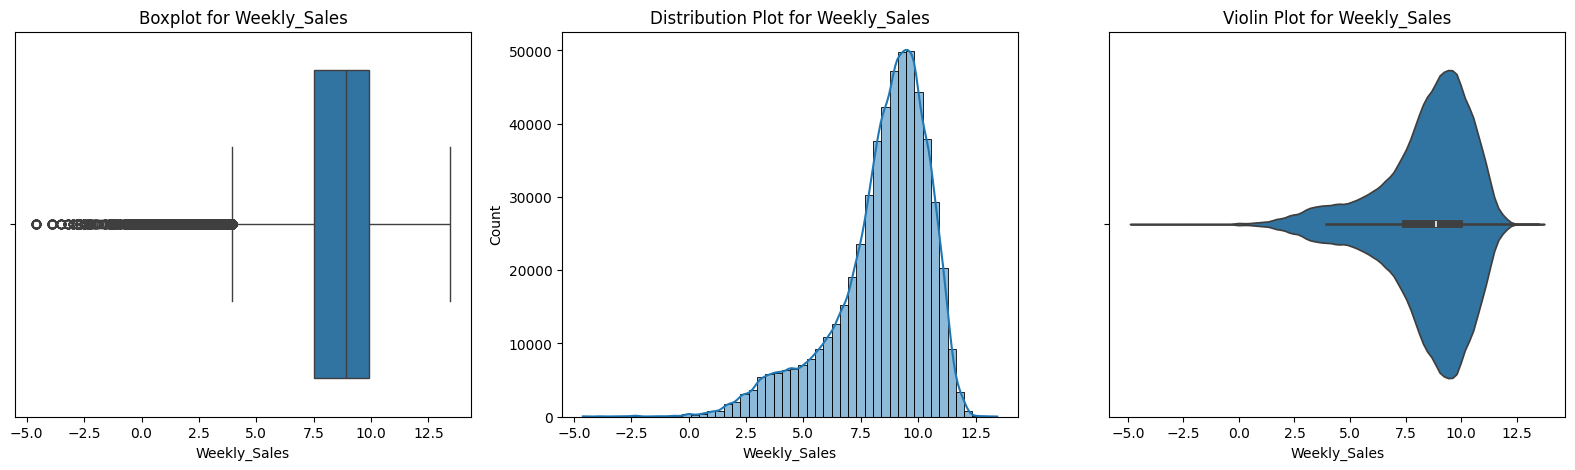

In [ ]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in [ 'Weekly_Sales'] :
    plot(without_skewness_markdown, i)

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features
for i in [ 'Weekly_Sales','Unemployment']:
    outlier(without_skewness_markdown, i)

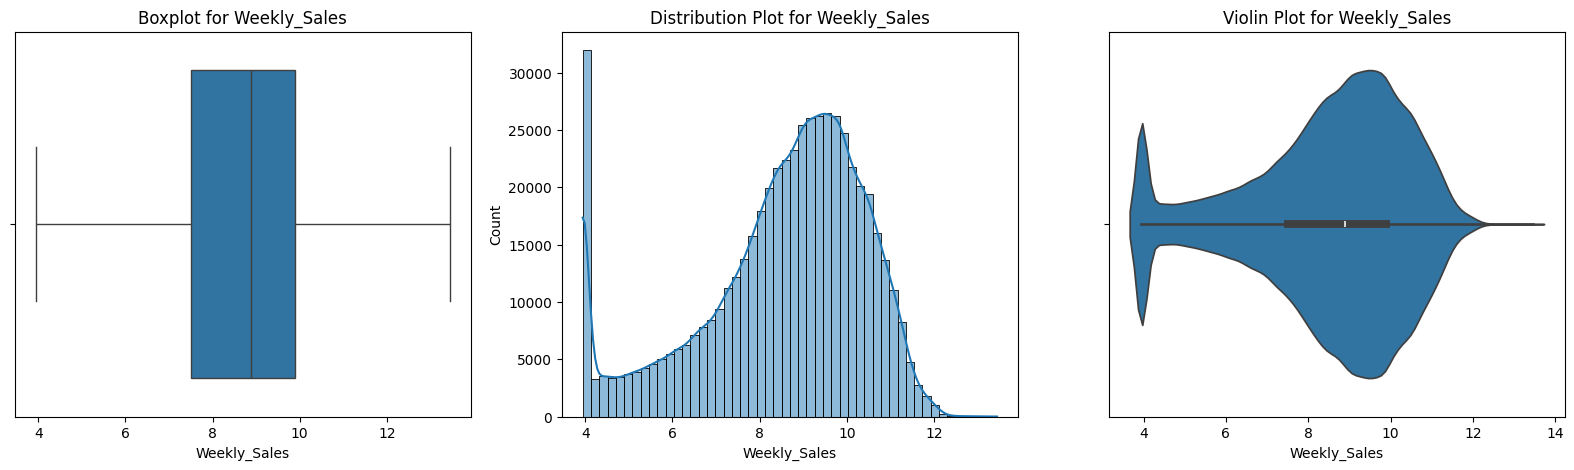

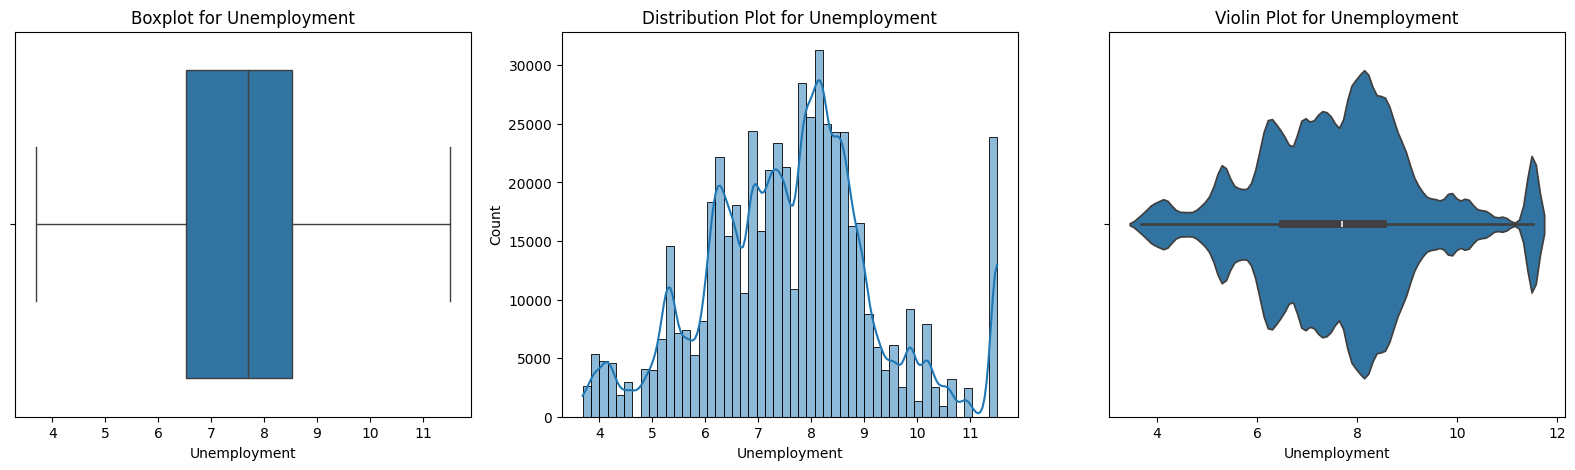

In [ ]:
for i in[ 'Weekly_Sales','Unemployment']:
    plot(without_skewness_markdown, i)

In [ ]:
without_skewness_markdown.head()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0    5      2  2010      6    47     1      4.796228  202505          0   
1    5      2  2010      9    49     2      3.940169  125833          0   
2    5      2  2010     11    19     1      5.112103  207499          0   
3    5      2  2010     15    80     2      3.940169  123737          0   
4    5      2  2010     20    19     1      5.376455  203742          0   

   Temperature  Fuel_Price          diff         CPI  Unemployment  
0        40.43       2.572   522010-6-47  212.622352         7.259  
1        38.01       2.572   522010-9-49  214.655459         6.415  
2        46.04       2.572  522010-11-19  214.424881         7.368  
3        19.83       2.954  522010-15-80  131.527903         8.350  
4        25.92       2.784  522010-20-19  204.247194         8.187

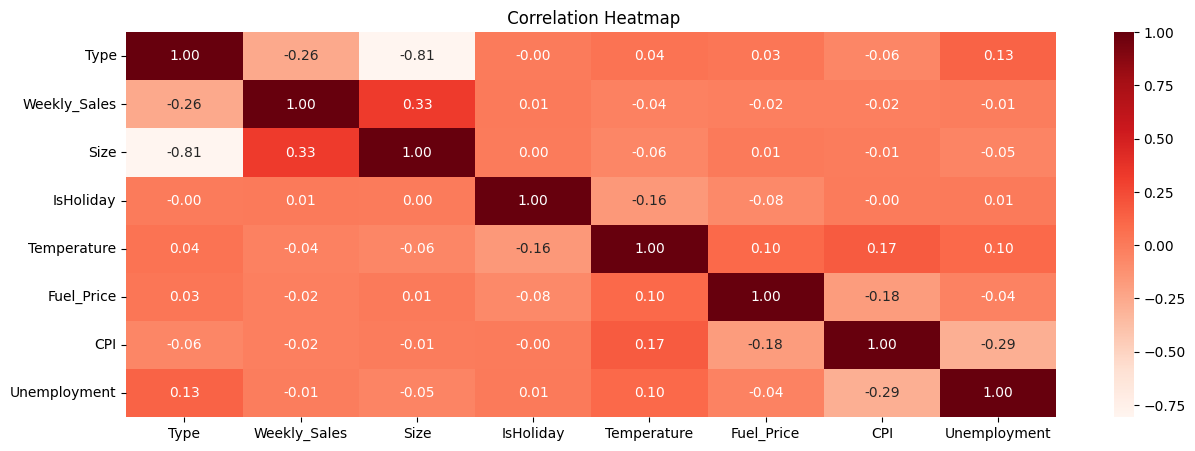

In [ ]:
# Calculate the correlation matrix
without_skewness_corr_markdown = without_skewness_markdown.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept',"diff"]).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(without_skewness_corr_markdown, annot=True, fmt=".2f",cmap="Reds")
plt.title(" Correlation Heatmap")
plt.show()

In [ ]:
#scaled data without outlier and skewness
from sklearn.preprocessing import StandardScaler
x_afterskewness_markdown= without_skewness_markdown.drop(['Weekly_Sales', 'diff'], axis=1)
y_afterskewness_markdown = without_skewness_markdown['Weekly_Sales']
x_scaled_data_fit_afterskewness_markdown = StandardScaler().fit(x_afterskewness_markdown)
x_scaled_trans_after_skewness_markdown=x_scaled_data_fit_afterskewness_markdown.transform(x_afterskewness_markdown)
scaled_df_afterskewness_withoutmarkdown = pd.DataFrame(x_scaled_trans_after_skewness_markdown, columns=x_afterskewness_markdown.columns)

In [ ]:
scaled_df_afterskewness_withoutmarkdown

Day     Month      Year     Store      Dept      Type      Size  \
0      -1.213929 -1.280543 -1.321296 -1.271443  0.078807 -0.888248  1.085350   
1      -1.213929 -1.280543 -1.321296 -1.037011  0.144561  0.605129 -0.167312   
2      -1.213929 -1.280543 -1.321296 -0.880723 -0.841760 -0.888248  1.166941   
3      -1.213929 -1.280543 -1.321296 -0.568146  1.163760  0.605129 -0.201556   
4      -1.213929 -1.280543 -1.321296 -0.177425 -0.841760 -0.888248  1.105560   
...          ...       ...       ...       ...       ...       ...       ...   
551474  1.178951  1.114573  0.576084  1.776179  1.591166  0.605129 -0.291676   
551475  1.178951  1.114573  0.576084  1.776179  1.624043  0.605129 -0.291676   
551476  1.178951  1.114573  0.576084  1.776179  1.656921  0.605129 -0.291676   
551477  1.178951  1.114573  0.576084  1.776179  1.722676  0.605129 -0.291676   
551478  1.178951  1.114573  0.576084  1.776179  1.755553  0.605129 -0.291676   

        IsHoliday  Temperature  Fuel_Price       CPI  Unemployment  
0       -0.278345    -0.977963   -1.966244  1.005503     -0.220708  
1       -0.278345    -1.107476   -1.966244  1.056620     -0.740282  
2       -0.278345    -0.677729   -1.966244  1.050823     -0.153607  
3       -0.278345    -2.080429   -1.073145 -1.033407      0.450921  
4       -0.278345    -1.754506   -1.470598  0.794931      0.350577  
...           ...          ...         ...       ...           ...  
551474  -0.278345     0.007834    1.096477  0.494774      0.646070  
551475  -0.278345     0.007834    1.096477  0.494774      0.646070  
551476  -0.278345     0.007834    1.096477  0.494774      0.646070  
551477  -0.278345     0.007834    1.096477  0.494774      0.646070  
551478  -0.278345     0.007834    1.096477  0.494774      0.646070  

[551479 rows x 12 columns]

In [ ]:
scaled_df_afterskewness_withoutmarkdown.describe()

Day         Month          Year         Store          Dept  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   4.865116e-17 -1.814111e-16 -4.244113e-14 -6.761687e-17  1.075969e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.669716e+00 -1.579932e+00 -1.321296e+00 -1.662164e+00 -1.433553e+00   
25%   -8.720895e-01 -9.811532e-01 -1.321296e+00 -8.807227e-01 -8.417599e-01   
50%    3.948387e-02 -8.298480e-02 -3.726061e-01 -2.113685e-02 -2.170897e-01   
75%    8.371105e-01  8.151836e-01  5.760843e-01  8.384490e-01  9.664958e-01   
max    1.748684e+00  1.713352e+00  1.524775e+00  1.776179e+00  1.788430e+00   

               Type          Size     IsHoliday   Temperature    Fuel_Price  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   5.166609e-17 -4.447664e-17 -5.524793e-17 -5.697443e-16 -2.203320e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.882481e-01 -1.653377e+00 -2.783446e-01 -3.531830e+00 -2.200040e+00   
25%   -8.882481e-01 -6.933112e-01 -2.783446e-01 -7.248242e-01 -8.487017e-01   
50%   -8.882481e-01 -1.301592e-01 -2.783446e-01  6.616808e-02  2.594891e-01   
75%    6.051293e-01  1.085350e+00 -2.783446e-01  7.736727e-01  7.785152e-01   
max    2.098507e+00  1.365006e+00  3.592669e+00  2.314449e+00  2.466519e+00   

                CPI  Unemployment  
count  5.514790e+05  5.514790e+05  
mean  -4.826463e-16 -1.422016e-15  
std    1.000001e+00  1.000001e+00  
min   -1.170782e+00 -2.421510e+00  
25%   -1.004107e+00 -6.701025e-01  
50%    2.492755e-01  5.446926e-02  
75%    1.050641e+00  5.574218e-01  
max    1.416684e+00  2.398708e+00

In [ ]:
pickle_=open("scaled_df_afterskewness_withoutmarkdown","wb")
pickle.dump(x_scaled_data_fit_afterskewness_markdown ,pickle_)
pickle_.close()

In [ ]:
print("Prediction without skewness and outlier after scaled")
print(machine_learning_regression(scaled_df_afterskewness_withoutmarkdown,y_afterskewness_markdown , DecisionTreeRegressor))
print(machine_learning_regression(scaled_df_afterskewness_withoutmarkdown,y_afterskewness_markdown , ExtraTreesRegressor))
print(machine_learning_regression(scaled_df_afterskewness_withoutmarkdown,y_afterskewness_markdown , RandomForestRegressor))
print(machine_learning_regression(scaled_df_afterskewness_withoutmarkdown,y_afterskewness_markdown , AdaBoostRegressor))
print(machine_learning_regression(scaled_df_afterskewness_withoutmarkdown,y_afterskewness_markdown , GradientBoostingRegressor))
print(machine_learning_regression(scaled_df_afterskewness_withoutmarkdown,y_afterskewness_markdown , XGBRegressor))

Prediction without skewness and outlier after scaled
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9782337024459061}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9876028803629895}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9982728064876941, 'R2_test': 0.9878410193164746}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.19476272186573418, 'R2_test': 0.19851206787896503}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.6849921580069337, 'R2_test': 0.6849592388791566}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9552278314463671, 'R2_test': 0.9538372225177122}


In [ ]:
print("Prediction without skewness and outlier before scaling")
print(machine_learning_regression(x_afterskewness_markdown,y_afterskewness_markdown , ExtraTreesRegressor))
print(machine_learning_regression(x_afterskewness_markdown,y_afterskewness_markdown , RandomForestRegressor))
print(machine_learning_regression(x_afterskewness_markdown,y_afterskewness_markdown , AdaBoostRegressor))
print(machine_learning_regression(x_afterskewness_markdown,y_afterskewness_markdown , GradientBoostingRegressor))
print(machine_learning_regression(x_afterskewness_markdown,y_afterskewness_markdown , XGBRegressor))

Prediction without skewness and outlier before scaling
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9876336947807229}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9982645012853582, 'R2_test': 0.9878234103603882}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.2122481344539736, 'R2_test': 0.21574607643991006}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.6849921580069339, 'R2_test': 0.6849592388791567}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9552278314463671, 'R2_test': 0.9538372225177122}


we got good accuracy after scaling without skewness and outlier data

XGBClassifier is good interpretability, so i select the algorithm

already i explained about GridsearchCV in regression method

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df_afterskewness_withoutmarkdown,y_afterskewness,test_size=0.2,random_state=42)

param_grid_r = { 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}


grid_search_r = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search_r.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x_train, x_test, y_train, y_test = train_test_split(scaled_df_afterskewness_withoutmarkdown,y_afterskewness ,test_size=0.2,random_state=42)

model = XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9570804014675439, 0.9558006588679431)

The training accuracy is higher than the test accuracy, which is expected. It indicates that the model is able to effectively learn from the training data and generalize well to unseen data. The relatively small difference between the training and test accuracies suggests that the model is not overfitting excessively. Overall, the model appears to perform well on both the training and test datasets, indicating that it has learned meaningful patterns from the data and can make accurate predictions on new, unseen data.

In [ ]:
# predict the weeklysales with hypertuning parameters and calculate the accuracy using metrics

model_reg_withoutskew =  XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_withoutskew = model_reg_withoutskew.predict(x_test)

mse = mean_squared_error(y_test, y_pred_withoutskew)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_withoutskew)
mae = mean_absolute_error(y_test, y_pred_withoutskew)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9558006588679431,
 'Mean Absolute Error': 0.2710024322897034,
 'Mean Squared Error': 0.16708711406985494,
 'Root Mean Squared Error': 0.4087629069153107}

In [ ]:
# save the regression model by using pickle
pickle.dump(model_reg_withoutskew, open('model_XGB_regression_without skewness and outlier after scaledwithoutmarkdown.pkl', 'wb'))
pickle_.close()

**Method-3 Keeping markdown null value as zero**

In [ ]:
df_markdown_zero=df5.copy()
df_markdown_zero

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown           diff  
0             NaN  211.096358         8.106         0     522010-1-1  
1             NaN  211.096358         8.106         0     522010-1-2  
2             NaN  211.096358         8.106         0     522010-1-3  
3             NaN  211.096358         8.106         0     522010-1-4  
4             NaN  211.096358         8.106         0     522010-1-5  
...           ...         ...           ...       ...            ...  
551474    1864.57         NaN           NaN         1  2672013-45-94  
551475    1864.57         NaN           NaN         1  2672013-45-95  
551476    1864.57         NaN           NaN         1  2672013-45-96  
551477    1864.57         NaN           NaN         1  2672013-45-97  
551478    1864.57         NaN           NaN         1  2672013-45-98  

[551479 rows x 20 columns]

In [ ]:
df_markdown_zero["MarkDown1"].fillna(0,inplace=True)
df_markdown_zero["MarkDown2"].fillna(0,inplace=True)
df_markdown_zero["MarkDown3"].fillna(0,inplace=True)
df_markdown_zero["MarkDown4"].fillna(0,inplace=True)
df_markdown_zero["MarkDown5"].fillna(0,inplace=True)

In [ ]:
df_markdown_zero

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00       0.00       0.00   
1             42.31       2.572       0.00       0.00       0.00       0.00   
2             42.31       2.572       0.00       0.00       0.00       0.00   
3             42.31       2.572       0.00       0.00       0.00       0.00   
4             42.31       2.572       0.00       0.00       0.00       0.00   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5         CPI  Unemployment  markdown           diff  
0            0.00  211.096358         8.106         0     522010-1-1  
1            0.00  211.096358         8.106         0     522010-1-2  
2            0.00  211.096358         8.106         0     522010-1-3  
3            0.00  211.096358         8.106         0     522010-1-4  
4            0.00  211.096358         8.106         0     522010-1-5  
...           ...         ...           ...       ...            ...  
551474    1864.57         NaN           NaN         1  2672013-45-94  
551475    1864.57         NaN           NaN         1  2672013-45-95  
551476    1864.57         NaN           NaN         1  2672013-45-96  
551477    1864.57         NaN           NaN         1  2672013-45-97  
551478    1864.57         NaN           NaN         1  2672013-45-98  

[551479 rows x 20 columns]

In [ ]:
df_markdown_zero.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI              43303
Unemployment     43303
markdown             0
diff                 0
dtype: int64

In [ ]:
print(best_algo_predict(df_markdown_zero, ['Weekly_Sales','Unemployment'], 'CPI', ExtraTreesRegressor))
print(best_algo_predict(df_markdown_zero, ['Weekly_Sales','Unemployment'], 'CPI', RandomForestRegressor))
print(best_algo_predict(df_markdown_zero, ['Weekly_Sales','Unemployment'], 'CPI', AdaBoostRegressor))
print(best_algo_predict(df_markdown_zero, ['Weekly_Sales','Unemployment'], 'CPI', GradientBoostingRegressor))
print(best_algo_predict(df_markdown_zero, ['Weekly_Sales','Unemployment'], 'CPI', XGBRegressor))

{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999995347574}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.45265931068107024, 'R2_test': 0.45546356651966247}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9874882133224511, 'R2_test': 0.9874277921288377}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999745495554875, 'R2_test': 0.9999742095563203}


In [ ]:
# next train Machine learning model with df_markdown_zero--> to predict 'CPI'

df_cpi_markdown_zero = predict_null(df_markdown_zero, ['Weekly_Sales','Unemployment'], 'CPI')
df_cpi_markdown_zero

{'R2': 1.0, 'Mean Absolute Error': 2.0343952339490143e-13, 'Mean Squared Error': 5.643720579277701e-26, 'Root Mean Squared Error': 2.3756516115116084e-13}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         3      5  2013      1     1     1  151315          0        66.66   
1         3      5  2013      1     2     1  151315          0        66.66   
2         3      5  2013      1     3     1  151315          0        66.66   
3         3      5  2013      1     4     1  151315          0        66.66   
4         3      5  2013      1     5     1  151315          0        66.66   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      4  2013     45    94     2  118221          0        50.64   
551475   26      4  2013     45    95     2  118221          0        50.64   
551476   26      4  2013     45    96     2  118221          0        50.64   
551477   26      4  2013     45    97     2  118221          0        50.64   
551478   26      4  2013     45    98     2  118221          0        50.64   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            3.386    2298.63        2.0     129.90      55.46    1301.04   
1            3.386    2298.63        2.0     129.90      55.46    1301.04   
2            3.386    2298.63        2.0     129.90      55.46    1301.04   
3            3.386    2298.63        2.0     129.90      55.46    1301.04   
4            3.386    2298.63        2.0     129.90      55.46    1301.04   
...            ...        ...        ...        ...        ...        ...   
551474       3.615    1260.65        0.0      57.52      40.51    2476.18   
551475       3.615    1260.65        0.0      57.52      40.51    2476.18   
551476       3.615    1260.65        0.0      57.52      40.51    2476.18   
551477       3.615    1260.65        0.0      57.52      40.51    2476.18   
551478       3.615    1260.65        0.0      57.52      40.51    2476.18   

               CPI  markdown           diff  
0       225.160125         1     352013-1-1  
1       225.160125         1     352013-1-2  
2       225.160125         1     352013-1-3  
3       225.160125         1     352013-1-4  
4       225.160125         1     352013-1-5  
...            ...       ...            ...  
551474  193.589304         1  2642013-45-94  
551475  193.589304         1  2642013-45-95  
551476  193.589304         1  2642013-45-96  
551477  193.589304         1  2642013-45-97  
551478  193.589304         1  2642013-45-98  

[551479 rows x 18 columns]

In [ ]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_markdown_zero--> based on 'diff' column
df_markdown_zero_data_final = df_markdown_zero.drop(columns=['CPI'], axis=1)
df_cpi_data_final_markdown_zero = pd.merge(df_markdown_zero_data_final, df_cpi_markdown_zero[['CPI', 'diff']], on='diff', how='inner')
df_cpi_data_final_markdown_zero.tail()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5  Unemployment  markdown           diff         CPI  
551474    1864.57           NaN         1  2672013-45-94  193.250104  
551475    1864.57           NaN         1  2672013-45-95  193.250104  
551476    1864.57           NaN         1  2672013-45-96  193.250104  
551477    1864.57           NaN         1  2672013-45-97  193.250104  
551478    1864.57           NaN         1  2672013-45-98  193.250104

In [ ]:
print(best_algo_predict(df_cpi_data_final_markdown_zero, ['Weekly_Sales'], 'Unemployment', DecisionTreeRegressor))
print(best_algo_predict(df_cpi_data_final_markdown_zero, ['Weekly_Sales'], 'Unemployment', ExtraTreesRegressor))
print(best_algo_predict(df_cpi_data_final_markdown_zero,['Weekly_Sales'], 'Unemployment', RandomForestRegressor))
print(best_algo_predict(df_cpi_data_final_markdown_zero, ['Weekly_Sales'], 'Unemployment', AdaBoostRegressor))
print(best_algo_predict(df_cpi_data_final_markdown_zero, ['Weekly_Sales'], 'Unemployment', GradientBoostingRegressor))
print(best_algo_predict(df_cpi_data_final_markdown_zero, ['Weekly_Sales'], 'Unemployment', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4637972479125012, 'R2_test': 0.46614326917446913}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9564942532369235, 'R2_test': 0.9565633046881016}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9995706760033343, 'R2_test': 0.9995696464359431}


In [ ]:
df_cpi_data_final_markdown_zero


Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      1     1     1      24924.50  151315          0   
1         5      2  2010      1     2     1      50605.27  151315          0   
2         5      2  2010      1     3     1      13740.12  151315          0   
3         5      2  2010      1     4     1      39954.04  151315          0   
4         5      2  2010      1     5     1      32229.38  151315          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00       0.00       0.00   
1             42.31       2.572       0.00       0.00       0.00       0.00   
2             42.31       2.572       0.00       0.00       0.00       0.00   
3             42.31       2.572       0.00       0.00       0.00       0.00   
4             42.31       2.572       0.00       0.00       0.00       0.00   
...             ...         ...        ...        ...        ...        ...   
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5  Unemployment  markdown           diff         CPI  
0            0.00         8.106         0     522010-1-1  211.096358  
1            0.00         8.106         0     522010-1-2  211.096358  
2            0.00         8.106         0     522010-1-3  211.096358  
3            0.00         8.106         0     522010-1-4  211.096358  
4            0.00         8.106         0     522010-1-5  211.096358  
...           ...           ...       ...            ...         ...  
551474    1864.57           NaN         1  2672013-45-94  193.250104  
551475    1864.57           NaN         1  2672013-45-95  193.250104  
551476    1864.57           NaN         1  2672013-45-96  193.250104  
551477    1864.57           NaN         1  2672013-45-97  193.250104  
551478    1864.57           NaN         1  2672013-45-98  193.250104  

[551479 rows x 20 columns]

In [ ]:
df_unemployment_markdown_zero = predict_null(df_cpi_data_final_markdown_zero, ['Weekly_Sales'], 'Unemployment')
df_unemployment_markdown_zero

{'R2': 1.0, 'Mean Absolute Error': 2.0833912474434145e-14, 'Mean Squared Error': 8.132229563026688e-28, 'Root Mean Squared Error': 2.8517064300216264e-14}


Day  Month  Year  Store  Dept  Type    Size  IsHoliday  Temperature  \
0         3      5  2013      1     1     1  151315          0        66.66   
1         3      5  2013      1     2     1  151315          0        66.66   
2         3      5  2013      1     3     1  151315          0        66.66   
3         3      5  2013      1     4     1  151315          0        66.66   
4         3      5  2013      1     5     1  151315          0        66.66   
...     ...    ...   ...    ...   ...   ...     ...        ...          ...   
551474   26      4  2013     45    94     2  118221          0        50.64   
551475   26      4  2013     45    95     2  118221          0        50.64   
551476   26      4  2013     45    96     2  118221          0        50.64   
551477   26      4  2013     45    97     2  118221          0        50.64   
551478   26      4  2013     45    98     2  118221          0        50.64   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            3.386    2298.63        2.0     129.90      55.46    1301.04   
1            3.386    2298.63        2.0     129.90      55.46    1301.04   
2            3.386    2298.63        2.0     129.90      55.46    1301.04   
3            3.386    2298.63        2.0     129.90      55.46    1301.04   
4            3.386    2298.63        2.0     129.90      55.46    1301.04   
...            ...        ...        ...        ...        ...        ...   
551474       3.615    1260.65        0.0      57.52      40.51    2476.18   
551475       3.615    1260.65        0.0      57.52      40.51    2476.18   
551476       3.615    1260.65        0.0      57.52      40.51    2476.18   
551477       3.615    1260.65        0.0      57.52      40.51    2476.18   
551478       3.615    1260.65        0.0      57.52      40.51    2476.18   

        Unemployment  markdown           diff         CPI  
0             6.3284         1     352013-1-1  225.160125  
1             6.3284         1     352013-1-2  225.160125  
2             6.3284         1     352013-1-3  225.160125  
3             6.3284         1     352013-1-4  225.160125  
4             6.3284         1     352013-1-5  225.160125  
...              ...       ...            ...         ...  
551474        8.3350         1  2642013-45-94  193.589304  
551475        8.3350         1  2642013-45-95  193.589304  
551476        8.3350         1  2642013-45-96  193.589304  
551477        8.3350         1  2642013-45-97  193.589304  
551478        8.3350         1  2642013-45-98  193.589304  

[551479 rows x 19 columns]

In [ ]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_cpi_data_final_markdown_zero --> based on 'diff' column

df_unemployment_data_final= df_cpi_data_final_markdown_zero.drop(columns=['Unemployment'], axis=1)
df_unemployment_data_markdown_zero= pd.merge(df_unemployment_data_final,df_unemployment_markdown_zero[['Unemployment', 'diff']], on='diff', how='inner')
df_unemployment_data_markdown_zero.tail()

Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
551474   26      7  2013     45    94     2           NaN  118221          0   
551475   26      7  2013     45    95     2           NaN  118221          0   
551476   26      7  2013     45    96     2           NaN  118221          0   
551477   26      7  2013     45    97     2           NaN  118221          0   
551478   26      7  2013     45    98     2           NaN  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
551474        76.06       3.804     212.02     851.73       2.06      10.88   
551475        76.06       3.804     212.02     851.73       2.06      10.88   
551476        76.06       3.804     212.02     851.73       2.06      10.88   
551477        76.06       3.804     212.02     851.73       2.06      10.88   
551478        76.06       3.804     212.02     851.73       2.06      10.88   

        MarkDown5  markdown           diff         CPI  Unemployment  
551474    1864.57         1  2672013-45-94  193.250104       8.67516  
551475    1864.57         1  2672013-45-95  193.250104       8.67516  
551476    1864.57         1  2672013-45-96  193.250104       8.67516  
551477    1864.57         1  2672013-45-97  193.250104       8.67516  
551478    1864.57         1  2672013-45-98  193.250104       8.67516

In [ ]:
print(best_algo_predict(df_unemployment_data_markdown_zero, [], 'Weekly_Sales', DecisionTreeRegressor))
print(best_algo_predict(df_unemployment_data_markdown_zero, [], 'Weekly_Sales', ExtraTreesRegressor))
print(best_algo_predict(df_unemployment_data_markdown_zero, [], 'Weekly_Sales', RandomForestRegressor))
print(best_algo_predict(df_unemployment_data_markdown_zero, [], 'Weekly_Sales', AdaBoostRegressor))
print(best_algo_predict(df_unemployment_data_markdown_zero, [], 'Weekly_Sales', GradientBoostingRegressor))
print(best_algo_predict(df_unemployment_data_markdown_zero, [], 'Weekly_Sales', XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9500226024224442}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999973664, 'R2_test': 0.9776980105716182}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9962103256646968, 'R2_test': 0.9757009625937042}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.030009701271318745, 'R2_test': -0.042682372445463024}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7420422768377755, 'R2_test': 0.7439275558755691}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9459962760297781, 'R2_test': 0.9437071715116835}


In [ ]:
# finally train Machine learning model withdf_unemployment_data_markdown_zero --> to predict 'Weekly_Sales'
weekly_sales_final_data_markdown_zero = predict_null (df_unemployment_data_markdown_zero, [], 'Weekly_Sales')
weekly_sales_final_data_markdown_zero

{'R2': 0.9755169923391324, 'Mean Absolute Error': 1387.0155587532574, 'Mean Squared Error': 12411562.906980801, 'Root Mean Squared Error': 3523.0048122278804}


Day  Month  Year  Store  Dept  Type  Weekly_Sales    Size  IsHoliday  \
0         5      2  2010      6    47     1      130.3305  202505          0   
1         5      2  2010      9    49     2       29.8476  125833          0   
2         5      2  2010     11    19     1      245.4806  207499          0   
3         5      2  2010     15    80     2       48.7996  123737          0   
4         5      2  2010     20    19     1      250.7185  203742          0   
...     ...    ...   ...    ...   ...   ...           ...     ...        ...   
551474   26     10  2012     45    93     2     2487.8000  118221          0   
551475   26     10  2012     45    94     2     5203.3100  118221          0   
551476   26     10  2012     45    95     2    56017.4700  118221          0   
551477   26     10  2012     45    97     2     6817.4800  118221          0   
551478   26     10  2012     45    98     2     1076.8000  118221          0   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             40.43       2.572       0.00       0.00        0.0       0.00   
1             38.01       2.572       0.00       0.00        0.0       0.00   
2             46.04       2.572       0.00       0.00        0.0       0.00   
3             19.83       2.954       0.00       0.00        0.0       0.00   
4             25.92       2.784       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
551474        58.85       3.882    4018.91      58.08      100.0     211.94   
551475        58.85       3.882    4018.91      58.08      100.0     211.94   
551476        58.85       3.882    4018.91      58.08      100.0     211.94   
551477        58.85       3.882    4018.91      58.08      100.0     211.94   
551478        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5  markdown            diff         CPI  Unemployment  
0            0.00         0     522010-6-47  212.622352         7.259  
1            0.00         0     522010-9-49  214.655459         6.415  
2            0.00         0    522010-11-19  214.424881         7.368  
3            0.00         0    522010-15-80  131.527903         8.350  
4            0.00         0    522010-20-19  204.247194         8.187  
...           ...       ...             ...         ...           ...  
551474     858.33         1  26102012-45-93  192.308899         8.667  
551475     858.33         1  26102012-45-94  192.308899         8.667  
551476     858.33         1  26102012-45-95  192.308899         8.667  
551477     858.33         1  26102012-45-97  192.308899         8.667  
551478     858.33         1  26102012-45-98  192.308899         8.667  

[551479 rows x 20 columns]

In [ ]:
weekly_sales_final_data_markdown_zero.to_csv('Retail_sales_cleaned_data_markdown_zero.csv',index=False)

In [ ]:
weekly_sales_final_data_markdown_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Day           551479 non-null  int32  
 1   Month         551479 non-null  int32  
 2   Year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Weekly_Sales  551479 non-null  float64
 7   Size          551479 non-null  int64  
 8   IsHoliday     551479 non-null  int64  
 9   Temperature   551479 non-null  float64
 10  Fuel_Price    551479 non-null  float64
 11  MarkDown1     551479 non-null  float64
 12  MarkDown2     551479 non-null  float64
 13  MarkDown3     551479 non-null  float64
 14  MarkDown4     551479 non-null  float64
 15  MarkDown5     551479 non-null  float64
 16  markdown      551479 non-null  int64  
 17  diff          551479 non-null  object 
 18  CPI 

In [ ]:
weekly_sales_final_data_markdown_zero.describe().T

count           mean           std        min           25%  \
Day           551479.0      15.653488      8.776044      1.000      8.000000   
Month         551479.0       6.277180      3.340134      1.000      3.000000   
Year          551479.0    2011.392758      1.054086   2010.000   2010.000000   
Store         551479.0      22.270485     12.796872      1.000     11.000000   
Dept          551479.0      44.603013     30.416079      1.000     19.000000   
Type          551479.0       1.594791      0.669624      1.000      1.000000   
Weekly_Sales  551479.0   15653.220473  22699.620776      0.010   1836.830000   
Size          551479.0  136073.691863  61207.331445  34875.000  93638.000000   
IsHoliday     551479.0       0.071905      0.258330      0.000      0.000000   
Temperature   551479.0      58.703624     18.685408     -7.290     45.160000   
Fuel_Price    551479.0       3.413010      0.427725      2.472      3.050000   
MarkDown1     551479.0    3747.538399   7672.804045      0.000      0.000000   
MarkDown2     551479.0    1315.584927   5732.407079      0.000      0.000000   
MarkDown3     551479.0     858.694810   7959.087312      0.000      0.000000   
MarkDown4     551479.0    1513.092895   4918.198632      0.000      0.000000   
MarkDown5     551479.0    2174.131471  10000.409222      0.000      0.000000   
markdown      551479.0       0.510157      0.499897      0.000      0.000000   
CPI           551479.0     172.626663     39.771249    126.064    132.693037   
Unemployment  551479.0       7.701205      1.862723      3.684      6.529000   

                       50%            75%            max  
Day               16.00000      23.000000      31.000000  
Month              6.00000       9.000000      12.000000  
Year            2011.00000    2012.000000    2013.000000  
Store             22.00000      33.000000      45.000000  
Dept              38.00000      74.000000      99.000000  
Type               1.00000       2.000000       3.000000  
Weekly_Sales    7254.33000   19815.865000  693099.360000  
Size          128107.00000  202505.000000  219622.000000  
IsHoliday          0.00000       0.000000       1.000000  
Temperature       59.94000      73.160000     101.950000  
Fuel_Price         3.52400       3.746000       4.468000  
MarkDown1         31.20000    5140.440000  103184.980000  
MarkDown2          0.00000     134.570000  104519.540000  
MarkDown3          0.00000      31.330000  149483.310000  
MarkDown4          0.00000     931.310000   67474.850000  
MarkDown5        402.90000    2871.710000  771448.100000  
markdown           1.00000       1.000000       1.000000  
CPI              182.54459     214.417648     228.976456  
Unemployment       7.70600       8.523000      14.313000

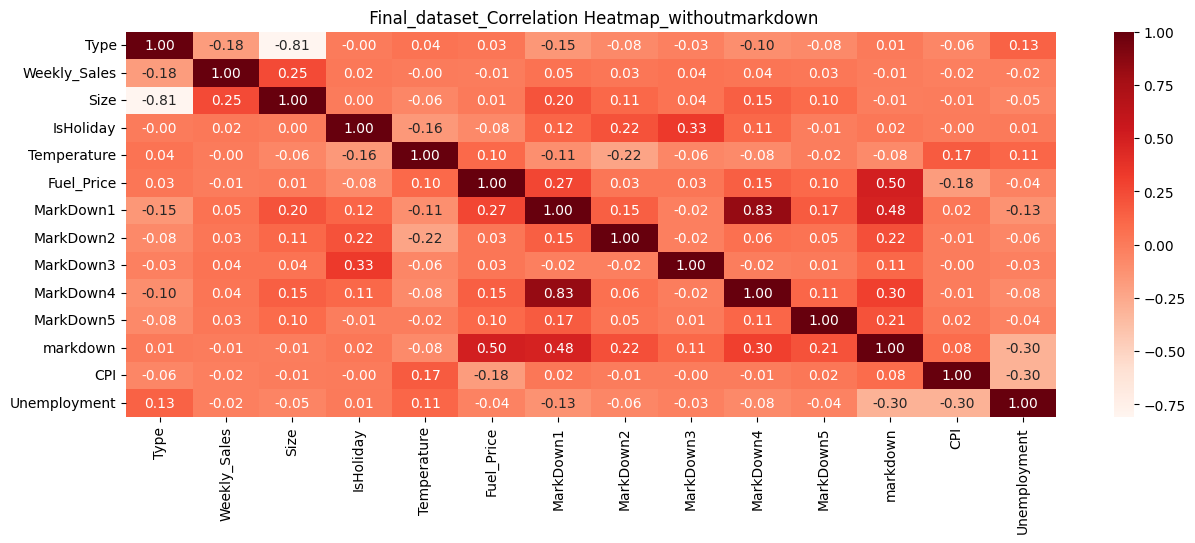

In [ ]:
# Calculate the correlation matrix
final_dataset_markdown_zero = weekly_sales_final_data_markdown_zero.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept',"diff"]).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(final_dataset_markdown_zero, annot=True, fmt=".2f",cmap="Reds")
plt.title(" Final_dataset_Correlation Heatmap_withoutmarkdown")
plt.show()

This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.

other features are weak correlation with weekly_sales.

We our final data with zero null values. Now we are going to try different technique.

1.with Skewness, outlier

1.1.with scaling prediction

1.2.without scaling prediction


In [ ]:
#scaled data with outlier and skewness
from sklearn.preprocessing import StandardScaler
x = weekly_sales_final_data_markdown_zero.drop(['Weekly_Sales','diff'], axis=1)
y = weekly_sales_final_data_markdown_zero['Weekly_Sales']
x_scaled_data_fit_markdown_zero = StandardScaler().fit(x)
x_scaled_trans_markdown_zero=x_scaled_data_fit_markdown_zero.transform(x)
scaled_df_markdown_zero = pd.DataFrame(x_scaled_trans_markdown_zero, columns=x.columns)

In [ ]:
scaled_df_markdown_zero

Day     Month      Year     Store      Dept      Type      Size  \
0      -1.213929 -1.280543 -1.321296 -1.271443  0.078807 -0.888248  1.085350   
1      -1.213929 -1.280543 -1.321296 -1.037011  0.144561  0.605129 -0.167312   
2      -1.213929 -1.280543 -1.321296 -0.880723 -0.841760 -0.888248  1.166941   
3      -1.213929 -1.280543 -1.321296 -0.568146  1.163760  0.605129 -0.201556   
4      -1.213929 -1.280543 -1.321296 -0.177425 -0.841760 -0.888248  1.105560   
...          ...       ...       ...       ...       ...       ...       ...   
551474  1.178951  1.114573  0.576084  1.776179  1.591166  0.605129 -0.291676   
551475  1.178951  1.114573  0.576084  1.776179  1.624043  0.605129 -0.291676   
551476  1.178951  1.114573  0.576084  1.776179  1.656921  0.605129 -0.291676   
551477  1.178951  1.114573  0.576084  1.776179  1.722676  0.605129 -0.291676   
551478  1.178951  1.114573  0.576084  1.776179  1.755553  0.605129 -0.291676   

        IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0       -0.278345    -0.977963   -1.966244  -0.488419  -0.229500  -0.107889   
1       -0.278345    -1.107476   -1.966244  -0.488419  -0.229500  -0.107889   
2       -0.278345    -0.677729   -1.966244  -0.488419  -0.229500  -0.107889   
3       -0.278345    -2.080429   -1.073145  -0.488419  -0.229500  -0.107889   
4       -0.278345    -1.754506   -1.470598  -0.488419  -0.229500  -0.107889   
...           ...          ...         ...        ...        ...        ...   
551474  -0.278345     0.007834    1.096477   0.035368  -0.219368  -0.095324   
551475  -0.278345     0.007834    1.096477   0.035368  -0.219368  -0.095324   
551476  -0.278345     0.007834    1.096477   0.035368  -0.219368  -0.095324   
551477  -0.278345     0.007834    1.096477   0.035368  -0.219368  -0.095324   
551478  -0.278345     0.007834    1.096477   0.035368  -0.219368  -0.095324   

        MarkDown4  MarkDown5  markdown       CPI  Unemployment  
0       -0.307652  -0.217404 -1.020525  1.005644     -0.237397  
1       -0.307652  -0.217404 -1.020525  1.056764     -0.690497  
2       -0.307652  -0.217404 -1.020525  1.050967     -0.178880  
3       -0.307652  -0.217404 -1.020525 -1.033380      0.348305  
4       -0.307652  -0.217404 -1.020525  0.795061      0.260799  
...           ...        ...       ...       ...           ...  
551474  -0.264559  -0.131575  0.979888  0.494886      0.518486  
551475  -0.264559  -0.131575  0.979888  0.494886      0.518486  
551476  -0.264559  -0.131575  0.979888  0.494886      0.518486  
551477  -0.264559  -0.131575  0.979888  0.494886      0.518486  
551478  -0.264559  -0.131575  0.979888  0.494886      0.518486  

[551479 rows x 18 columns]

In [ ]:
scaled_df_markdown_zero.describe()

Day         Month          Year         Store          Dept  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   4.865116e-17 -1.814111e-16 -4.244113e-14 -6.761687e-17  1.075969e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.669716e+00 -1.579932e+00 -1.321296e+00 -1.662164e+00 -1.433553e+00   
25%   -8.720895e-01 -9.811532e-01 -1.321296e+00 -8.807227e-01 -8.417599e-01   
50%    3.948387e-02 -8.298480e-02 -3.726061e-01 -2.113685e-02 -2.170897e-01   
75%    8.371105e-01  8.151836e-01  5.760843e-01  8.384490e-01  9.664958e-01   
max    1.748684e+00  1.713352e+00  1.524775e+00  1.776179e+00  1.788430e+00   

               Type          Size     IsHoliday   Temperature    Fuel_Price  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean   5.166609e-17 -4.447664e-17 -5.524793e-17 -5.697443e-16 -2.203320e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -8.882481e-01 -1.653377e+00 -2.783446e-01 -3.531830e+00 -2.200040e+00   
25%   -8.882481e-01 -6.933112e-01 -2.783446e-01 -7.248242e-01 -8.487017e-01   
50%   -8.882481e-01 -1.301592e-01 -2.783446e-01  6.616808e-02  2.594891e-01   
75%    6.051293e-01  1.085350e+00 -2.783446e-01  7.736727e-01  7.785152e-01   
max    2.098507e+00  1.365006e+00  3.592669e+00  2.314449e+00  2.466519e+00   

          MarkDown1     MarkDown2     MarkDown3     MarkDown4     MarkDown5  \
count  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05  5.514790e+05   
mean  -1.016315e-16  2.535633e-17 -3.092235e-17  1.133819e-17 -6.220546e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.884188e-01 -2.294998e-01 -1.078887e-01 -3.076521e-01 -2.174044e-01   
25%   -4.884188e-01 -2.294998e-01 -1.078887e-01 -3.076521e-01 -2.174044e-01   
50%   -4.843525e-01 -2.294998e-01 -1.078887e-01 -3.076521e-01 -1.771161e-01   
75%    1.815377e-01 -2.060244e-01 -1.039523e-01 -1.182920e-01  6.975506e-02   
max    1.295974e+01  1.800361e+01  1.867359e+01  1.341178e+01  7.692432e+01   

           markdown           CPI  Unemployment  
count  5.514790e+05  5.514790e+05  5.514790e+05  
mean  -8.988096e-17  6.336505e-17  4.201316e-16  
std    1.000001e+00  1.000001e+00  1.000001e+00  
min   -1.020525e+00 -1.170763e+00 -2.156632e+00  
25%   -1.020525e+00 -1.004084e+00 -6.292967e-01  
50%    9.798877e-01  2.493745e-01  2.574418e-03  
75%    9.798877e-01  1.050785e+00  4.411799e-01  
max    9.798877e-01  1.416849e+00  3.549535e+00

In [ ]:
import pickle

pickle_=open("x_scaled_data_fit_markdown_zero","wb")
pickle.dump(x_scaled_data_fit_markdown_zero,pickle_)
pickle_.close()

In [ ]:
print("Prediction with skewness and outlier after scaled without markdown")
print(machine_learning_regression(scaled_df_markdown_zero,y, DecisionTreeRegressor))
print(machine_learning_regression(scaled_df_markdown_zero,y, ExtraTreesRegressor))
print(machine_learning_regression(scaled_df_markdown_zero,y, RandomForestRegressor))
print(machine_learning_regression(scaled_df_markdown_zero,y, AdaBoostRegressor))
print(machine_learning_regression(scaled_df_markdown_zero,y, GradientBoostingRegressor))
print(machine_learning_regression(scaled_df_markdown_zero,y, XGBRegressor))

Prediction with skewness and outlier after scaled without markdown
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9606453037931685}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999978033, 'R2_test': 0.9802054359798468}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9970967285517491, 'R2_test': 0.9803517048077665}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.09512765558029057, 'R2_test': 0.06907361418792946}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7436101000474236, 'R2_test': 0.7391076676604624}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9473351719258637, 'R2_test': 0.9439214716577747}


In [ ]:
print("Prediction with skewness and outlier before scaling withoutmarkdown")
print(machine_learning_regression(x,y, DecisionTreeRegressor))
print(machine_learning_regression(x,y, ExtraTreesRegressor))
print(machine_learning_regression(x,y, RandomForestRegressor))
print(machine_learning_regression(x,y, AdaBoostRegressor))
print(machine_learning_regression(x,y, GradientBoostingRegressor))
print(machine_learning_regression(x,y, XGBRegressor))

Prediction with skewness and outlier before scaling withoutmarkdown
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9621831973844392}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999984714, 'R2_test': 0.980457647026305}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9970872314033273, 'R2_test': 0.980118714653904}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.029407667925096304, 'R2_test': 0.005628338039096348}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7436101000474236, 'R2_test': 0.7391076676604624}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9473351719258637, 'R2_test': 0.9439214716577747}


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df_markdown_zero,y,test_size=0.2,random_state=42)

param_grid_r = { 'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}


grid_search_r = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search_r.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
grid_search_r.best_score_

0.9384177503817048

In [ ]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x_train, x_test, y_train, y_test = train_test_split(scaled_df_markdown_zero,y,test_size=0.2,random_state=42)

model = XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9416779759967389, 0.9387297729275832)

The training accuracy is higher than the test accuracy, which is expected. It indicates that the model is able to effectively learn from the training data and generalize well to unseen data. The relatively small difference between the training and test accuracies suggests that the model is not overfitting excessively. Overall, the model appears to perform well on both the training and test datasets, indicating that it has learned meaningful patterns from the data and can make accurate predictions on new, unseen data.

In [ ]:
# predict the weeklysales with hypertuning parameters and calculate the accuracy using metrics

model_reg =  XGBRegressor(learning_rate=0.2,max_depth=5,n_estimators=300).fit(x_train, y_train)
y_pred = model_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9387297729275832,
 'Mean Absolute Error': 3085.6475075447065,
 'Mean Squared Error': 30690228.29664447,
 'Root Mean Squared Error': 5539.876198674883}

In [ ]:
# save the regression model by using pickle
pickle.dump(model_reg, open('model_XGB_regression_with skewness and outlier after scaled_markdown_zero.pkl', 'wb'))
pickle_.close()

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import pickle
import numpy as np
#regressor scaling data
pickel_in_reg=open("/content/x_scaled_data_afterskewness","rb")
model_data_reg=pickle.load(pickel_in_reg)
user_data = np.array([[5,2,2010,6,47,1,202505,0,40.43,2.572,9.260048,8.663421,4.043935,10.679592,8.890258,212.622352,7.259]])
user_data_scaled_reg=model_data_reg.transform(user_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
user_data_scaled_reg

array([[-1.21392946, -1.28054264, -1.32129645, -1.27144349,  0.07880665,
        -0.88824812,  1.08534986, -0.27834457, -0.97796312, -1.96624432,
         0.78921491,  1.20904206,  0.28120815,  2.04887851,  1.01169059,
         1.0056149 , -0.22125572]])

In [ ]:
pip install xgboost

In [ ]:
#regressor prediction
pickel_in_reg_pred=open("/content/model_XGB_regression_without skewness and outlier after scaled.pkl","rb")
reg_model=pickle.load(pickel_in_reg_pred)
y_p = reg_model.predict(user_data_scaled_reg)
np.exp(y_p[0])

108.460976